In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
import os 
from os.path import dirname
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

from DataParser import DataParser
from CsvParser  import CsvParser

In [46]:
data_dir        = os.path.join(os.getcwd(), '../notebooks/datasets')
signal_file     = 'ap_100MeV_L1L1_tight_08mm.csv'
background_file = 'tritrig-wab-beam_100MeV_L1L1_tight.csv'

In [47]:
background = CsvParser(os.path.join(data_dir, background_file))
signal     = CsvParser(os.path.join(data_dir, signal_file))

myData     = DataParser(signal=signal, background=background)

[INFO]: Reading CSV file /home/mrsolt/CS230/cs230-project/RandomForest/../notebooks/datasets/tritrig-wab-beam_100MeV_L1L1_tight.csv found 1496783 rows and 33 columns
[INFO]: Found 33 features and 1496783 samples
[INFO]: Filtering data removing these columns ['vz', 'vzPull', 'vx', 'vy', 'vxPull', 'vyPull', 'uncM', 'eleZ0', 'posZ0', 'eleTrkD0', 'posTrkD0', 'projX', 'projY', 'projXPull', 'projYPull', 'uncP', 'eleP', 'posP', 'eleTrkTanLambda', 'eleTrkD0Err', 'eleTrkTanLambdaErr', 'eleTrkZ0Err', 'posTrkTanLambda', 'posTrkD0Err', 'posTrkTanLambdaErr', 'posTrkZ0Err']
[INFO]: Cleaning data
[INFO]: Cleaned 698241 samples 
[INFO]: Reading CSV file /home/mrsolt/CS230/cs230-project/RandomForest/../notebooks/datasets/ap_100MeV_L1L1_tight_08mm.csv found 99963 rows and 33 columns
[INFO]: Found 33 features and 99963 samples
[INFO]: Filtering data removing these columns ['vz', 'vzPull', 'vx', 'vy', 'vxPull', 'vyPull', 'uncM', 'eleZ0', 'posZ0', 'eleTrkD0', 'posTrkD0', 'projX', 'projY', 'projXPull', 'pro

In [20]:
background.RAW_DF

truthZ        vx        vy        vz    vxPull    vyPull    vzPull  \
0             0  0.028058  0.040668  2.224550  0.174911  0.755169  1.290198   
1             0  0.293753  0.011722 -0.858880  1.931045  0.187574 -0.437160   
2             0 -0.028114 -0.077102 -0.966700 -0.192743 -1.358278 -0.673462   
3             0  0.256137  0.082463 -2.856220  1.672662  1.315417 -1.962201   
4             0  0.251191 -0.048647 -0.687300  1.667806 -0.845402 -0.565680   
5             0  0.363495  0.081991 -2.543910  2.282956  1.432090 -1.869305   
6             0  0.140316 -0.123730  0.117570  0.853395 -1.982669  0.072848   
7             0 -0.041993 -0.060617  0.435320 -0.238685 -0.977203  0.218948   
8             0  0.171626  0.011719  1.807800  1.007459  0.200029  1.356991   
9             0  0.096865  0.004356  3.827875  0.622053  0.087129  2.183038   
10            0  0.072189 -0.029637 -1.594260  0.455546 -0.461164 -0.878393   
11            0  0.294995 -0.011920 -0.218110  2.135754 -0.209258 -0.186630   
12            0  0.176774 -0.015490 -0.019280  1.273502 -0.267957 -0.016311   
13            0  0.277265  0.078691 -2.641460  1.703442  1.203942 -1.453112   
14            0  0.334128  0.018518  1.837270  2.358207  0.322218  1.393973   
15            0  0.270414  0.336145  7.499590  1.641297  5.695622  6.114754   
16            0  0.239064  0.057794  0.824620  1.710206  1.048315  0.612874   
17            0  0.150045  0.061678  0.562750  1.100024  1.102010  0.460593   
18            0 -0.123213 -0.066288  0.589270 -0.807008 -1.010216  0.319961   
19            0  0.023419  0.000762  1.055870  0.145632  0.012806  0.650726   
20            0 -0.067652  0.011367 -5.193070 -0.395477  0.190841 -1.922070   
21            0  0.474155  0.061021 -3.954550  2.771609  0.888309 -2.757690   
22            0  0.187699  0.112249  5.915230  1.249912  2.152727  3.832905   
23            0  0.224467 -0.004927 -0.571340  1.401826 -0.068568 -0.335869   
24            0  0.293698  0.034616  0.858260  1.862292  0.620949  0.428849   
25            0  0.077970 -0.065867 -0.282930  0.466227 -0.908183 -0.175746   
26            0  0.319931  0.061662  1.707570  1.912239  1.100544  0.917083   
27            0 -0.234323 -0.156017 -2.774100 -1.310442 -2.388224 -1.637599   
28            0  0.134590 -0.013994  1.653370  0.909130 -0.258114  1.372562   
29            0  0.102084  0.031812  0.858630  0.619588  0.558701  0.643489   
...         ...       ...       ...       ...       ...       ...       ...   
1496753       0  0.126045 -0.106411 -3.316450  0.833283 -1.845684 -2.412107   
1496754       0  0.013969 -0.131678 -0.923040  0.095698 -2.327484 -0.583194   
1496755       0  0.172438 -0.045345 -4.442190  1.008750 -0.610452 -2.353381   
1496756       0 -0.134017  0.148887 -1.779460 -0.754850  2.292175 -1.277061   
1496757       0  0.100468  0.080995  2.229540  0.713972  1.373320  1.793409   
1496758       0  0.174568  0.002146  0.682130  1.068310  0.037500  0.460918   
1496759       0 -0.103175 -0.131828 -1.082860 -0.723017 -2.236034 -0.957799   
1496760       0 -0.051325  0.035280  0.717150 -0.325545  0.636921  0.491871   
1496761       0 -0.086026 -0.129858  0.033910 -0.556171 -2.303446  0.024085   
1496762       0 -0.166743  0.038806 -0.262230 -0.985311  0.605700 -0.208649   
1496763       0  0.201747  0.102362 -0.267410  1.183938  1.660098 -0.203169   
1496764       0  0.034102 -0.033734 -0.287980  0.227896 -0.614827 -0.244877   
1496765       0  0.156461  0.041233 -0.574650  0.956259  0.699261 -0.429846   
1496766       0  0.279659  0.050904  0.852930  1.713315  0.850562  0.647286   
1496767       0 -0.111414 -0.064755  1.286950 -0.706286 -0.972017  0.831626   
1496768       0 -0.168759 -0.014878  1.160180 -1.222516 -0.272804  0.780881   
1496769       0  0.249410 -0.096057 -0.173140  1.494778 -1.686446 -0.108865   
1496770       0  0.163166  0.090831 -1.952320  0.997821  1.505932 -1.057884   
1496771       0  0.271167 -0.091595  2.057760  1.597477 -1.

In [21]:
background.DATA_DF

vz    vzPull        vx        vy    vxPull    vyPull      uncM  \
0        2.224550  1.290198  0.028058  0.040668  0.174911  0.755169  0.102199   
6        0.117570  0.072848  0.140316 -0.123730  0.853395 -1.982669  0.090121   
7        0.435320  0.218948 -0.041993 -0.060617 -0.238685 -0.977203  0.094596   
8        1.807800  1.356991  0.171626  0.011719  1.007459  0.200029  0.090260   
9        3.827875  2.183038  0.096865  0.004356  0.622053  0.087129  0.106476   
14       1.837270  1.393973  0.334128  0.018518  2.358207  0.322218  0.094725   
15       7.499590  6.114754  0.270414  0.336145  1.641297  5.695622  0.094475   
16       0.824620  0.612874  0.239064  0.057794  1.710206  1.048315  0.099510   
17       0.562750  0.460593  0.150045  0.061678  1.100024  1.102010  0.098009   
18       0.589270  0.319961 -0.123213 -0.066288 -0.807008 -1.010216  0.097540   
19       1.055870  0.650726  0.023419  0.000762  0.145632  0.012806  0.091637   
22       5.915230  3.832905  0.187699  0.112249  1.249912  2.152727  0.102902   
24       0.858260  0.428849  0.293698  0.034616  1.862292  0.620949  0.102697   
26       1.707570  0.917083  0.319931  0.061662  1.912239  1.100544  0.093243   
28       1.653370  1.372562  0.134590 -0.013994  0.909130 -0.258114  0.106297   
29       0.858630  0.643489  0.102084  0.031812  0.619588  0.558701  0.097447   
30       0.316740  0.245338  0.014713 -0.017870  0.102743 -0.341678  0.097523   
33       5.273772  4.068004  0.101842  0.031115  0.705677  0.574816  0.096160   
36       3.951402  2.194742  0.281777  0.121124  1.895855  1.803584  0.100976   
40       1.677420  0.989008  0.208163  0.052564  1.330363  0.785963  0.091168   
41       1.885700  1.375292  0.319018 -0.057317  1.954122 -0.930416  0.104345   
43       0.187680  0.134662  0.032084 -0.034592  0.222430 -0.492935  0.098146   
44       0.922640  0.621194  0.349611  0.042742  2.314736  0.736391  0.096181   
45       2.823290  2.072439  0.427476  0.056312  3.086996  0.962441  0.094485   
46       1.620080  1.210165  0.166254  0.026740  1.174592  0.485194  0.096624   
47       0.858250  0.628102  0.246773  0.076883  1.559844  1.384630  0.104752   
49       0.878350  0.770592  0.118517 -0.027541  0.740627 -0.405500  0.104515   
50       1.746700  1.390229  0.004315 -0.017739  0.031619 -0.317350  0.100056   
51       2.341790  1.696869 -0.066518  0.049350 -0.460800  0.909194  0.107679   
52       0.852040  0.625658  0.228115  0.055178  1.399009  1.002928  0.097569   
...           ...       ...       ...       ...       ...       ...       ...   
1496725  1.312770  0.751996  0.355585 -0.057568  2.152209 -1.000133  0.096310   
1496727  2.294460  1.586720  0.203969  0.016447  1.296181  0.287109  0.092152   
1496731  2.586480  1.885672  0.075797  0.012111  0.509466  0.217735  0.092517   
1496732  1.623950  1.344152 -0.097822  0.007971 -0.656020  0.146656  0.098448   
1496734  2.559590  1.681410  0.316075  0.042628  1.918291  0.738640  0.098103   
1496738  0.809320  0.592817 -0.020255 -0.057041 -0.129717 -0.797684  0.096809   
1496740  0.740520  0.443960  0.526233 -0.020707  3.186325 -0.347533  0.091791   
1496742  0.934100  0.575278  0.255998 -0.051271  1.557903 -0.898303  0.100780   
1496744  1.354970  1.032747  0.115147 -0.043088  0.770455 -0.655482  0.098193   
1496745  1.229040  0.961515  0.105166  0.050936  0.693174  0.822118  0.097018   
1496746  1.512550  1.246881  0.127163 -0.092718  0.826616 -1.571692  0.100014   
1496748  2.995550  2.214368  0.292617 -0.014066  2.076190 -0.275163  0.095160   
1496750  1.125990  0.829874  0.264398  0.059492  1.720196  1.053336  0.101017   
1496751  0.117020  0.075699 -0.047753 -0.028940 -0.287889 -0.459247  0.093032   
1496752  0.924720  0.538192 -0.022435  0.028219 -0.136721  0.453642  0.102692   
1496757  2.229540  1.793409  0.100468  0.080995  0.713972  1.373320  0.100209   
1496758  0.682130  0.460918  0.174568  0.002146  1.068310  0.037500  0.098872   
1496760  0.717150  0.491871 -0.051325  0.03528

In [22]:
myData.DATA_DF

vz     vzPull        vx        vy    vxPull    vyPull  \
1010200   4.465718   2.343733  0.031800  0.048575  0.219055  0.808763   
1341339   1.085480   0.814288  0.133897 -0.062959  0.860826 -1.021236   
386838    1.959810   1.404840  0.474323  0.067127  3.285483  1.252508   
331020    1.500770   1.121102  0.033212 -0.099332  0.214695 -1.811988   
1433430   0.201070   0.137638  0.162657 -0.018547  1.068659 -0.318895   
757054    1.274720   0.937910  0.615028 -0.052447  3.907938 -0.945814   
894664    2.856170   2.238781  0.471143  0.064973  2.968947  0.979694   
12623    20.719700  20.578806 -0.078409 -0.012200 -0.619201 -0.274941   
43123     1.491470   0.909179  0.037969  0.046380  0.244242  0.830315   
1041882   0.866570   0.387253  0.182610 -0.001150  0.931885 -0.012260   
13781    21.790100  19.961202 -0.056389  0.048774 -0.425470  1.152152   
292533    3.352552   2.349930  0.088315 -0.023718  0.595257 -0.391705   
1483607   1.338430   0.908793  0.115718 -0.029161  0.824448 -0.541572   
551500    0.159640   0.117902  0.120776 -0.059636  0.860869 -1.088190   
780341    0.039710   0.017924 -0.099134  0.059398 -0.613015  0.768156   
1200557   1.085750   0.817438  0.182174  0.004353  1.112632  0.066769   
622252    5.643990   3.556029 -0.341707  0.087824 -2.152261  1.361615   
1412390   0.781870   0.613697  0.032327 -0.017144  0.188110 -0.252164   
1331378   0.705350   0.517161  0.343046  0.068332  2.422542  1.121945   
26842     0.956810   0.711319  0.163355  0.082176  1.081875  1.407049   
807157    1.053050   0.601227  0.012971 -0.046792  0.080377 -0.757326   
83342     3.598562   2.834735  0.026039 -0.015513  0.181222 -0.263640   
39462     0.100440   0.064841 -0.008749 -0.041288 -0.056178 -0.681790   
96330     2.238450   1.350037  0.364607 -0.008666  2.336466 -0.166403   
727145    0.213000   0.132043 -0.039939 -0.036954 -0.281005 -0.623274   
167829    0.358020   0.229183  0.287263  0.076925  1.669470  1.136758   
622763    1.327390   0.640725  0.303411  0.034601  1.680476  0.570603   
847884    1.123620   0.627339  0.127423 -0.020403  0.828676 -0.375155   
42285    18.644400  16.687677  0.408933 -0.102503  2.873922 -2.013446   
937883    2.905680   1.927155  0.521521  0.019730  3.422058  0.370609   
...            ...        ...       ...       ...       ...       ...   
773446    6.921800   3.207174  0.300297  0.125680  1.932426  1.880314   
1396908   0.470170   0.331900  0.481947  0.044537  2.867239  0.792315   
550672    0.525300   0.408178 -0.241885 -0.009905 -1.623488 -0.185165   
1156005   1.695840   1.041434  0.238270  0.001247  1.701529  0.022278   
461699    0.543100   0.358097  0.660546  0.047063  3.741687  0.635159   
352957    1.851860   1.433725  0.326746 -0.045007  2.214502 -0.734245   
684278    0.369750   0.277211  0.184525  0.056801  1.198652  0.927599   
8279      4.437956   2.015446  0.197643 -0.061503  1.289302 -1.000260   
752832    2.290170   1.536497  0.156986  0.007621  1.047444  0.119149   
857596    0.067890   0.058780  0.151922 -0.072860  0.891048 -1.075216   
1079396   0.318700   0.223921 -0.035083  0.127217 -0.216022  2.258176   
1294958   0.814270   0.457676 -0.167594  0.147153 -1.113895  2.070635   
330685    1.805860   1.396547  0.265202  0.071755  1.731373  1.225604   
40870     0.955090   0.664624 -0.297675 -0.045603 -1.876625 -0.778153   
962107    3.428362   2.268892  0.360691  0.161757  2.296882  2.603399   
313382    2.266080   1.913916  0.263687  0.049070  1.729993  0.917201   
549368    2.386520   1.745934  0.099725  0.057436  0.662971  0.944036   
818920    2.295290   1.347722  0.335137  0.026834  2.105753  0.535666   
775647    1.451190   1.098111 -0.281314  0.023753 -1.932278  0.417339   
430172    0.882000   0.490088  0.336072  0.071491  2.050016  1.170519   
40219     1.926460   0.998419  0.090423 -0.052572  0.530620 -0.907017   
220296    0.363330   0.248155 -0.065020 -0.130246 -0.460830 -2.357317   
137679    0.124730   0.097396  0.305268 -0.065078  2.006413 -1.189406   
6

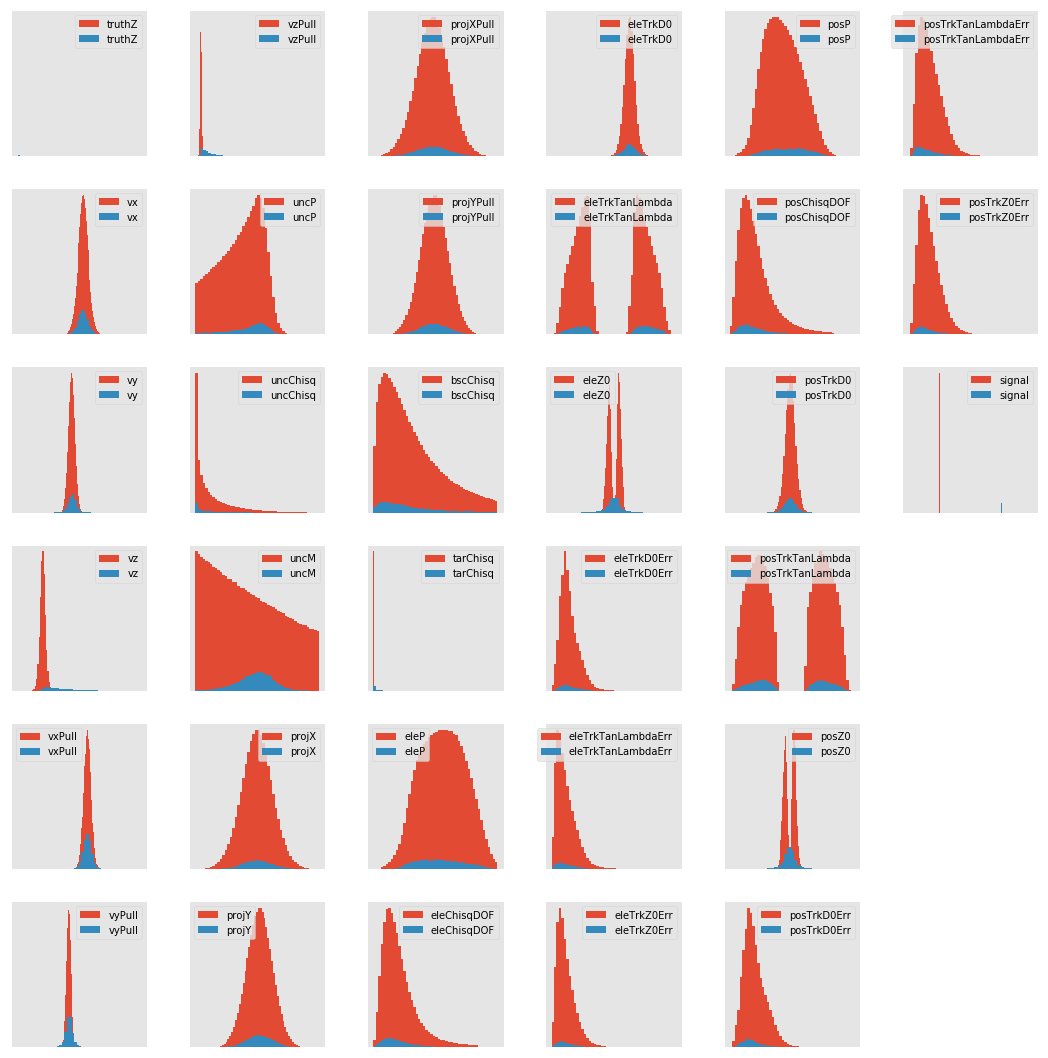

In [36]:
# Set-up picture
fig_row = 6
fig_col = 6
fig, ax = plt.subplots(fig_row, fig_col, figsize=(15,15))
fig.tight_layout()

# Plot background
for i, feature in enumerate(background.CSV_HEADER):    
    thisAx = ax[i % fig_col, i // fig_row]
    _ = thisAx.hist(background.RAW_DF[feature], bins=50, label=feature)
    thisAx.legend()
    thisAx.set_xticks([]) 
    thisAx.set_yticks([])

# Plot signal    
for i, feature in enumerate(signal.CSV_HEADER):    
    thisAx = ax[i % fig_col, i // fig_row]
    _ = thisAx.hist(signal.RAW_DF[feature], bins=50, label=feature)
    thisAx.legend()
    thisAx.set_xticks([]) 
    thisAx.set_yticks([])  
# Remove extra axies
for j in range(i+1, fig_row*fig_col):
    fig.delaxes(ax[j % fig_col, j // fig_row])

plt.show()

In [48]:
myData.X.shape

(26, 893860)

In [49]:
myData.Y.shape

(1, 893860)

In [50]:
X_train, Y_train, X_test, Y_test, classes = myData.load_dataset()

In [51]:
X_train.shape[1]+X_test.shape[1]

893860

In [52]:
Y_test.shape

(1, 294974)

In [53]:
X_train = X_train.T
Y_train = Y_train.T

In [54]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
clf = RandomForestClassifier(n_estimators=100, max_depth=10,
                             random_state=0)

In [55]:
clf.fit(X_train, Y_train)  

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[0.37121067 0.43493493 0.00110185 0.00692717 0.00147171 0.01702035
 0.03107921 0.04373776 0.04661154 0.00442516 0.00220037 0.00099545
 0.00424408 0.00100196 0.0040126  0.00676009 0.00123091 0.00283185
 0.00714781 0.00105066 0.00105243 0.00115549 0.0037325  0.00121567
 0.0010901  0.00175769]
1. feature 1 (0.434935)
2. feature 0 (0.371211)
3. feature 8 (0.046612)
4. feature 7 (0.043738)
5. feature 6 (0.031079)
6. feature 5 (0.017020)
7. feature 18 (0.007148)
8. feature 3 (0.006927)
9. feature 15 (0.006760)
10. feature 9 (0.004425)
11. feature 12 (0.004244)
12. feature 14 (0.004013)
13. feature 22 (0.003733)
14. feature 17 (0.002832)
15. feature 10 (0.002200)
16. feature 25 (0.001758)
17. feature 4 (0.001472)
18. feature 16 (0.001231)
19. feature 23 (0.001216)
20. feature 21 (0.001155)
21. feature 2 (0.001102)
22. feature 24 (0.001090)
23. feature 20 (0.001052)
24. feature 19 (0.001051)
25. feature 13 (0.001002)
26. feature 11 (0.000995)


(-1, 26)

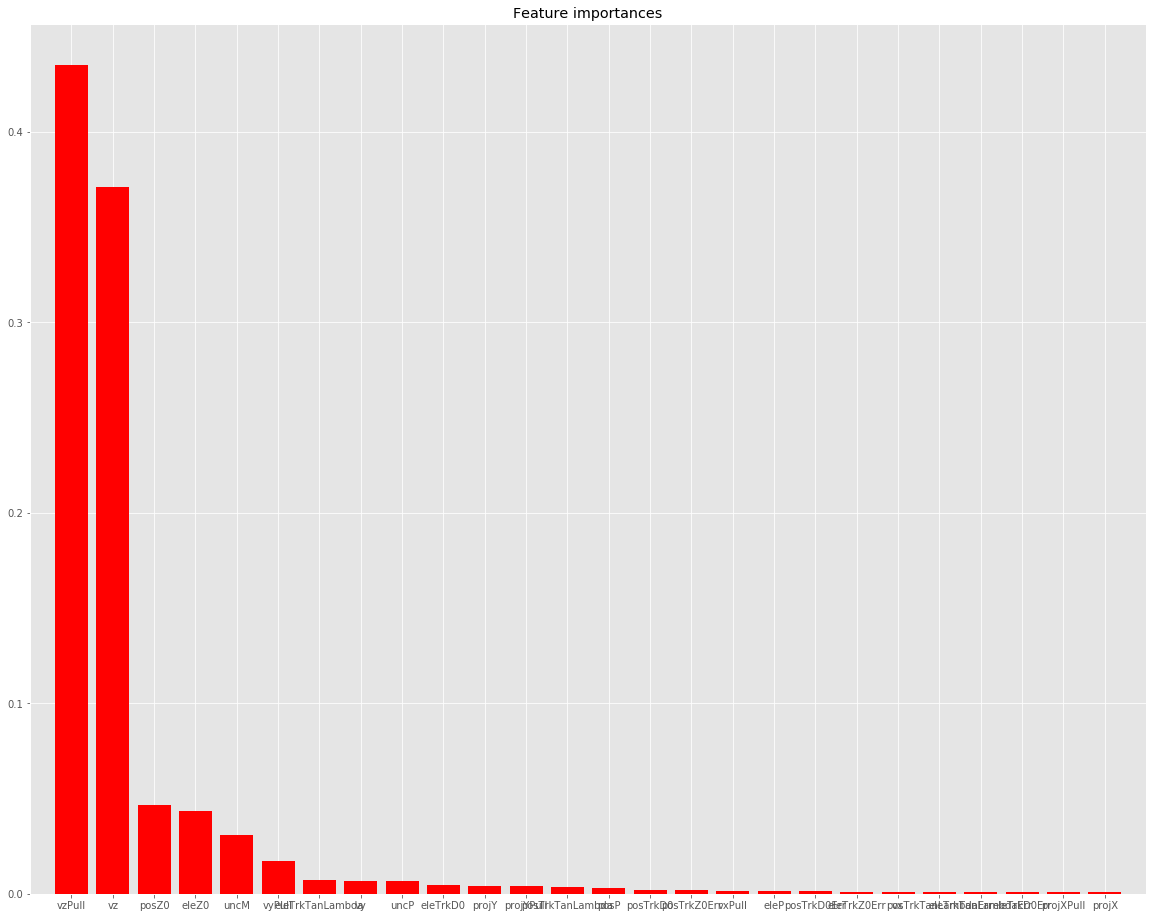

In [61]:
print(clf.feature_importances_)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
column_select = ['vz','vzPull','vx','vy','vxPull','vyPull', 'uncM', 'eleZ0', 'posZ0', 'eleTrkD0', 'posTrkD0', 'projX', 'projY', 'projXPull', 'projYPull', 'uncP', 'eleP', 'posP', 'eleTrkTanLambda','eleTrkD0Err','eleTrkTanLambdaErr','eleTrkZ0Err','posTrkTanLambda','posTrkD0Err','posTrkTanLambdaErr','posTrkZ0Err']
column_sort = []

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    column_sort.append(column_select[indices[f]])
    
    
plt.figure(figsize=(20,16))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
        #color="r", yerr=std[indices], align="center")
#plt.xticks(range(X_train.shape[1]), column_select[indices])
plt.xticks(range(X_train.shape[1]), column_sort)
plt.xlim([-1, X_train.shape[1]])

In [43]:
import Params as param
param_list, param_min, param_max = param.getParameters()

51
0.0
11635.0
inf


/home/mrsolt/CS230/cs230-project/RandomForest/MakePlots.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  print (signal_yield_new/signal_yield_old)
/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/mrsolt/.local/lib/python3.5/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


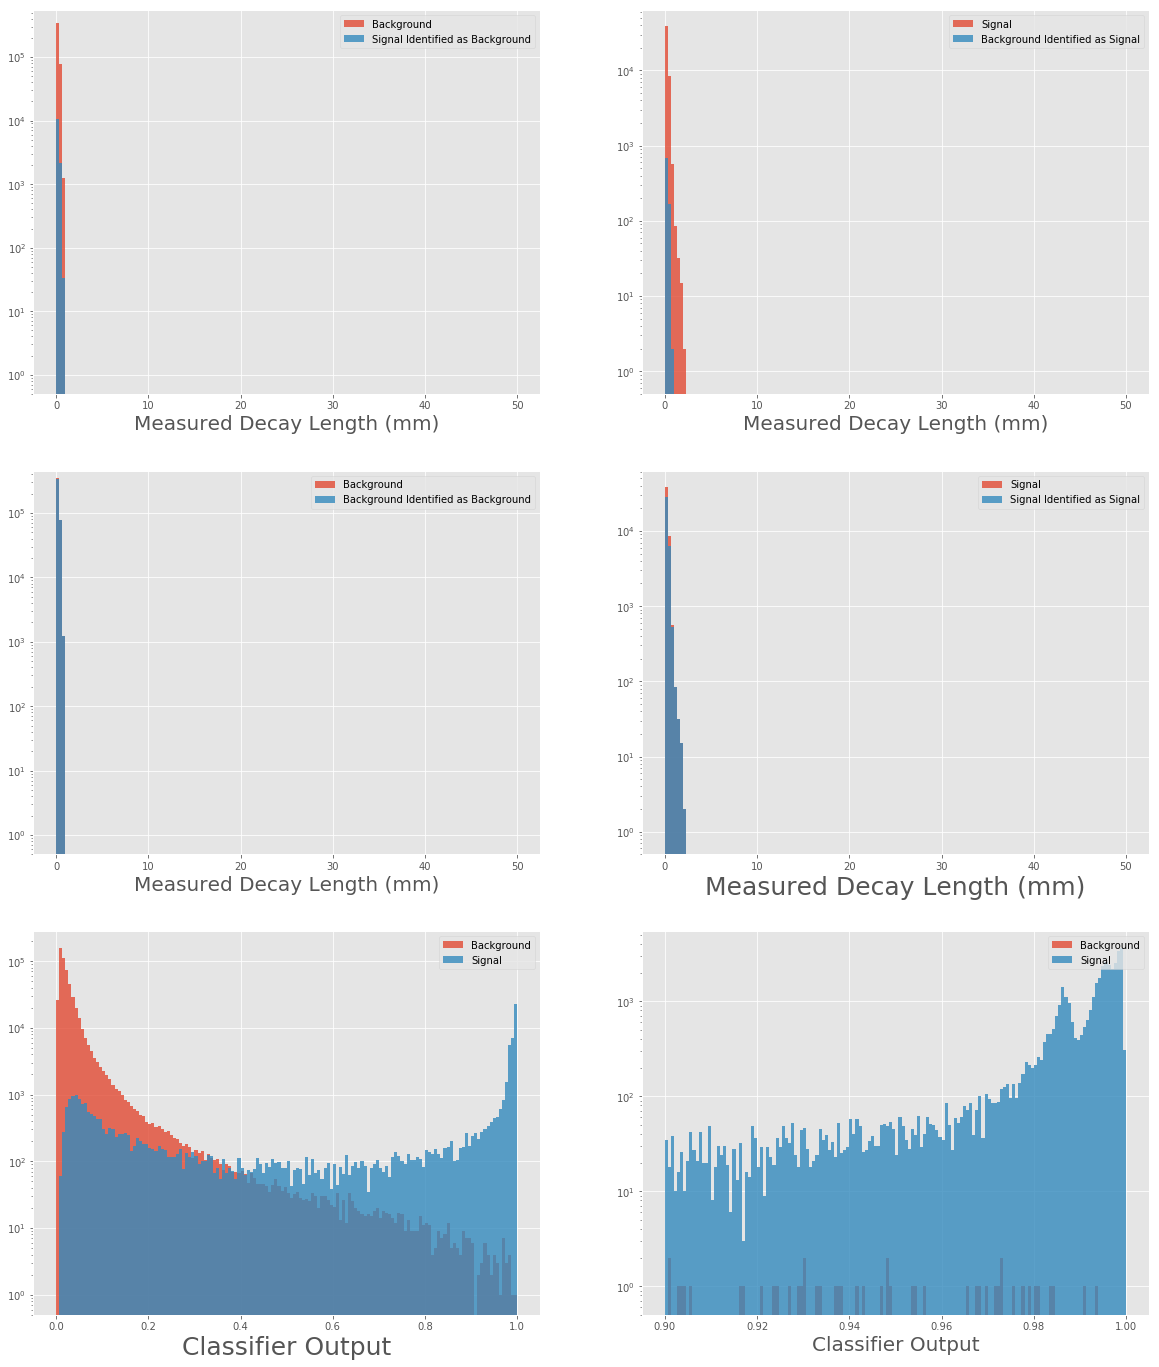

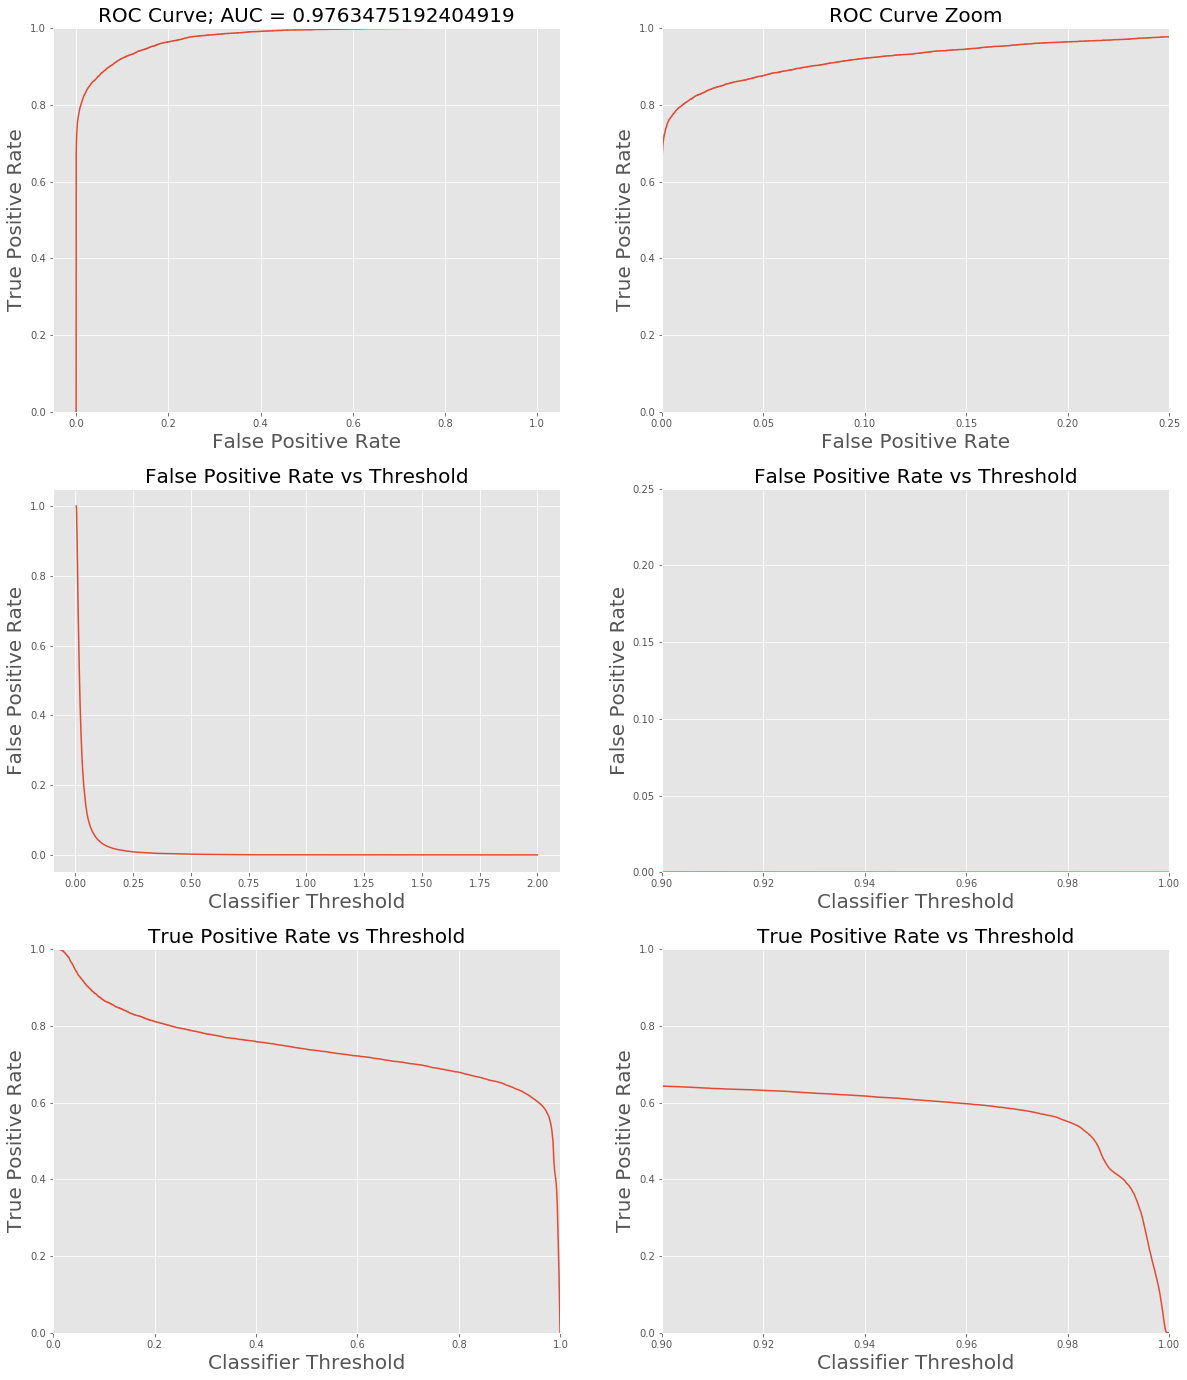

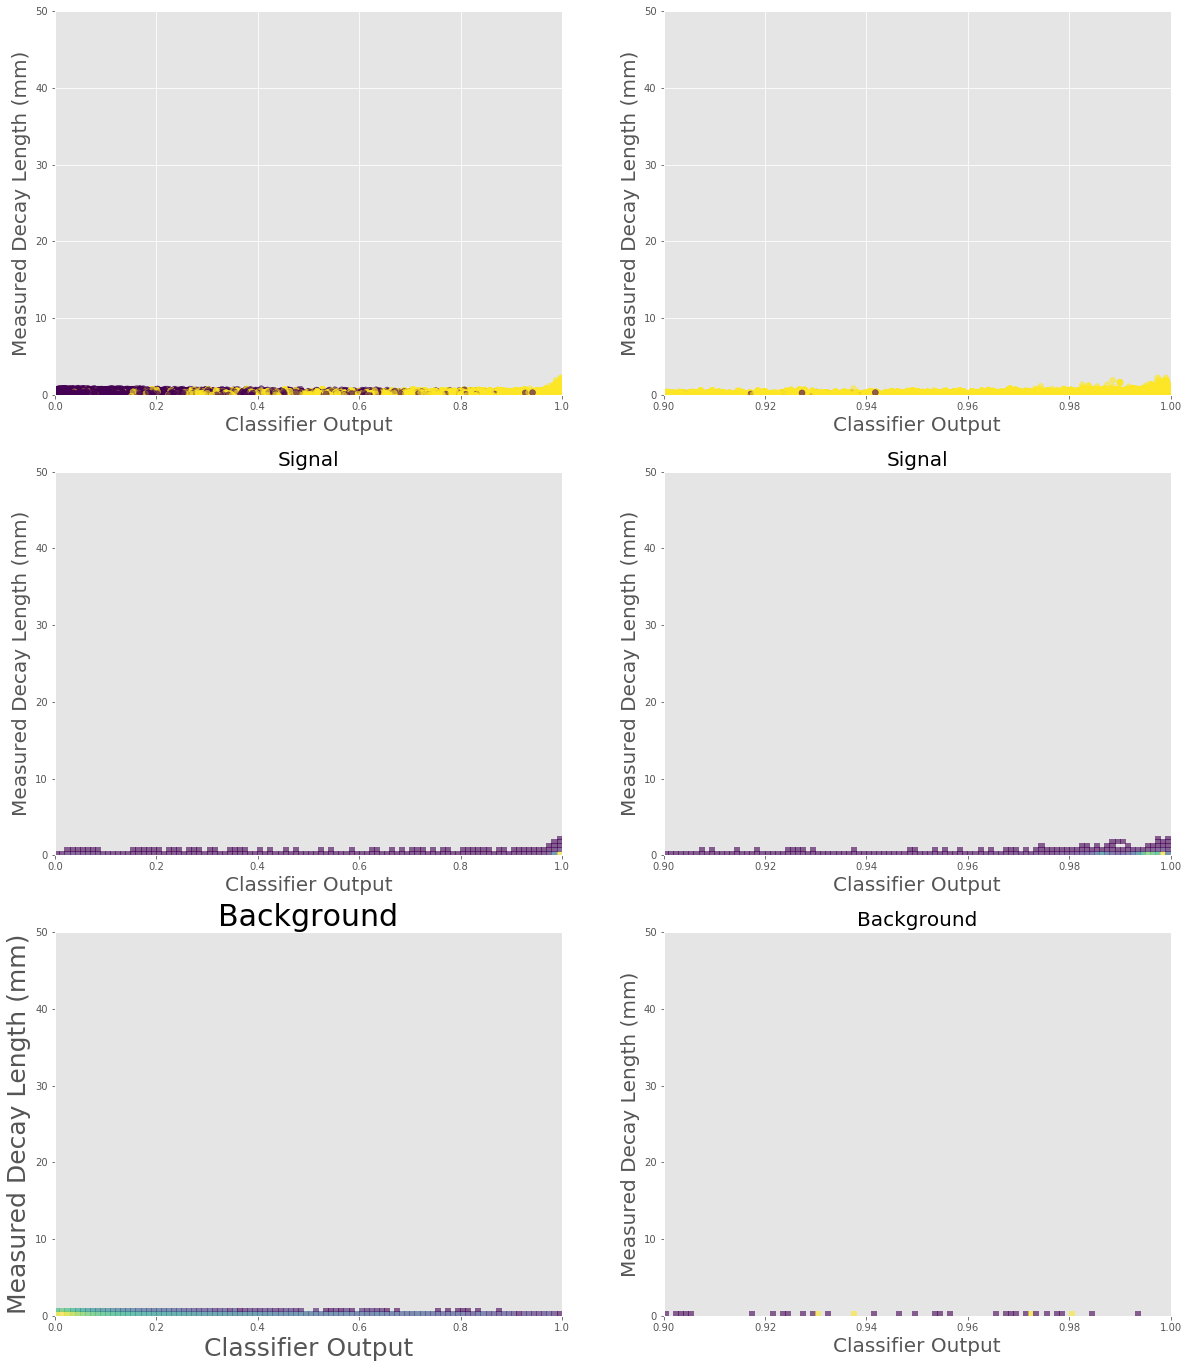

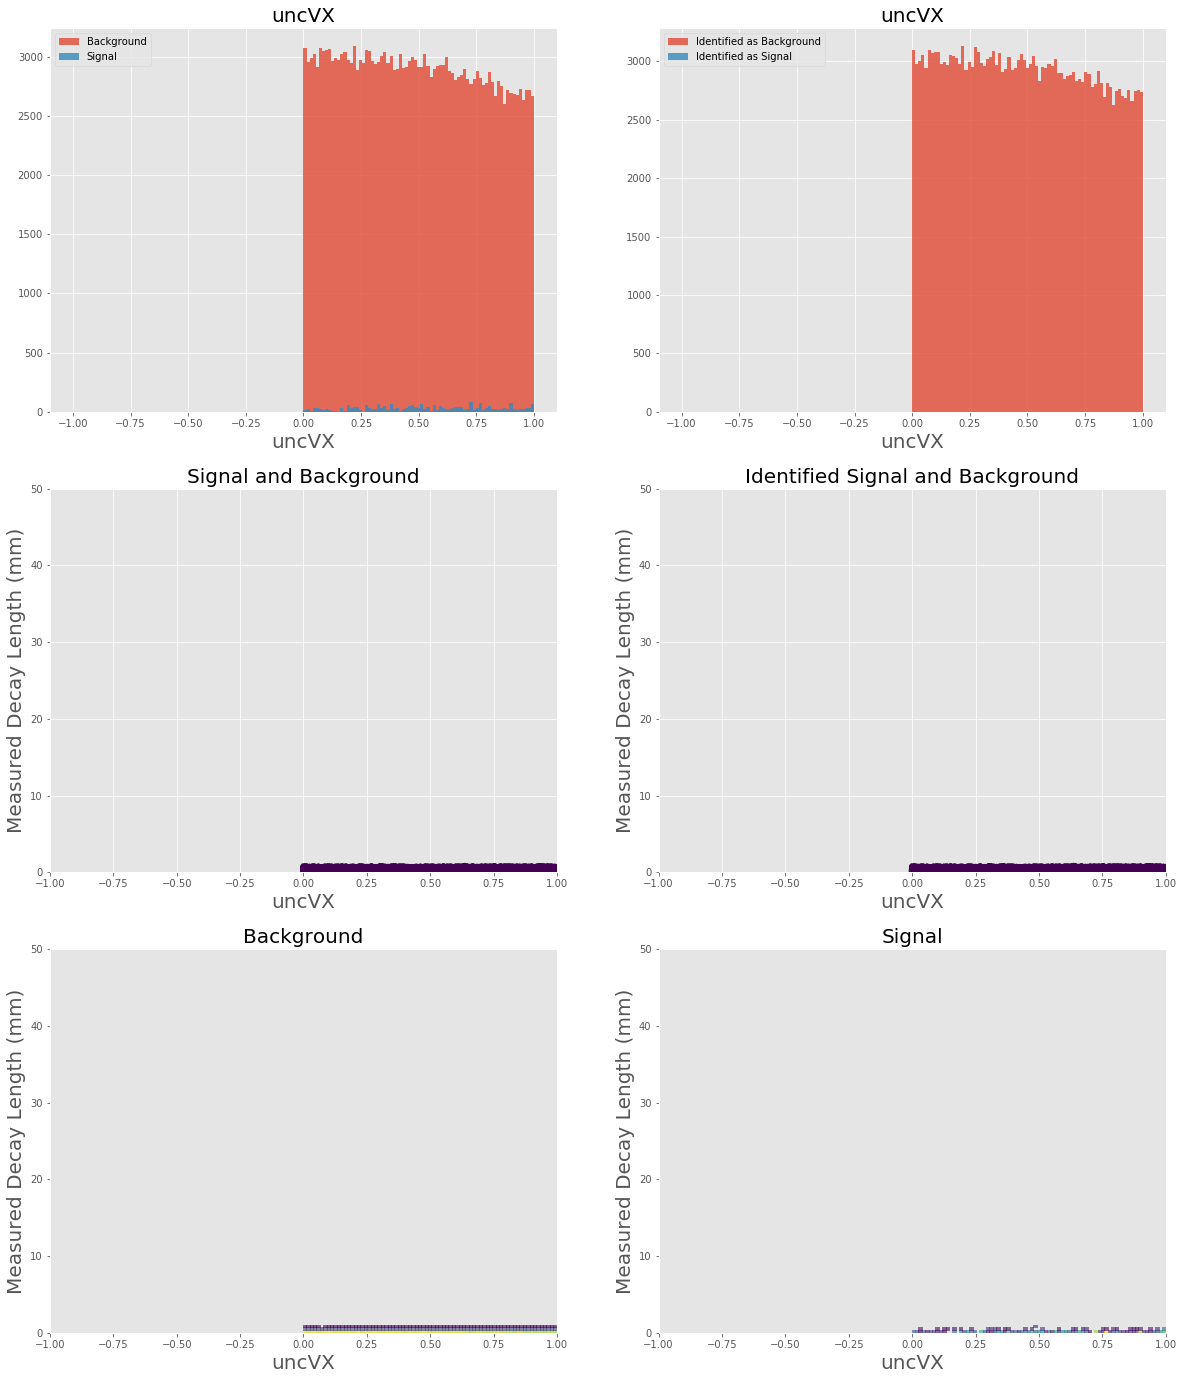

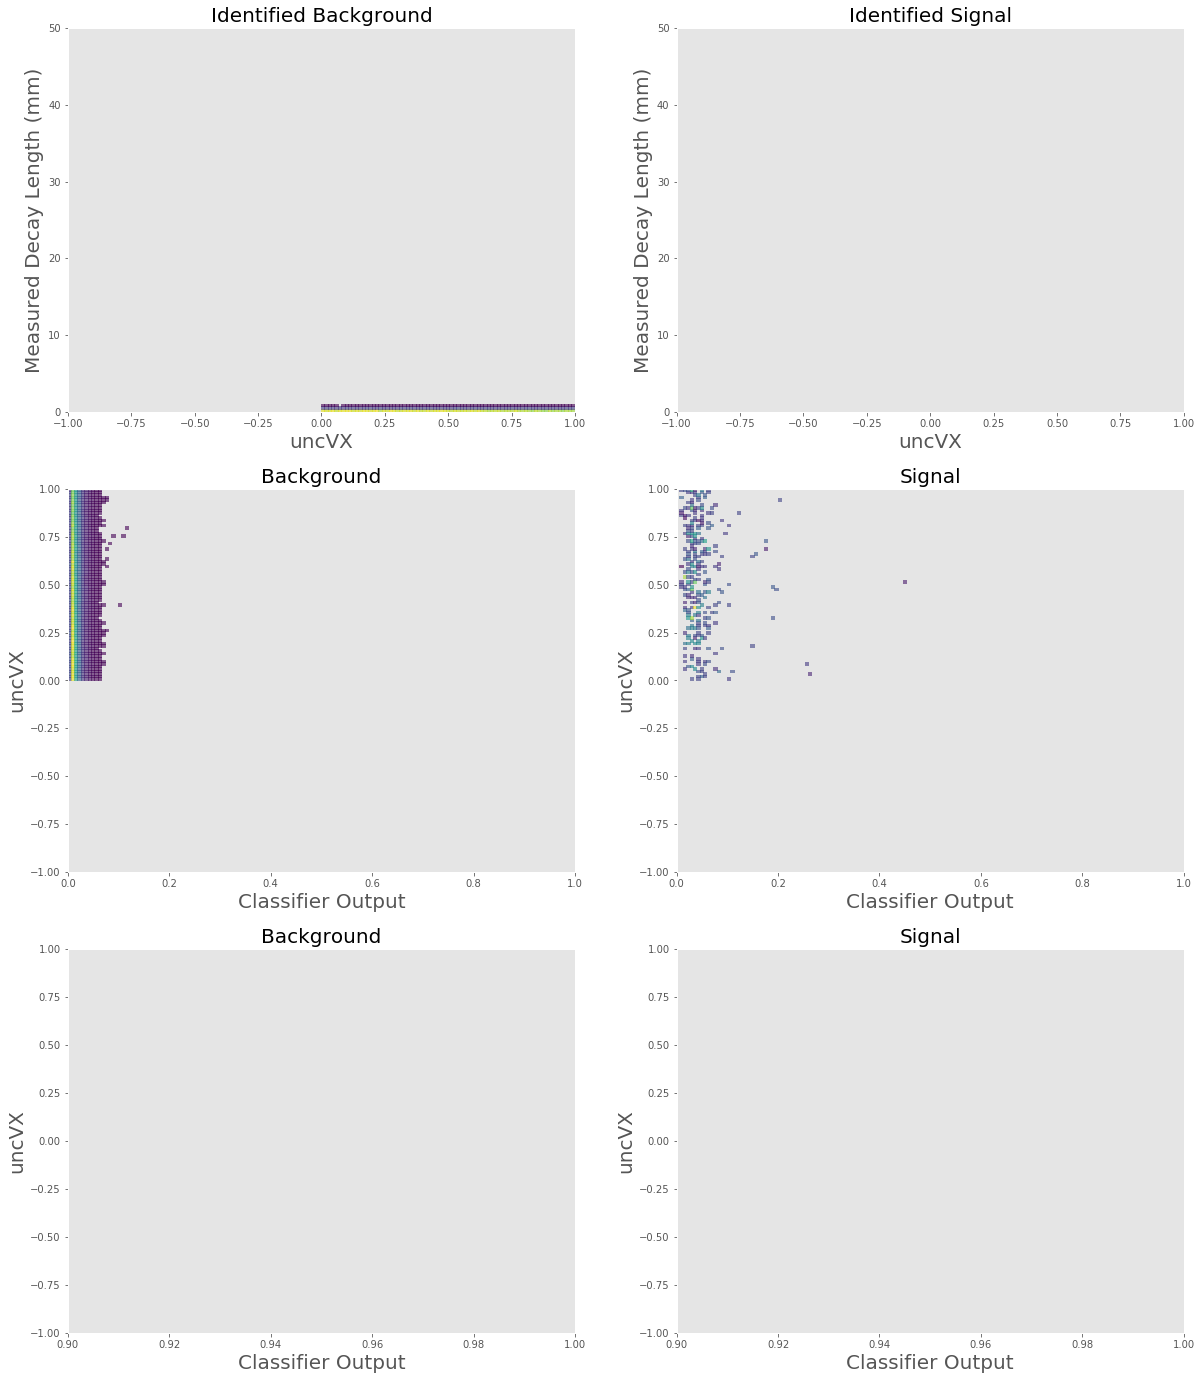

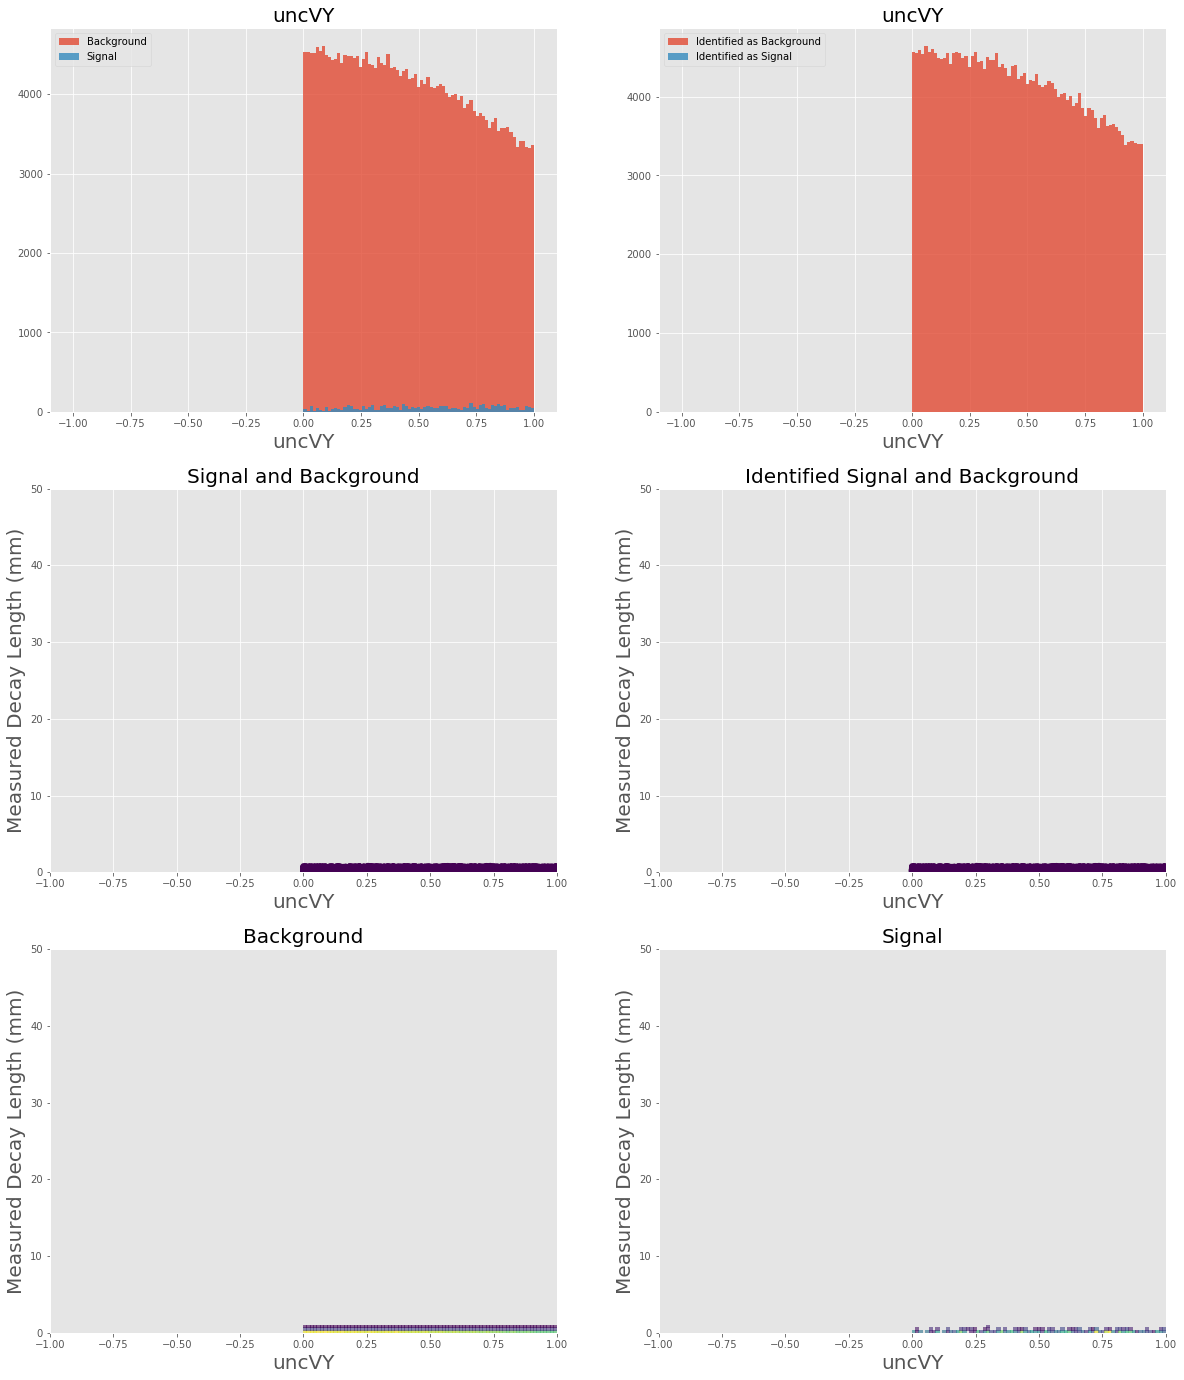

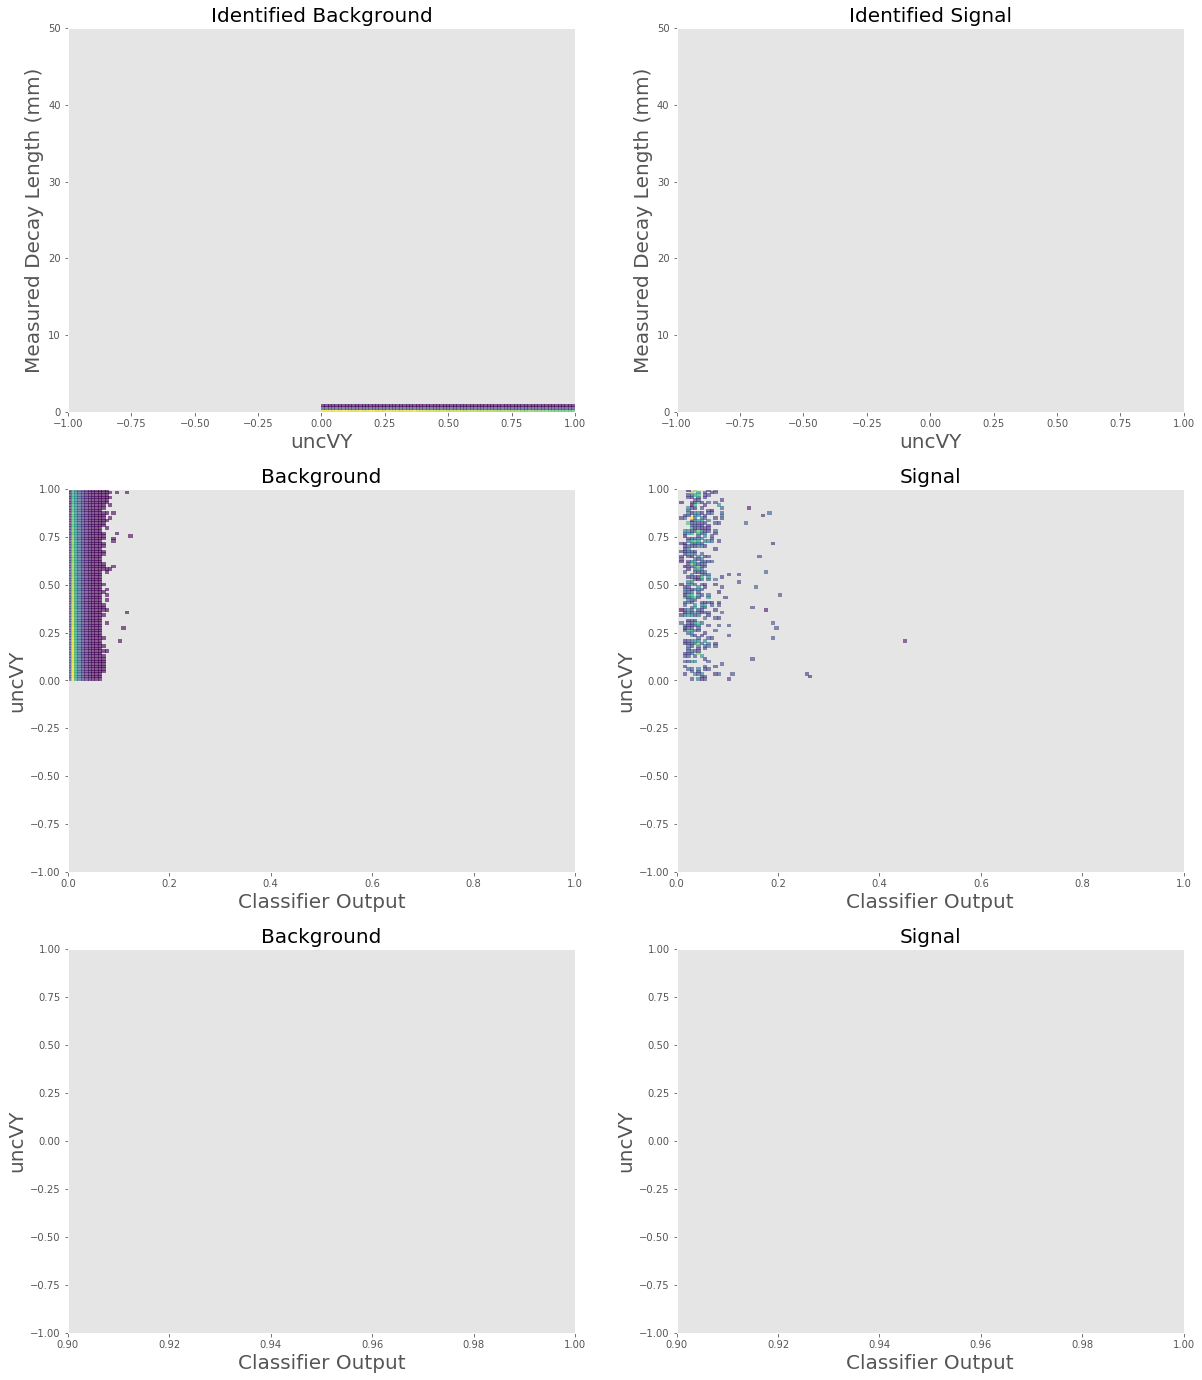

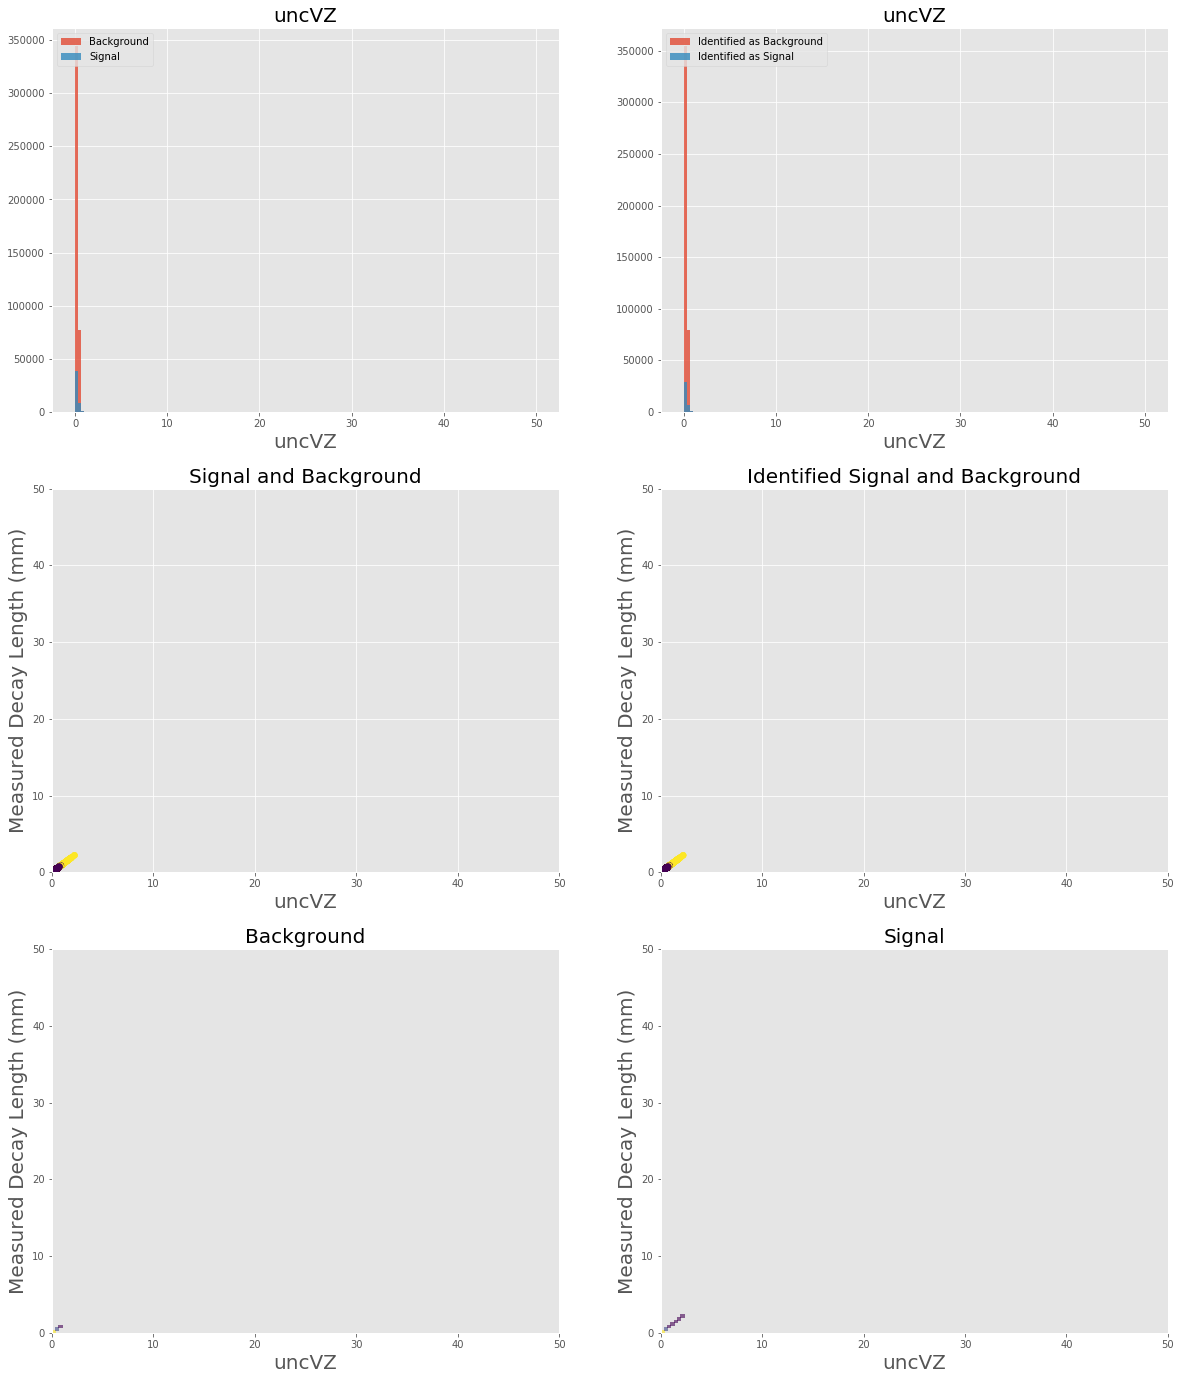

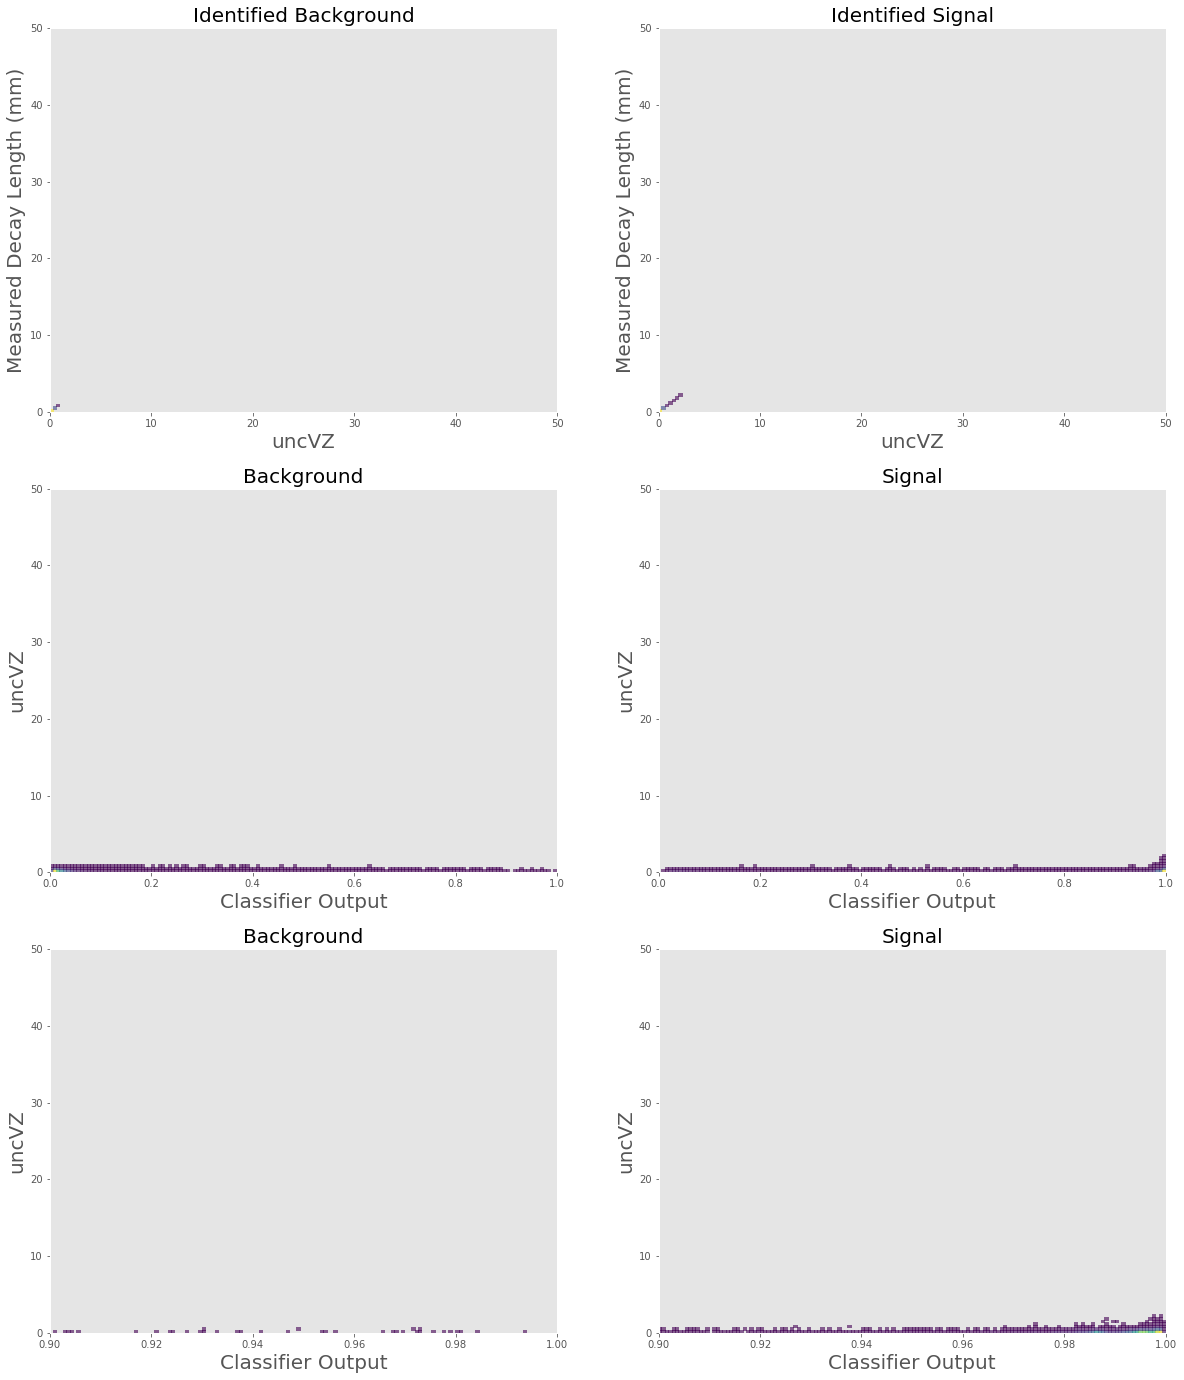

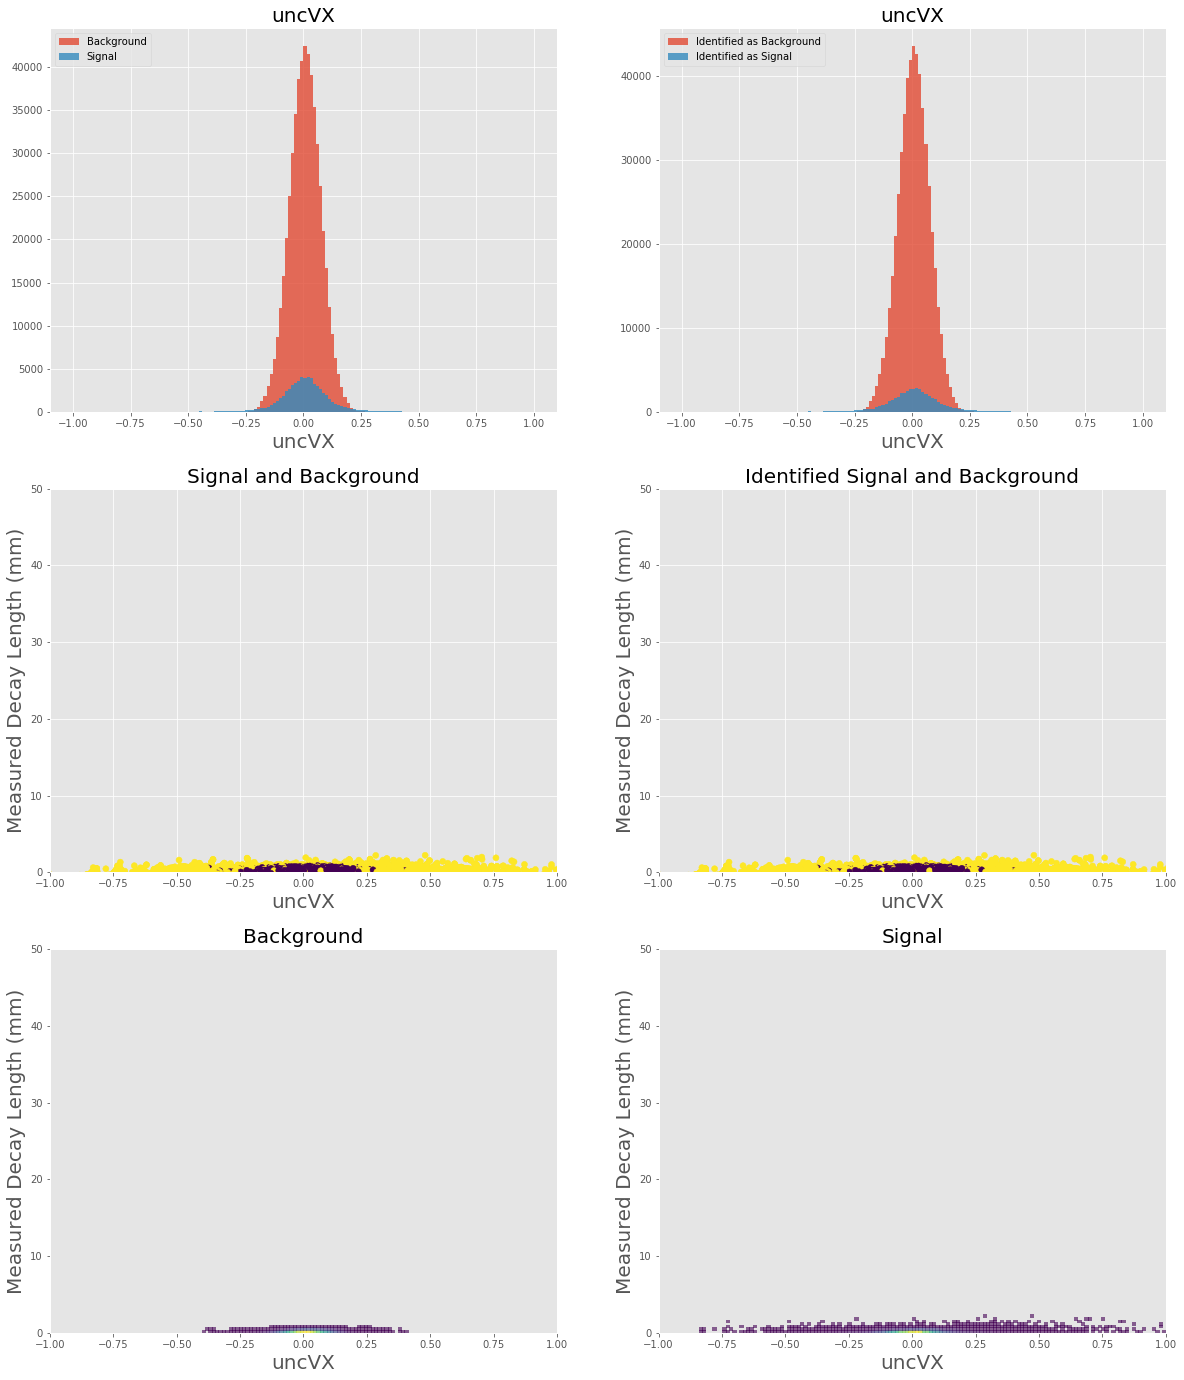

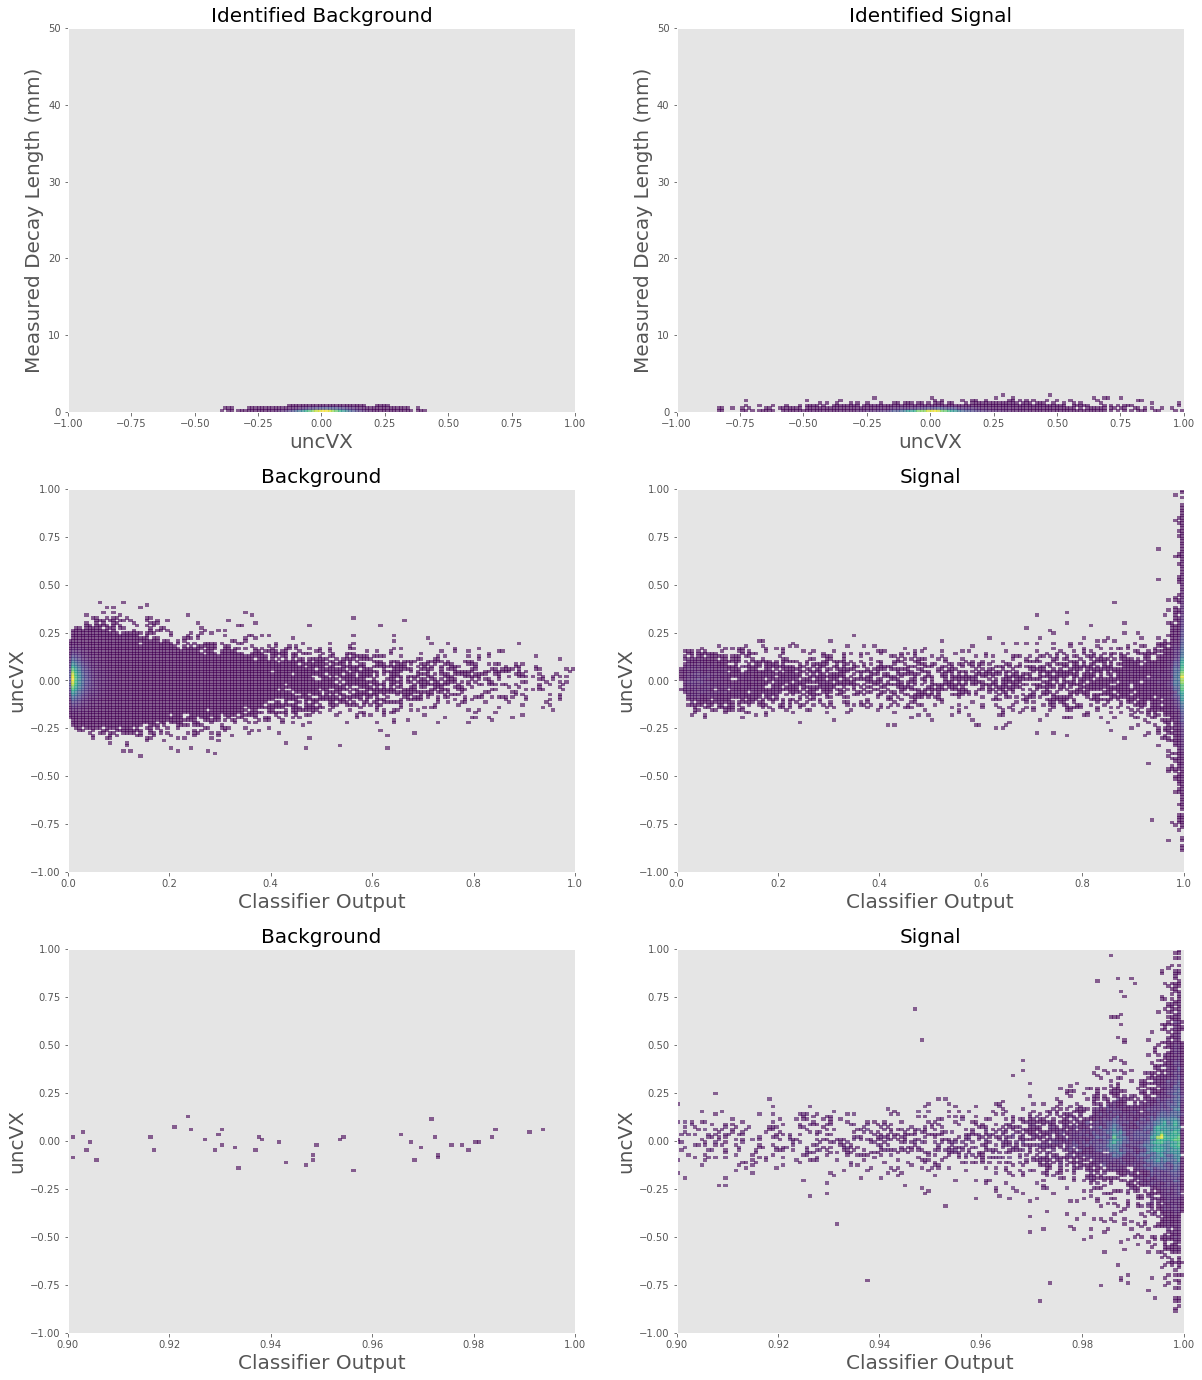

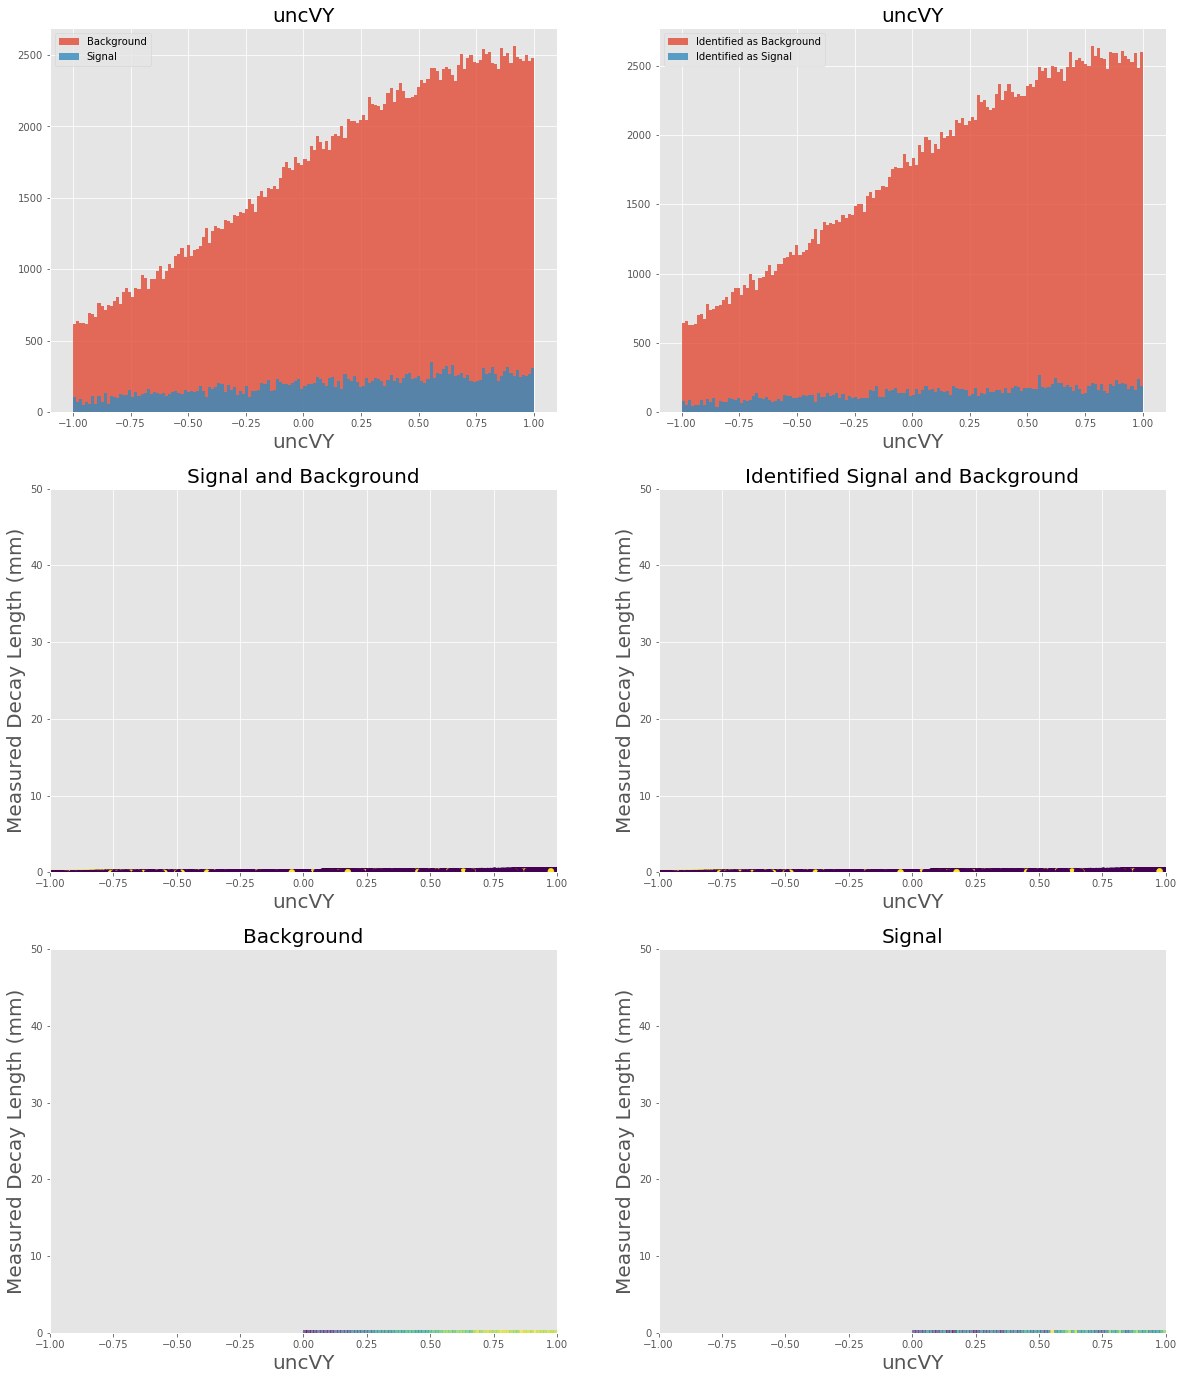

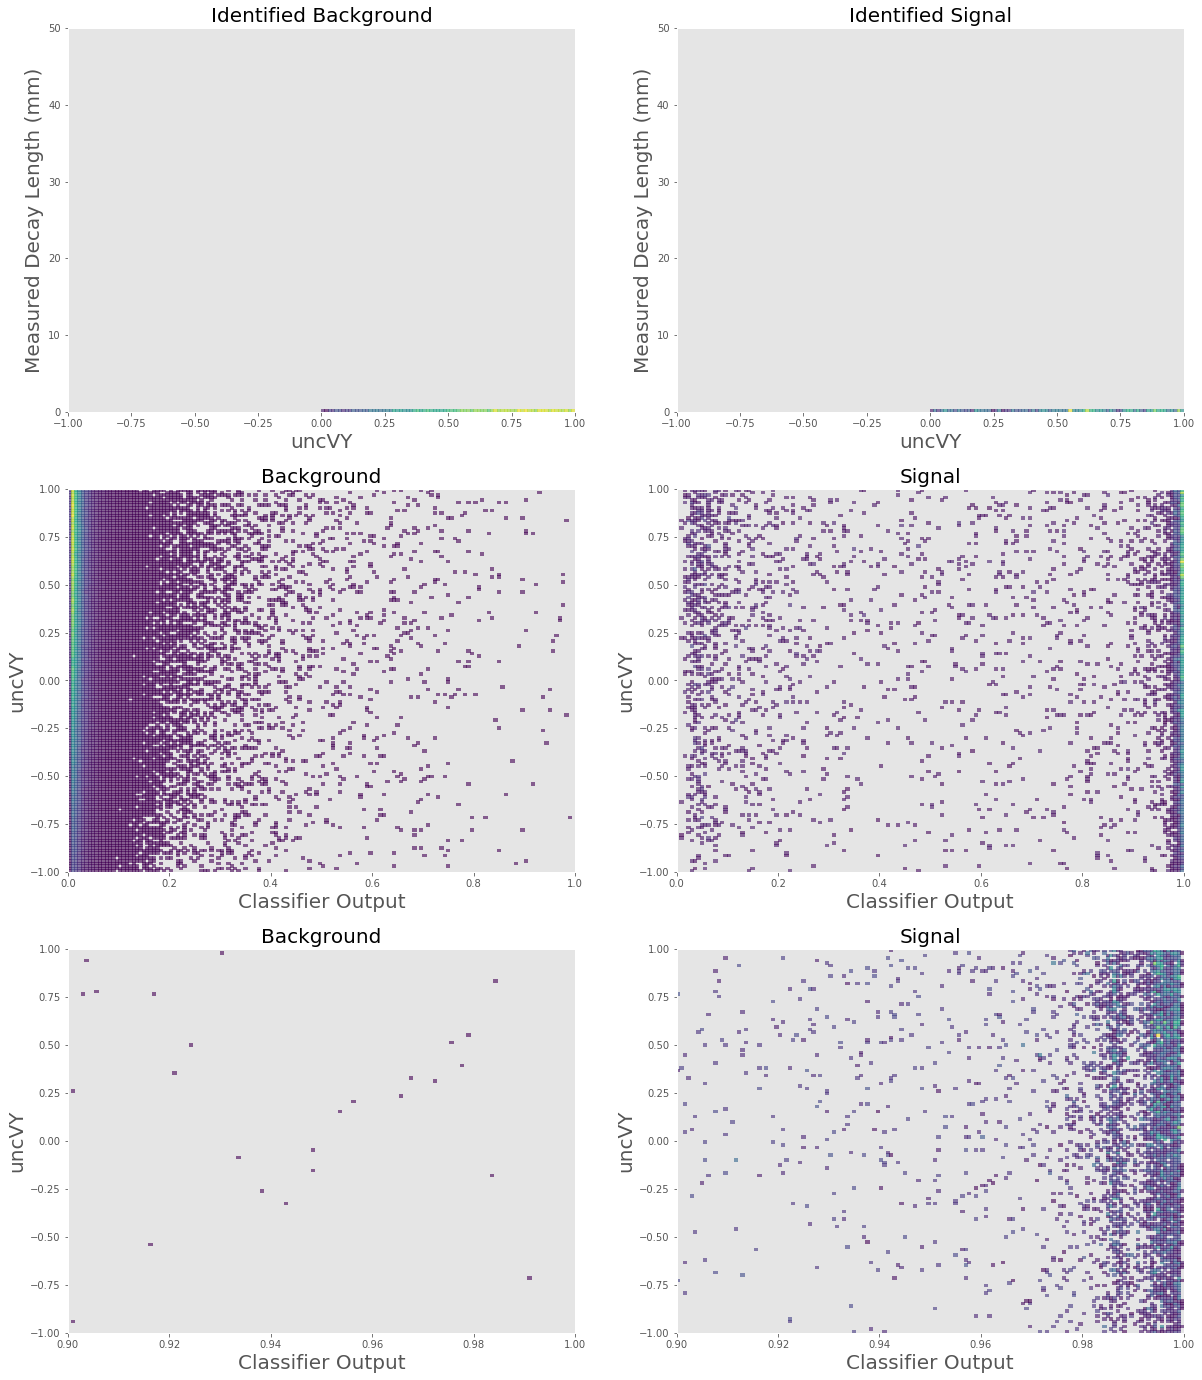

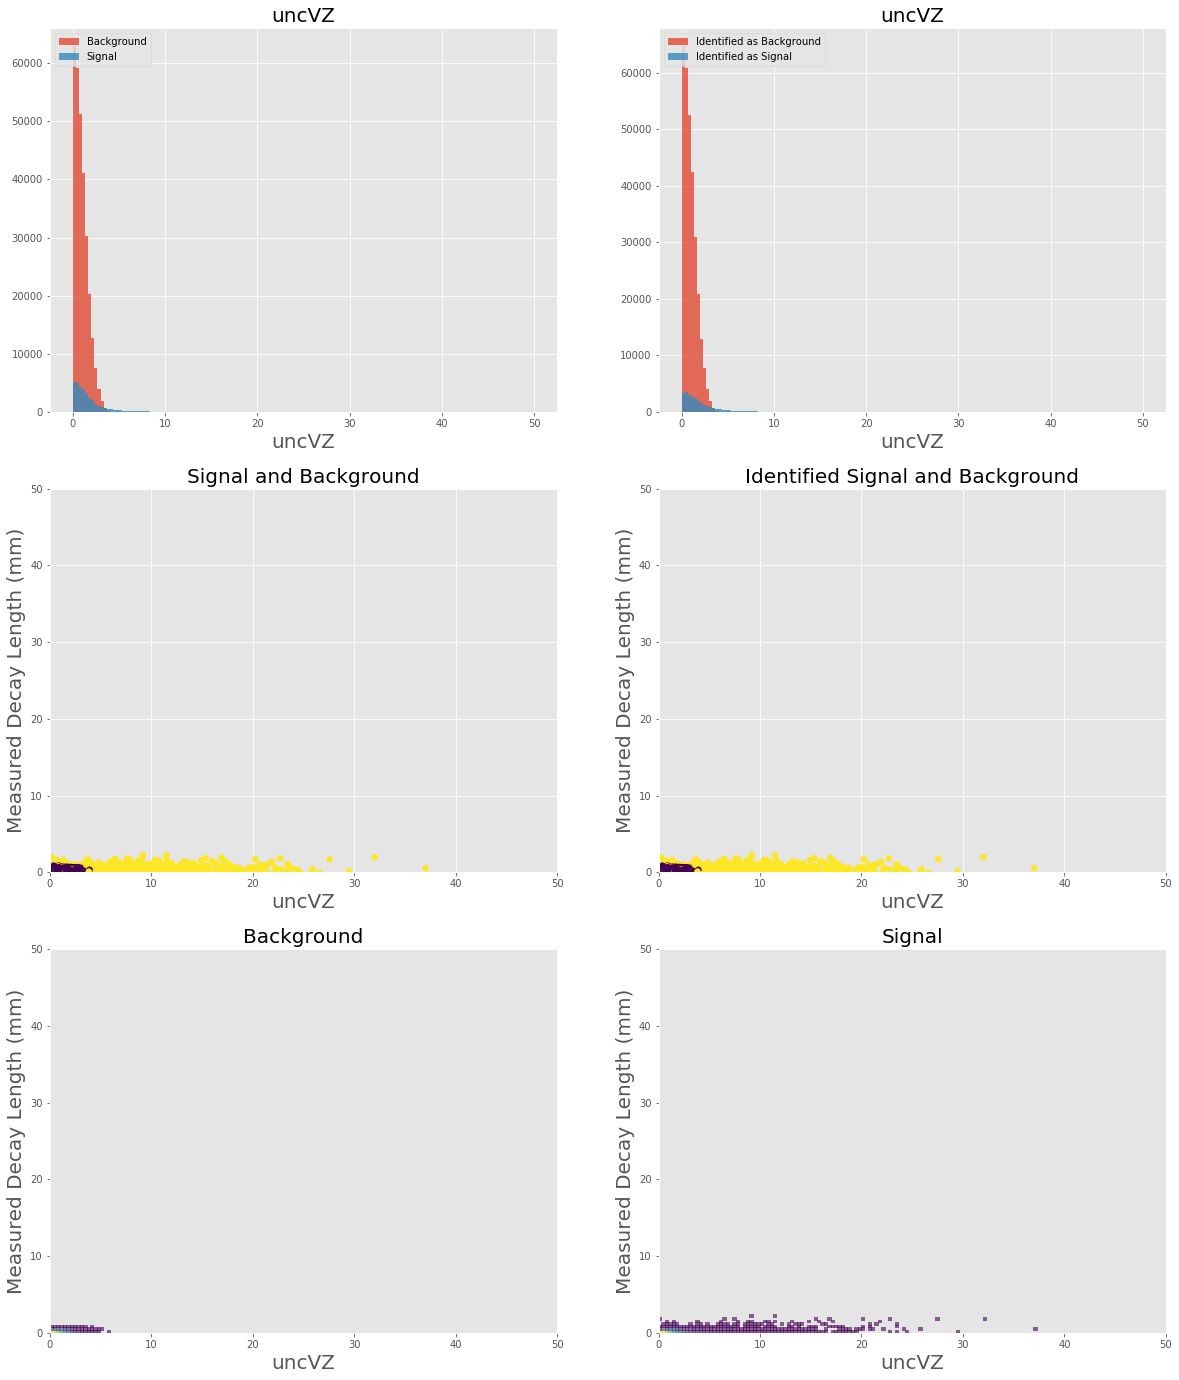

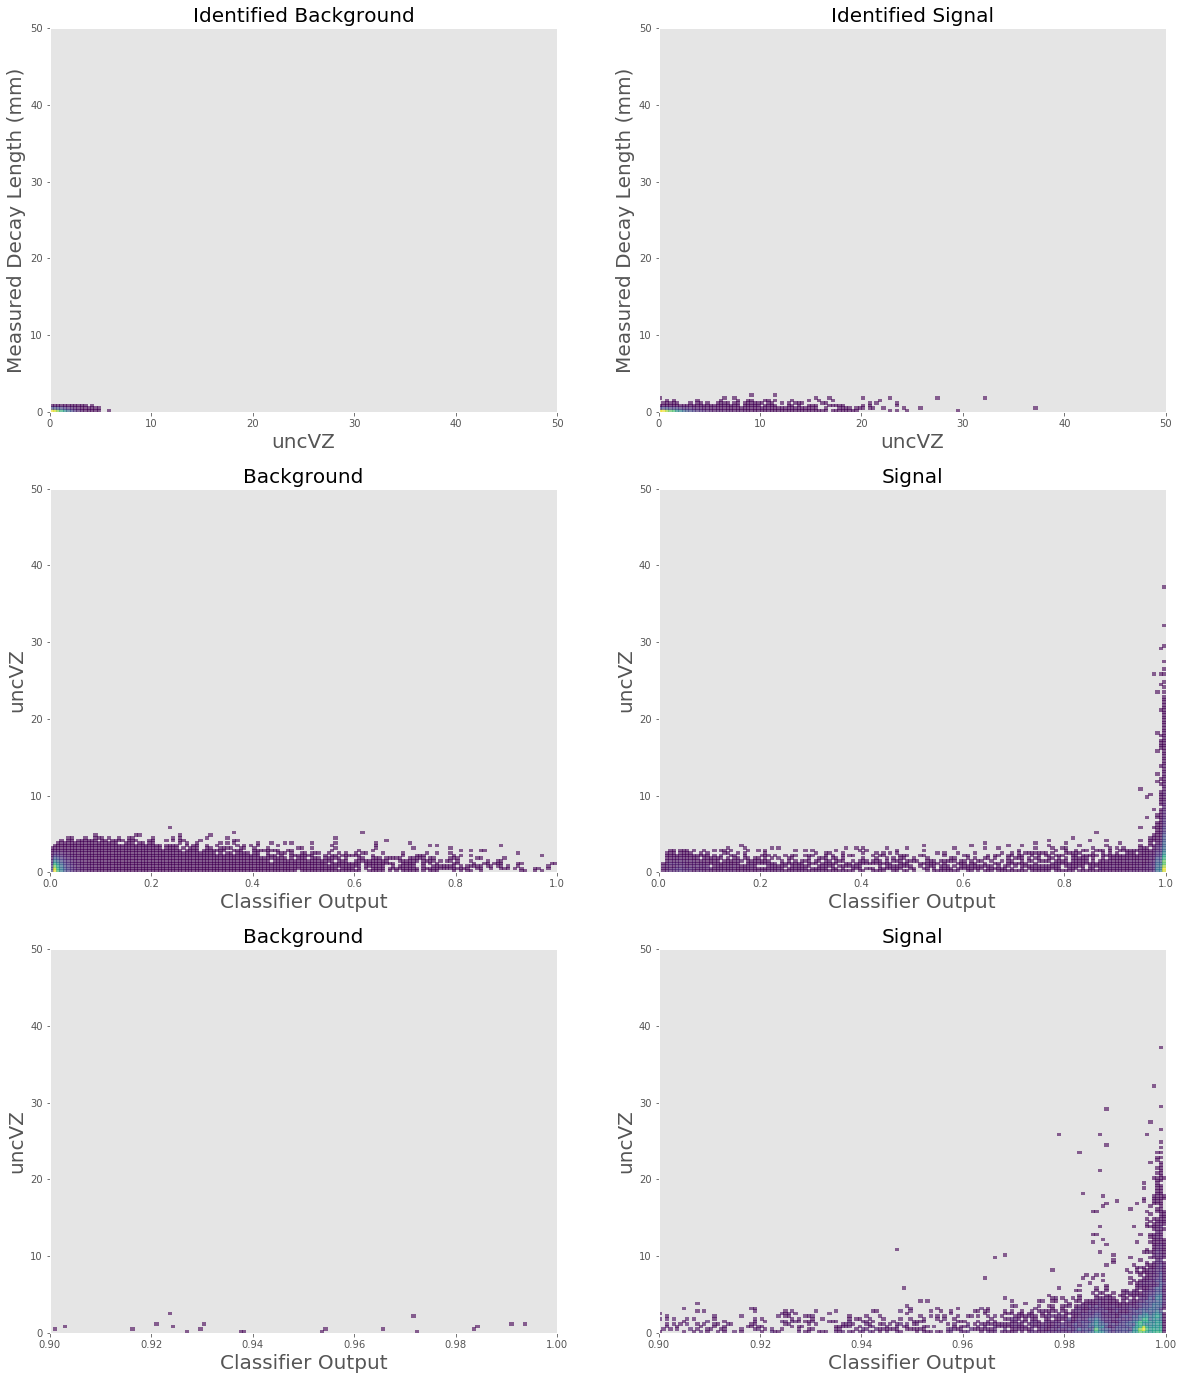

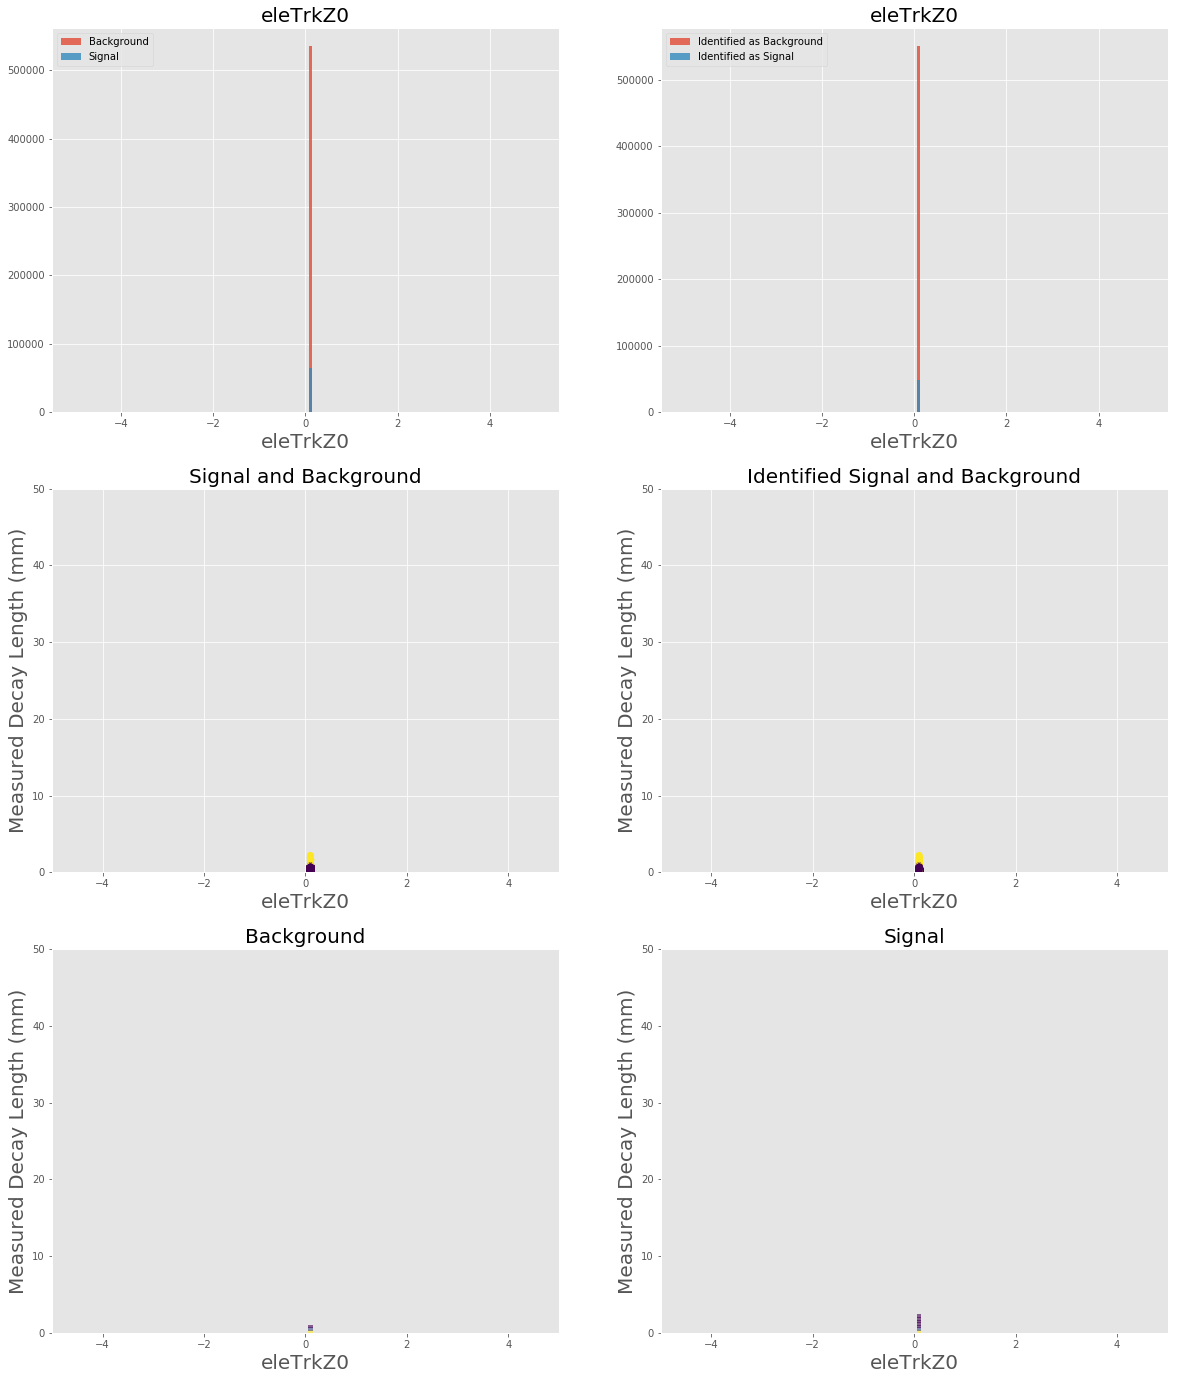

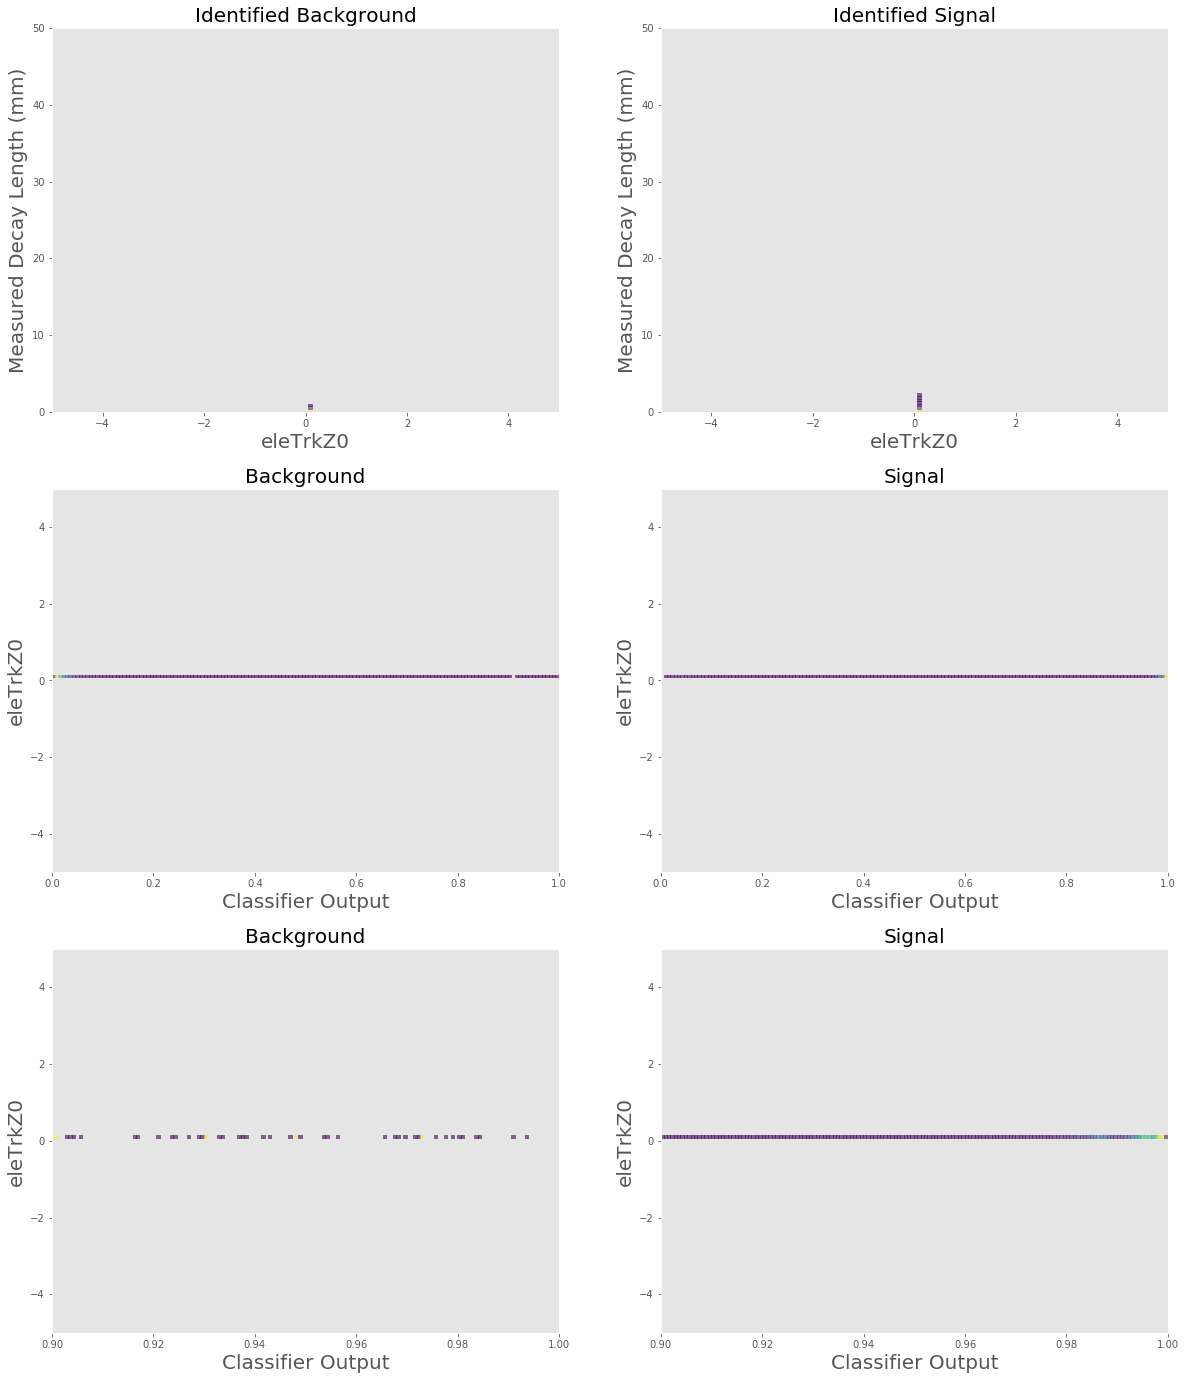

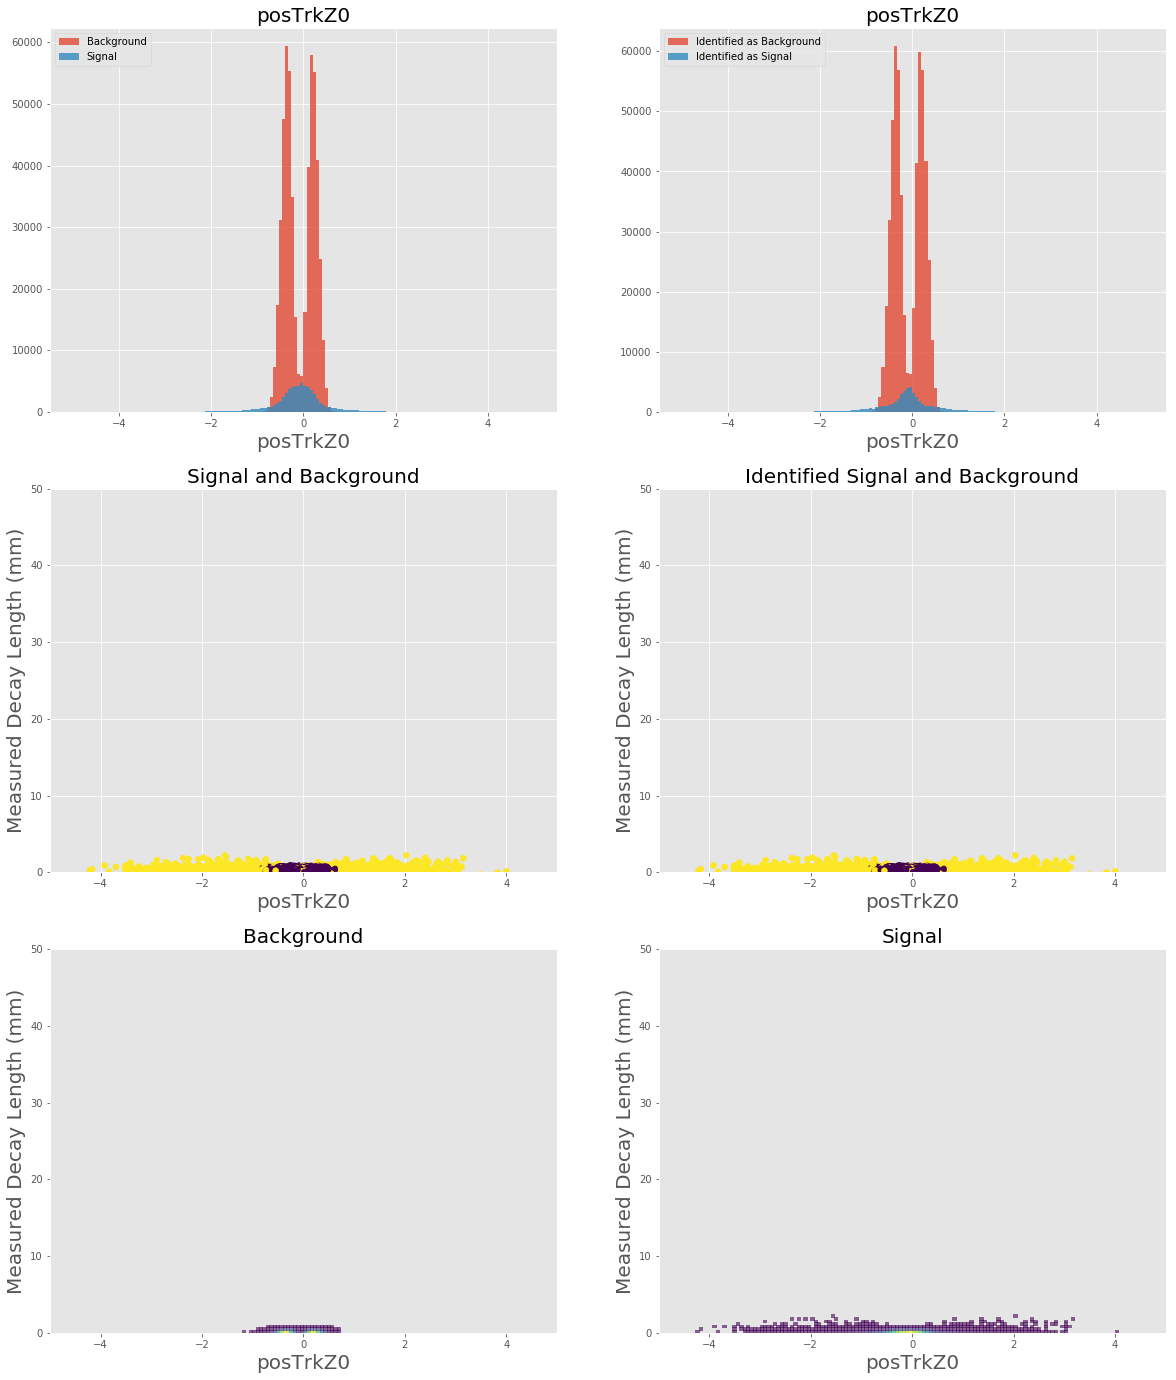

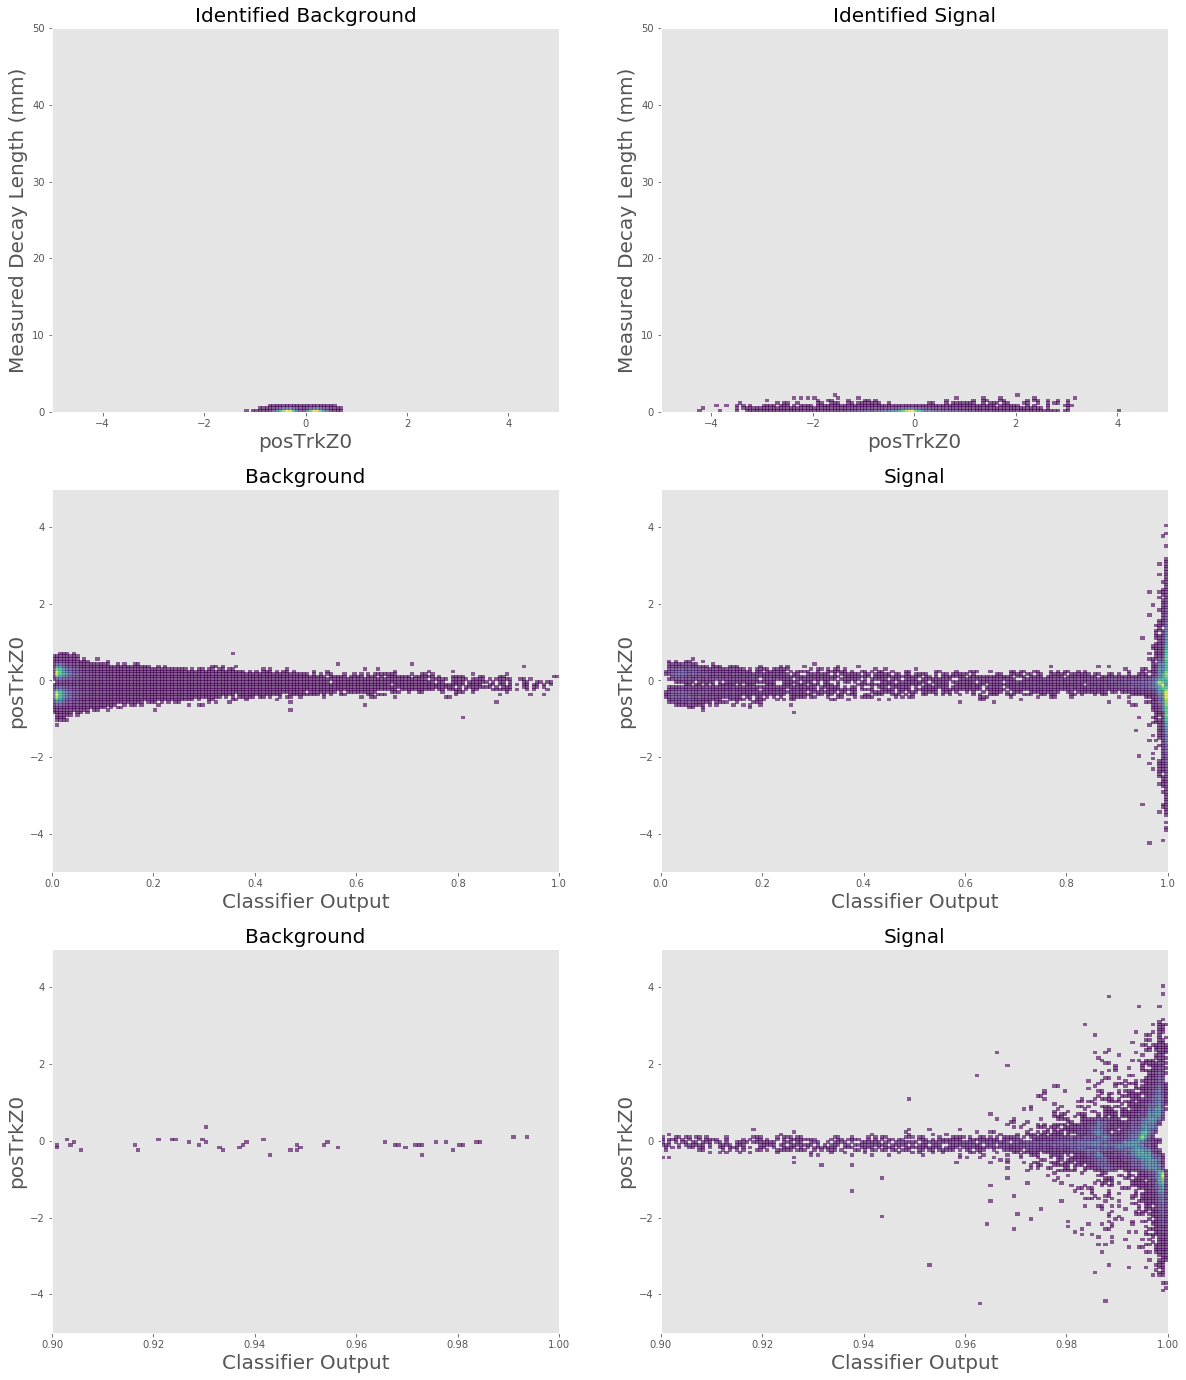

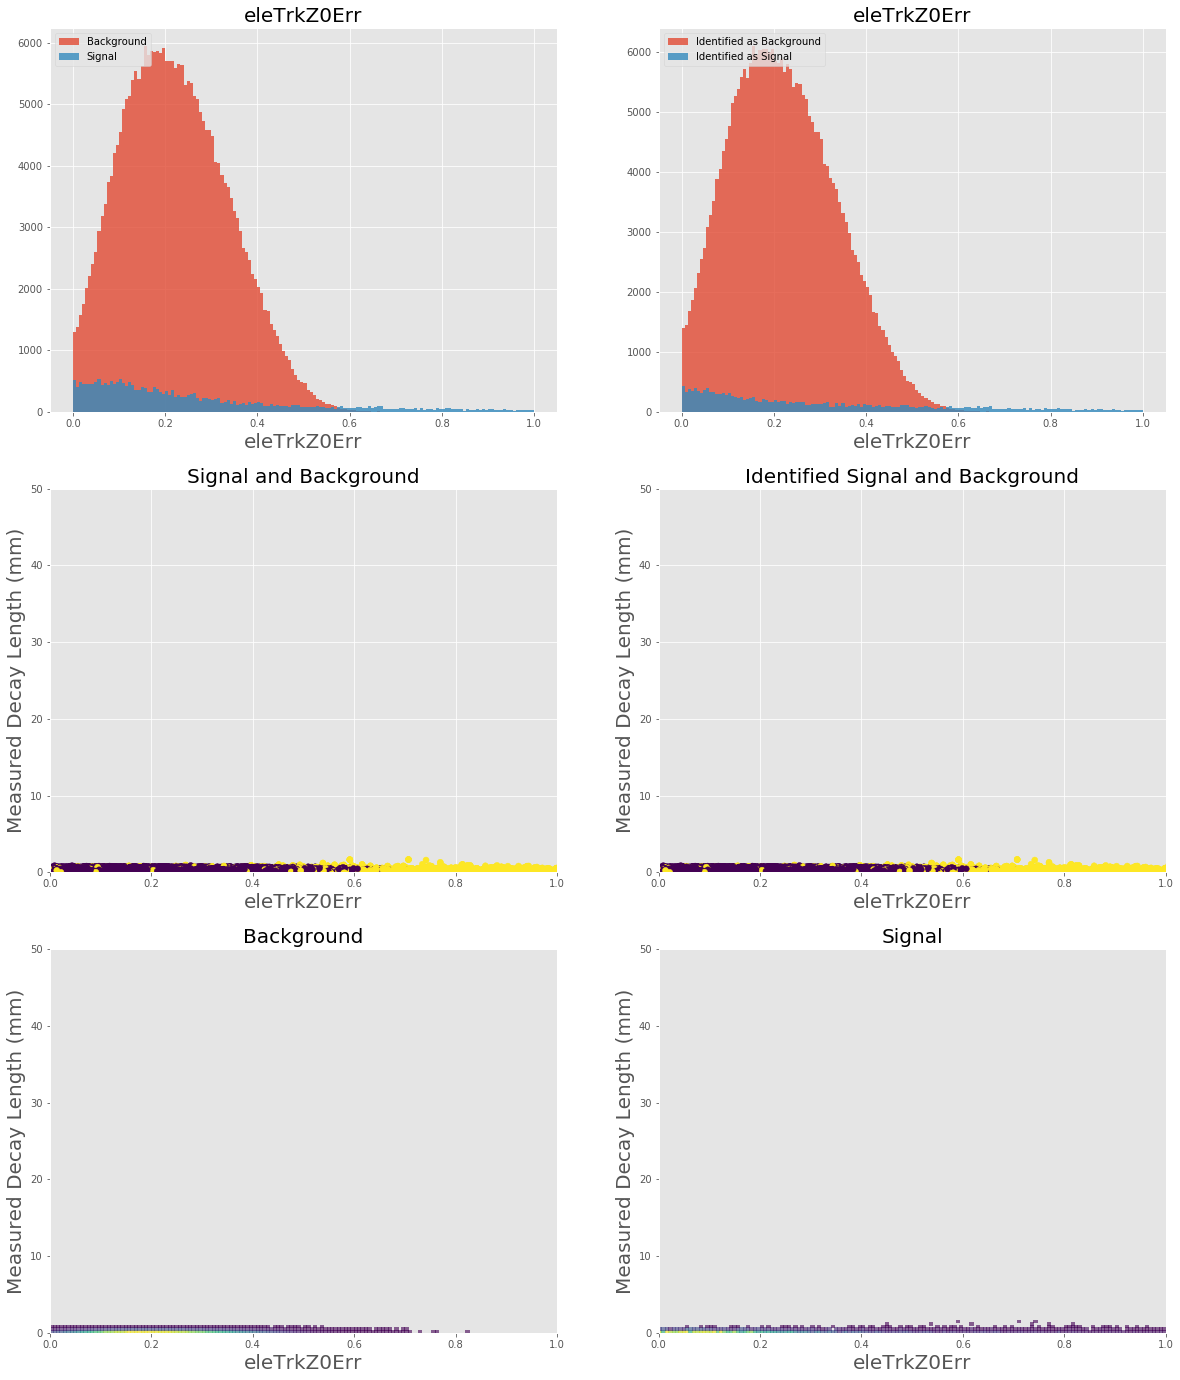

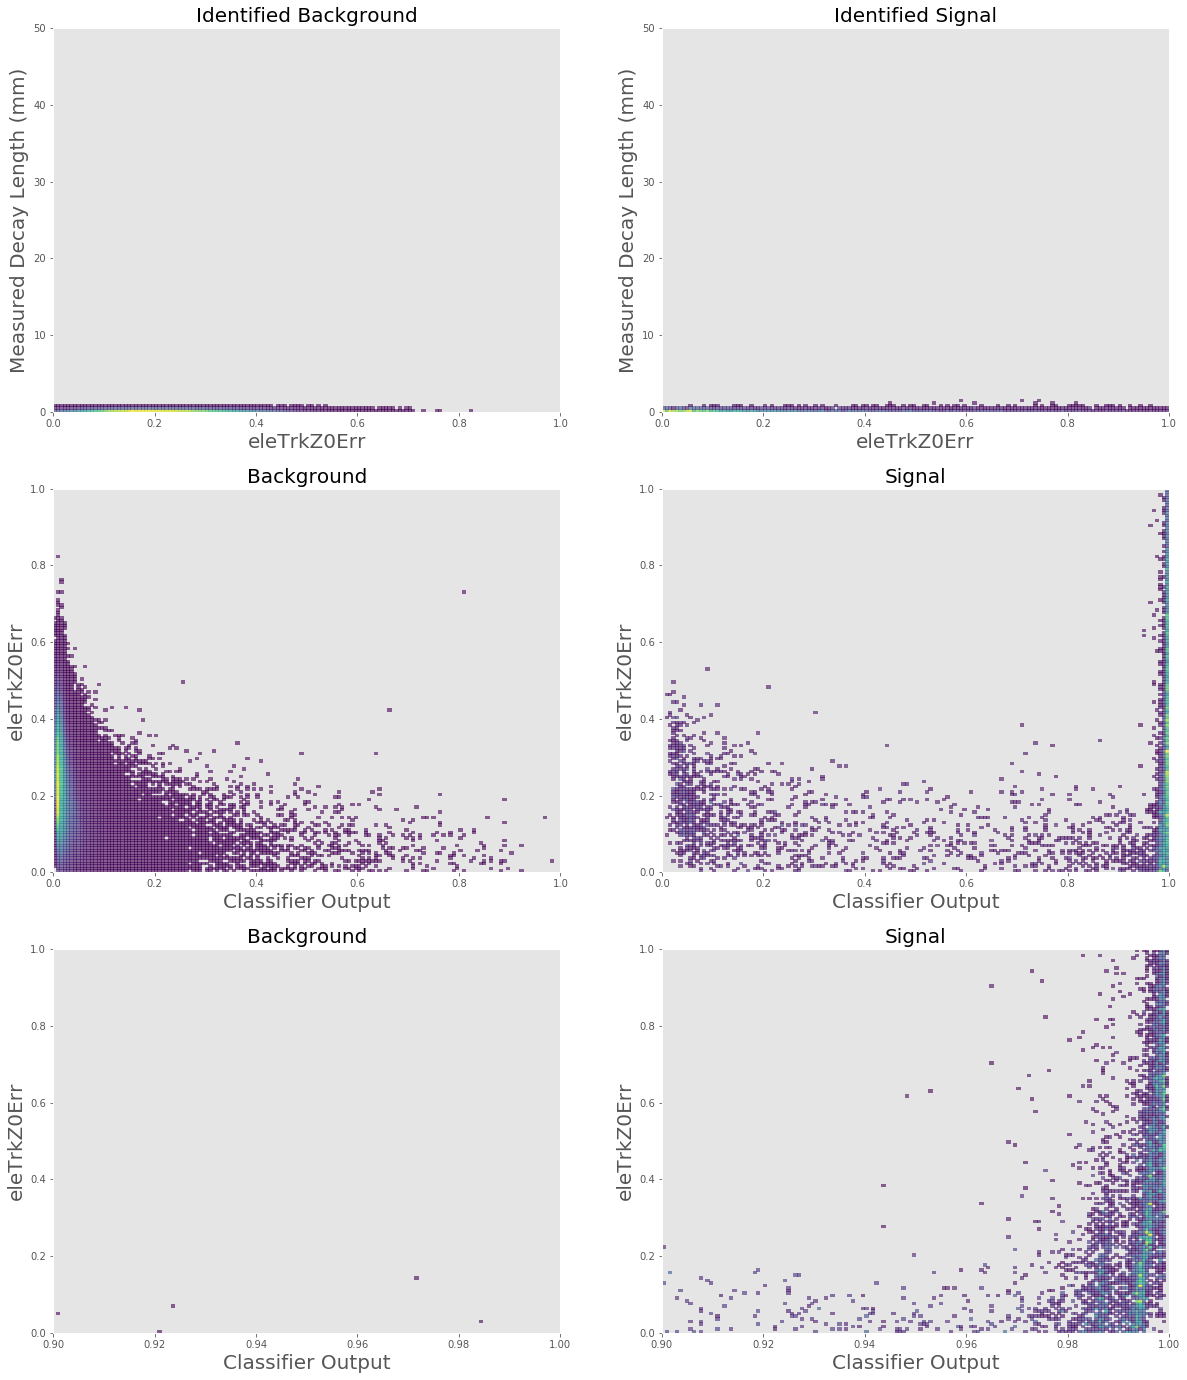

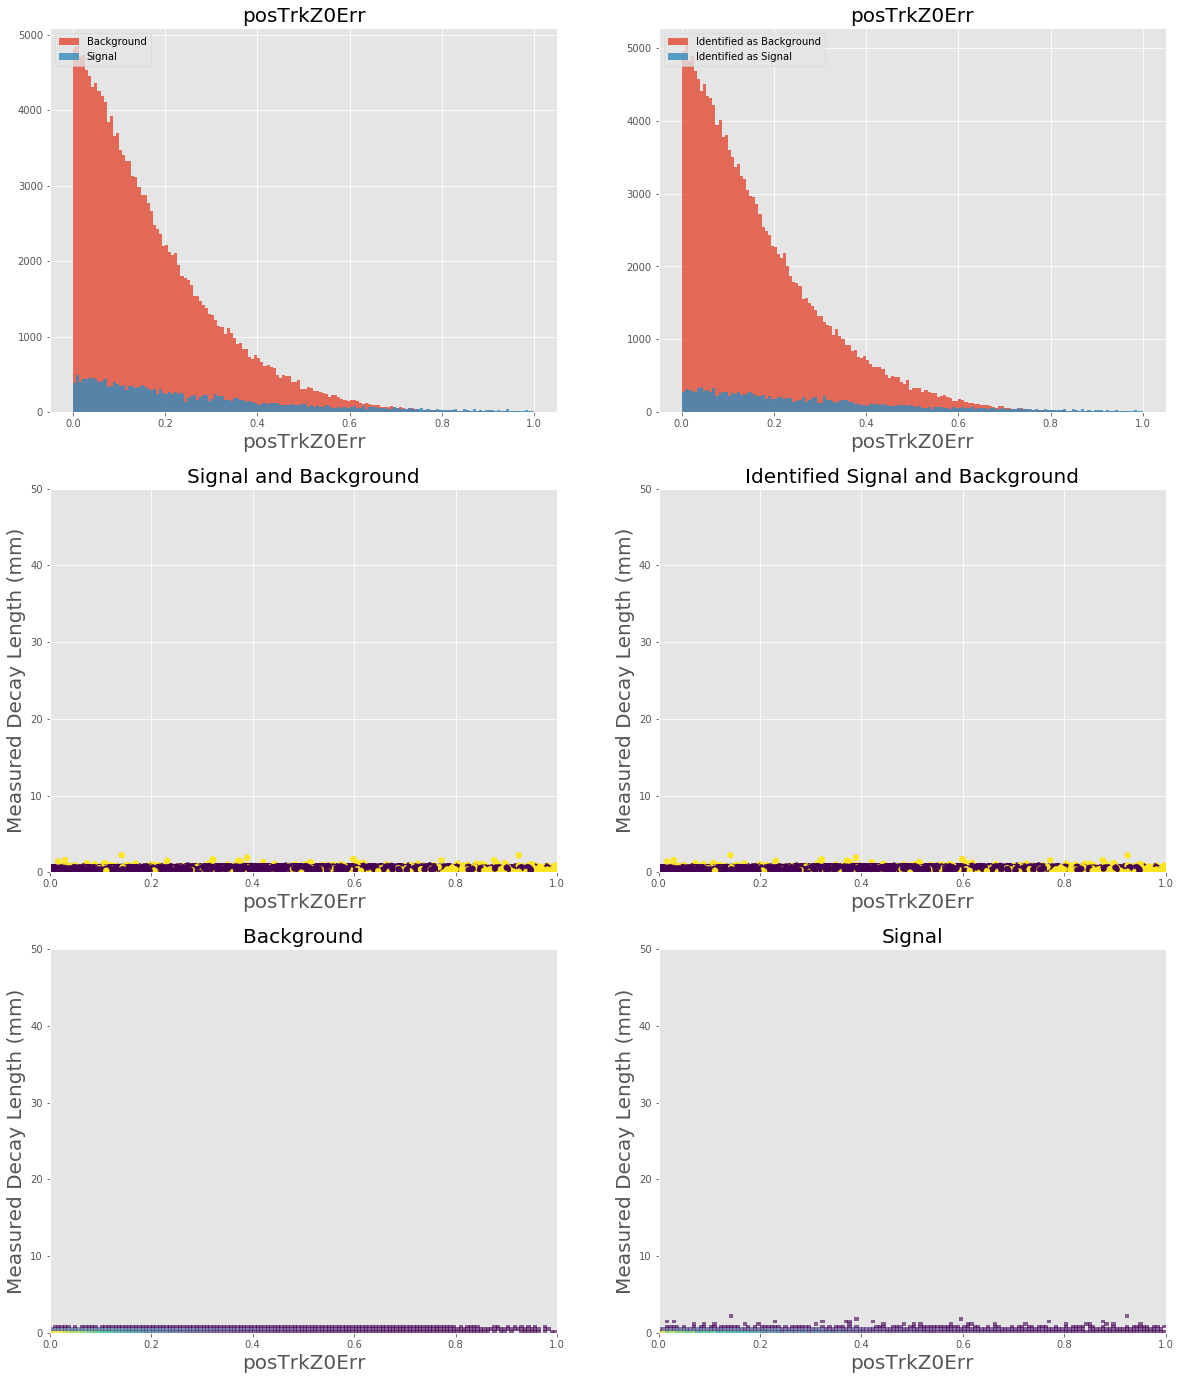

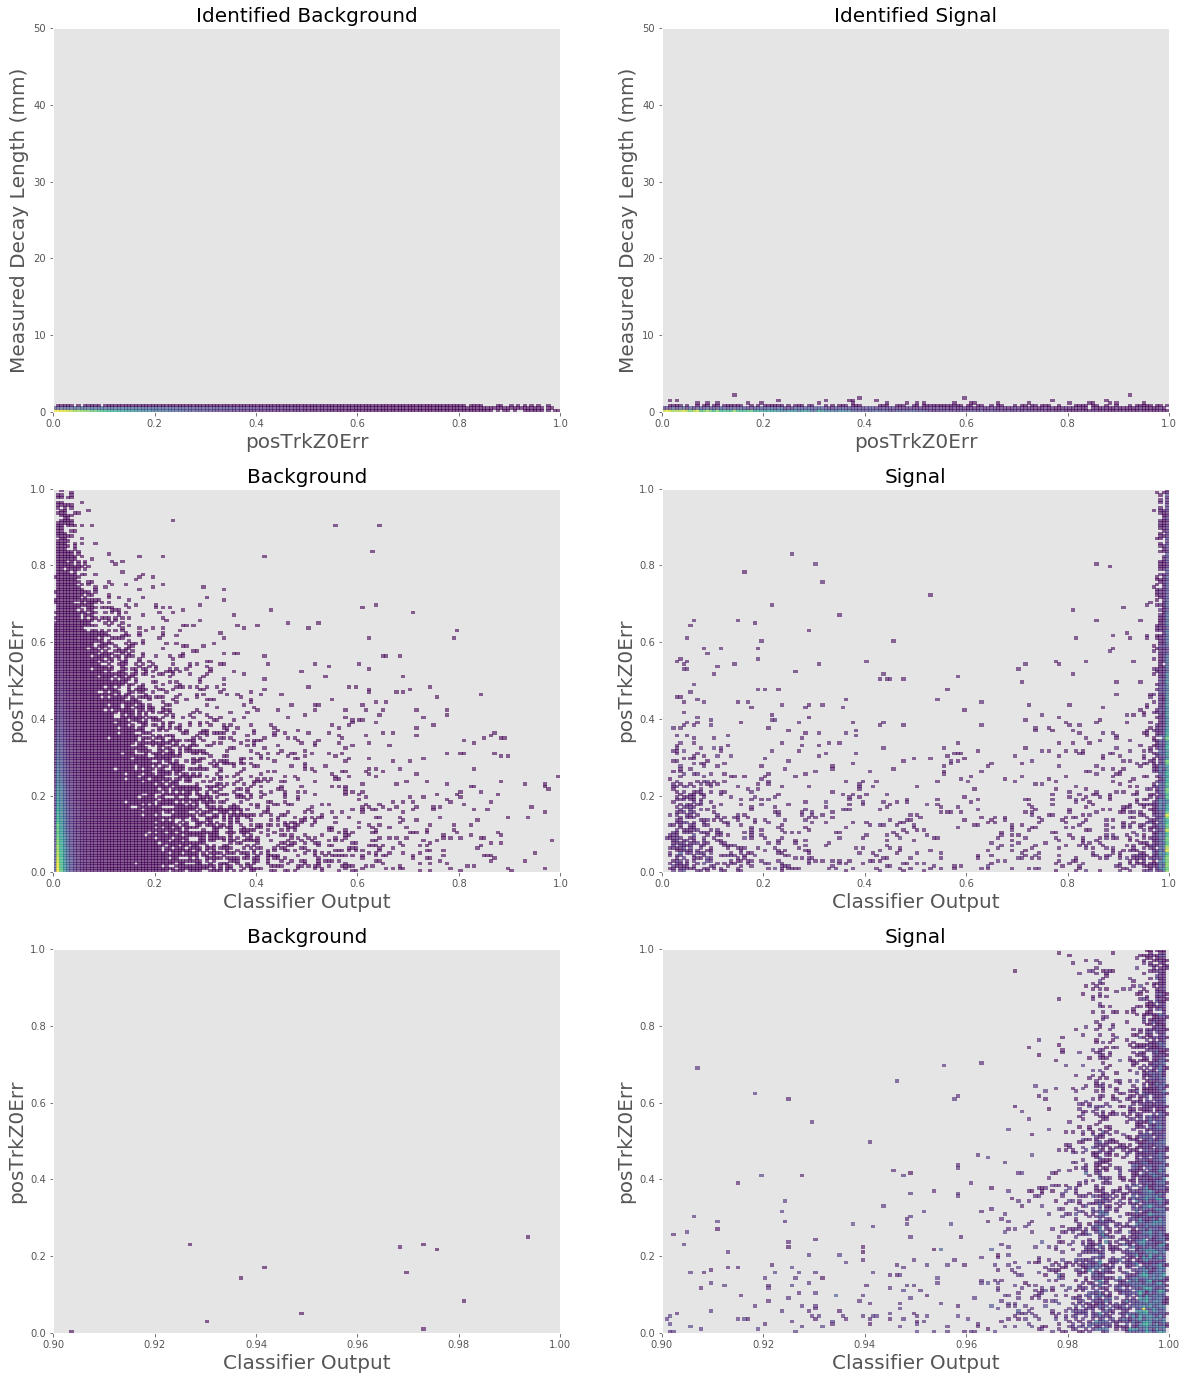

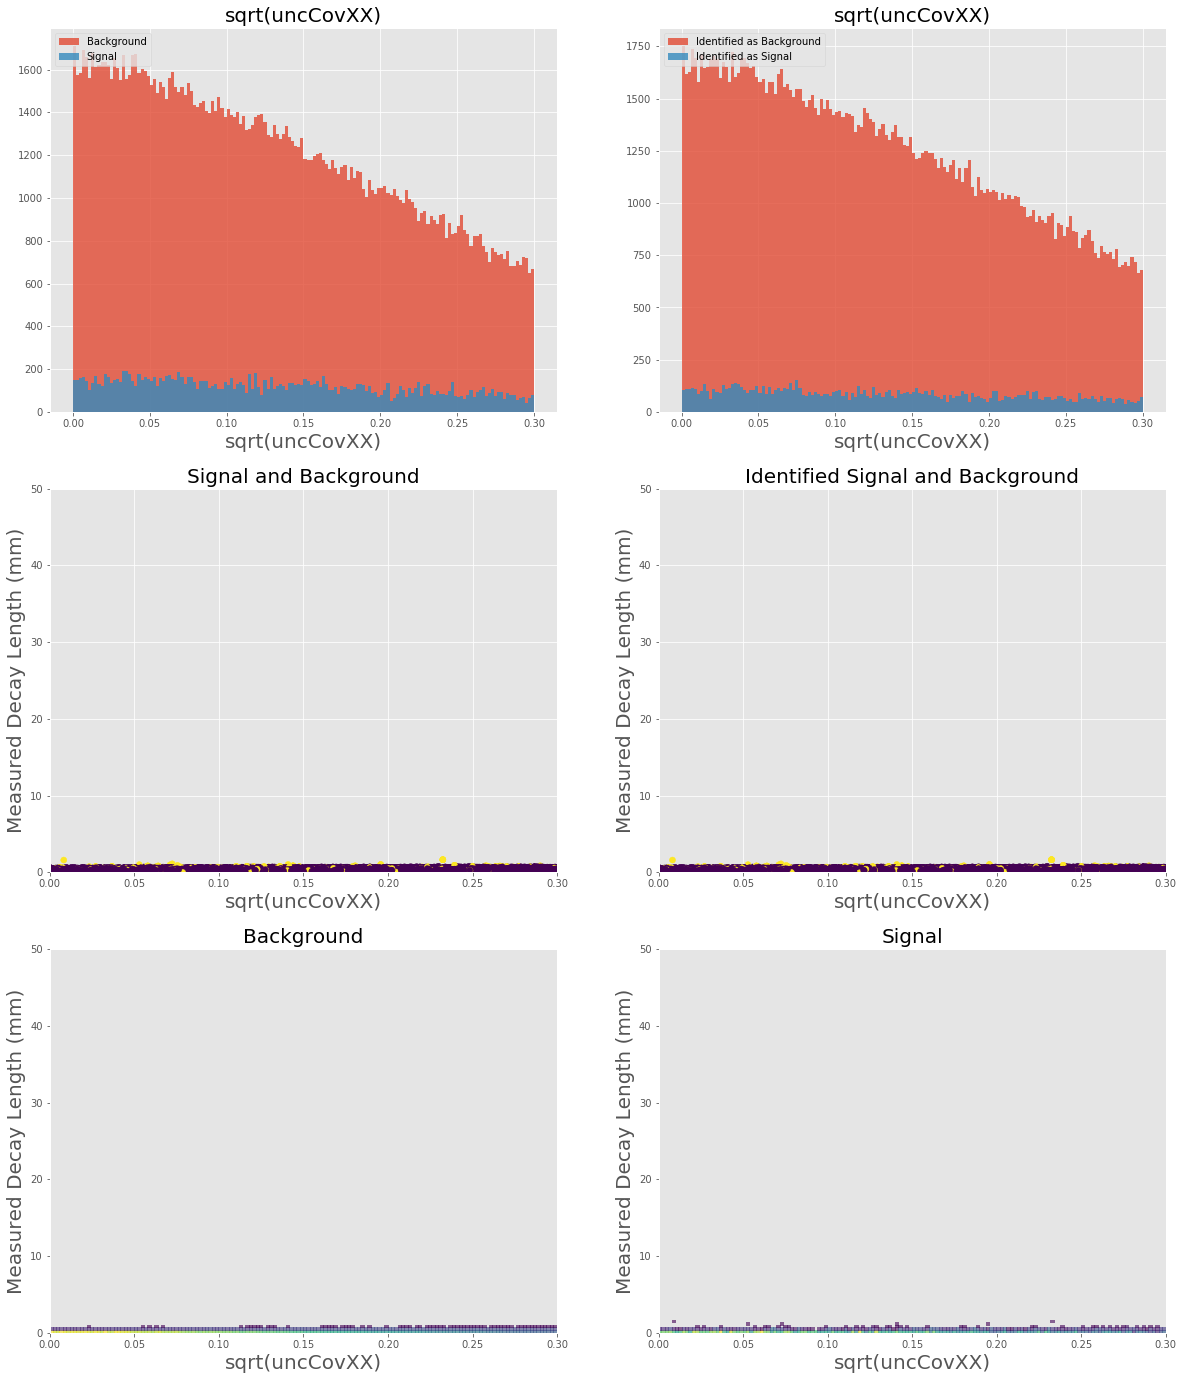

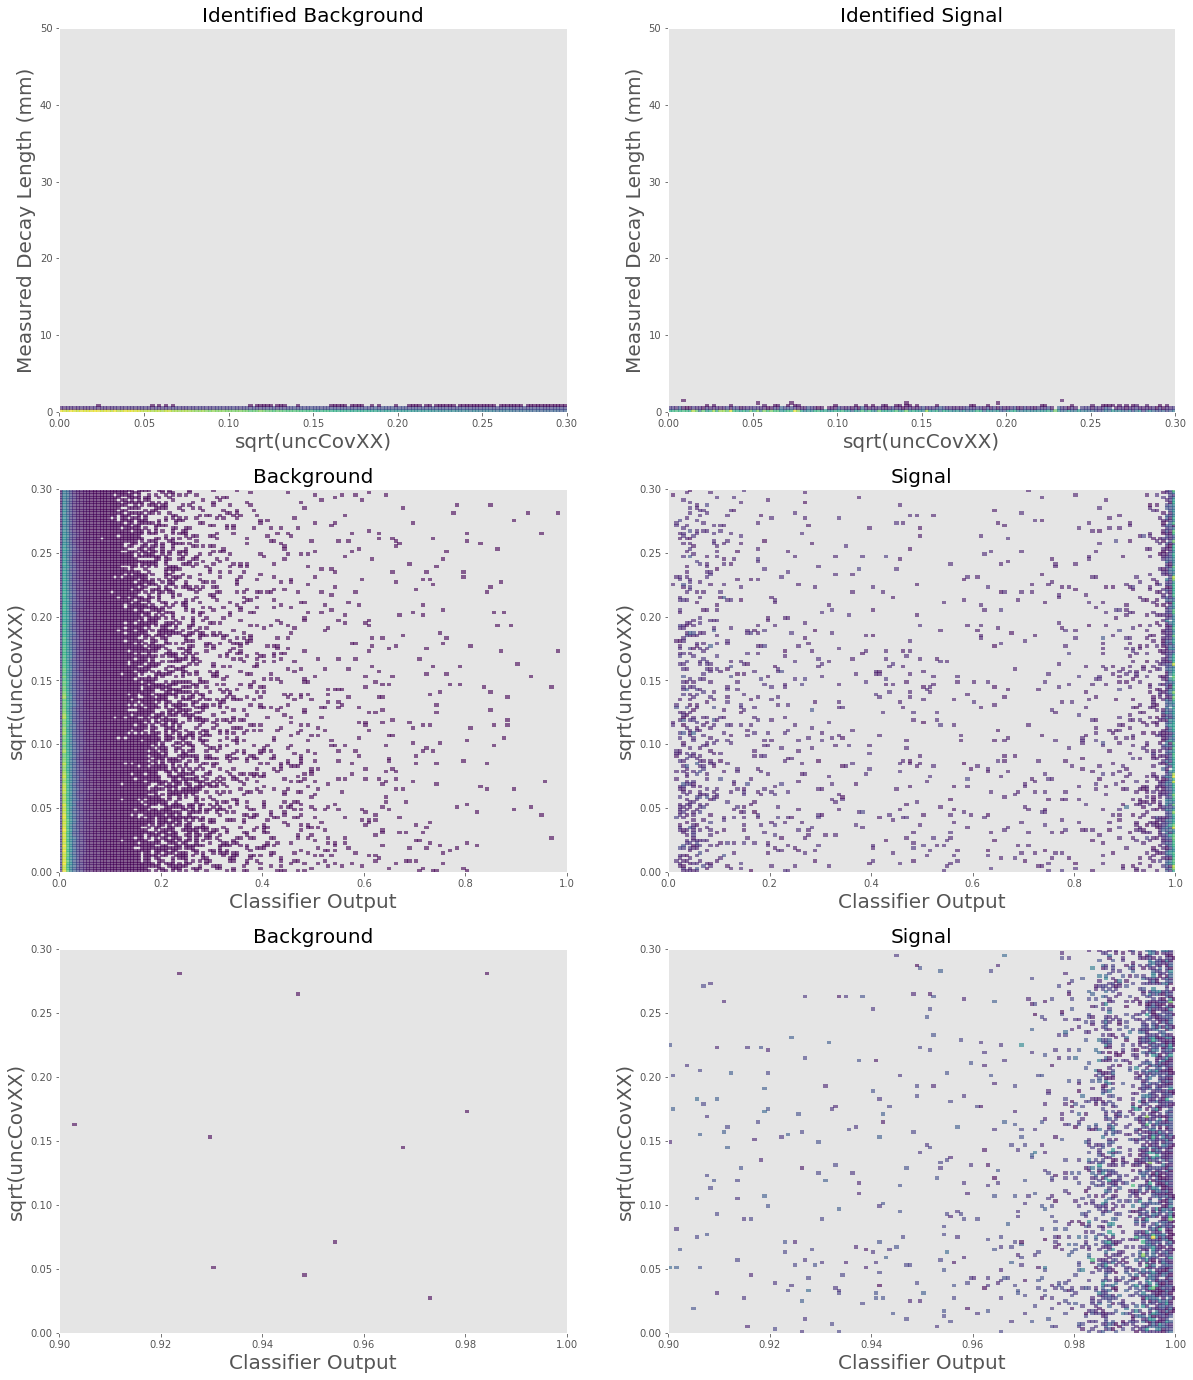

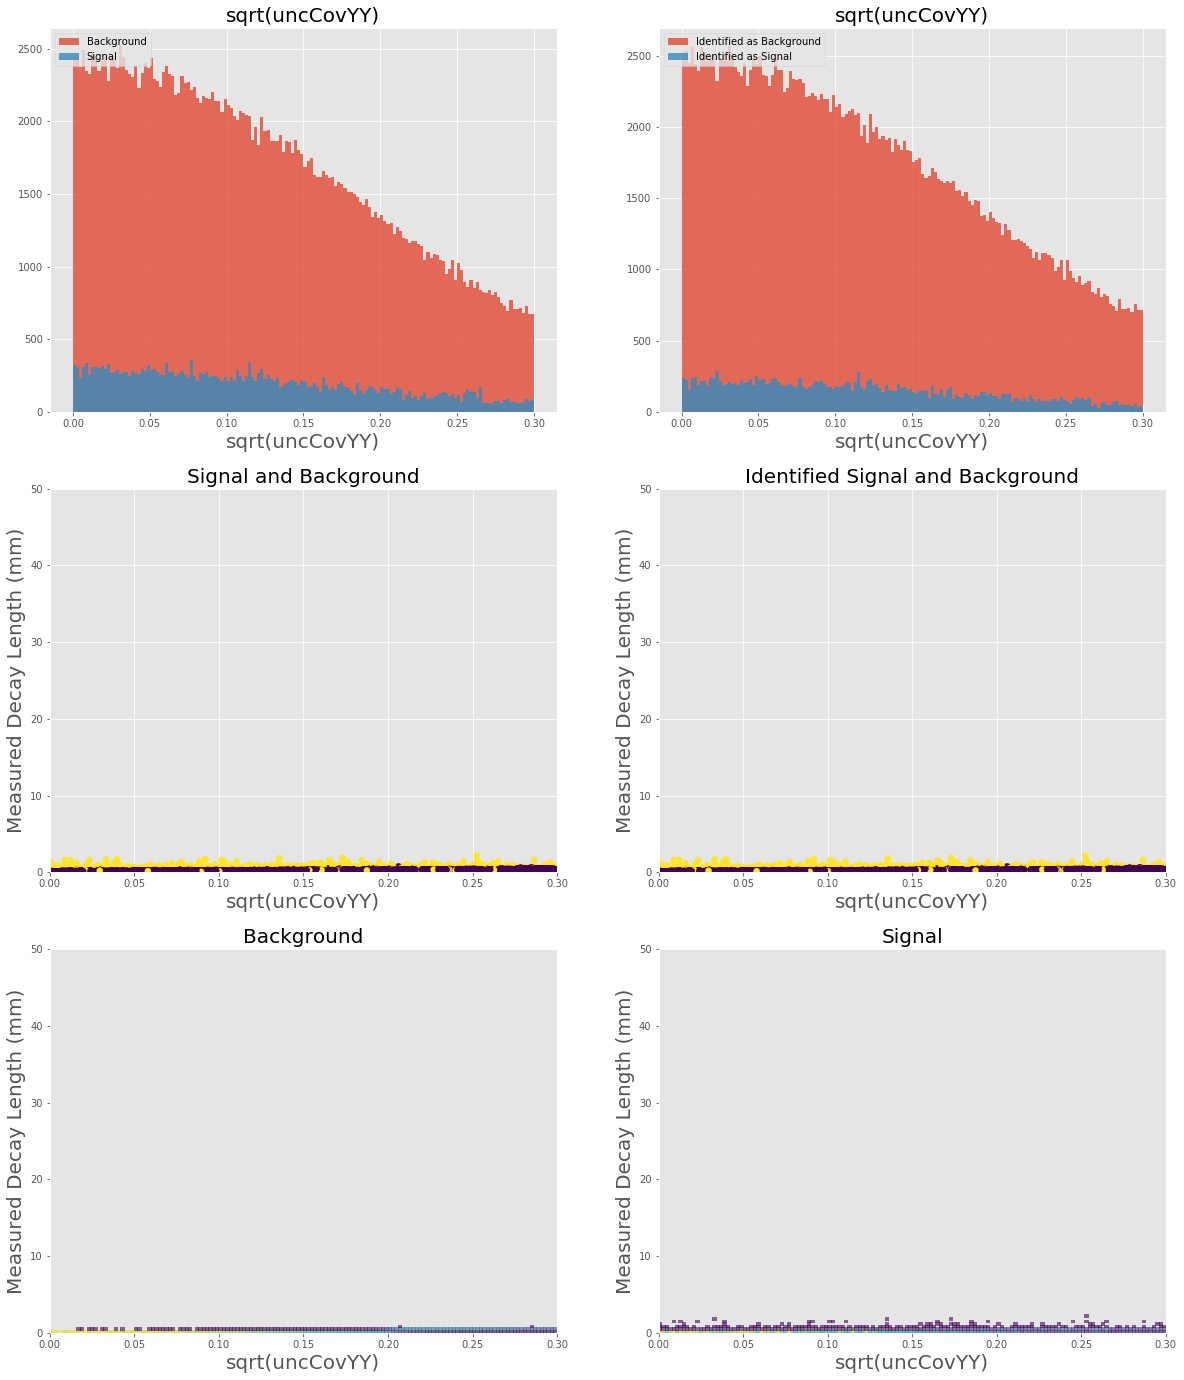

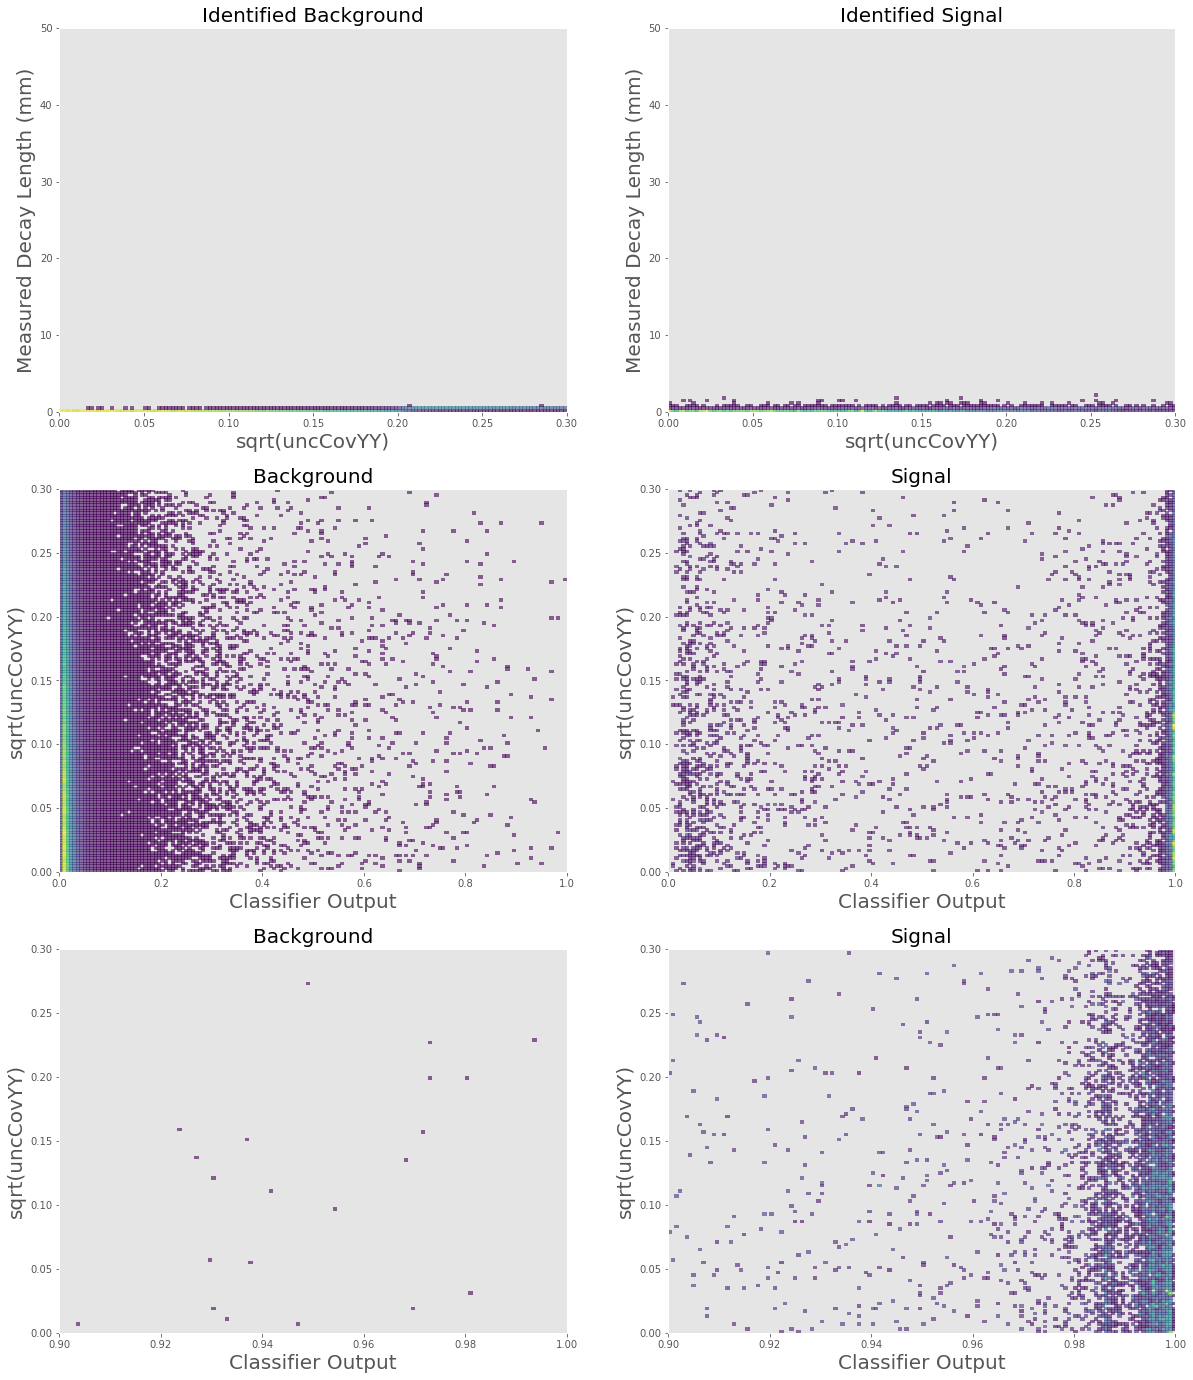

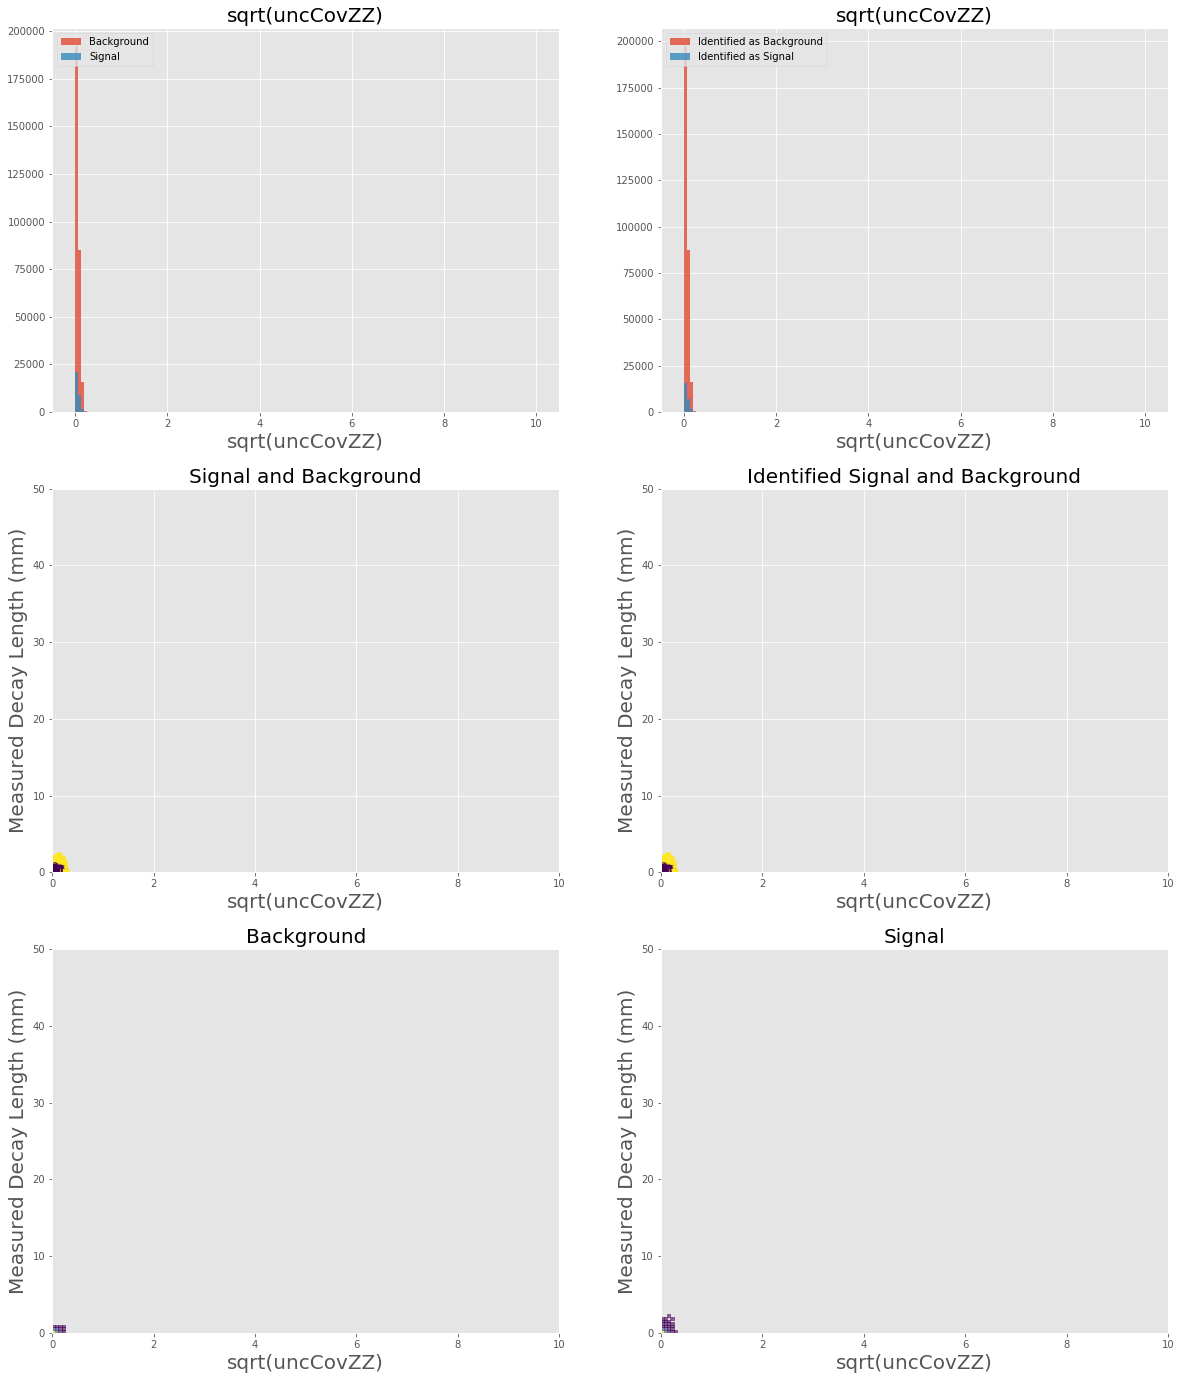

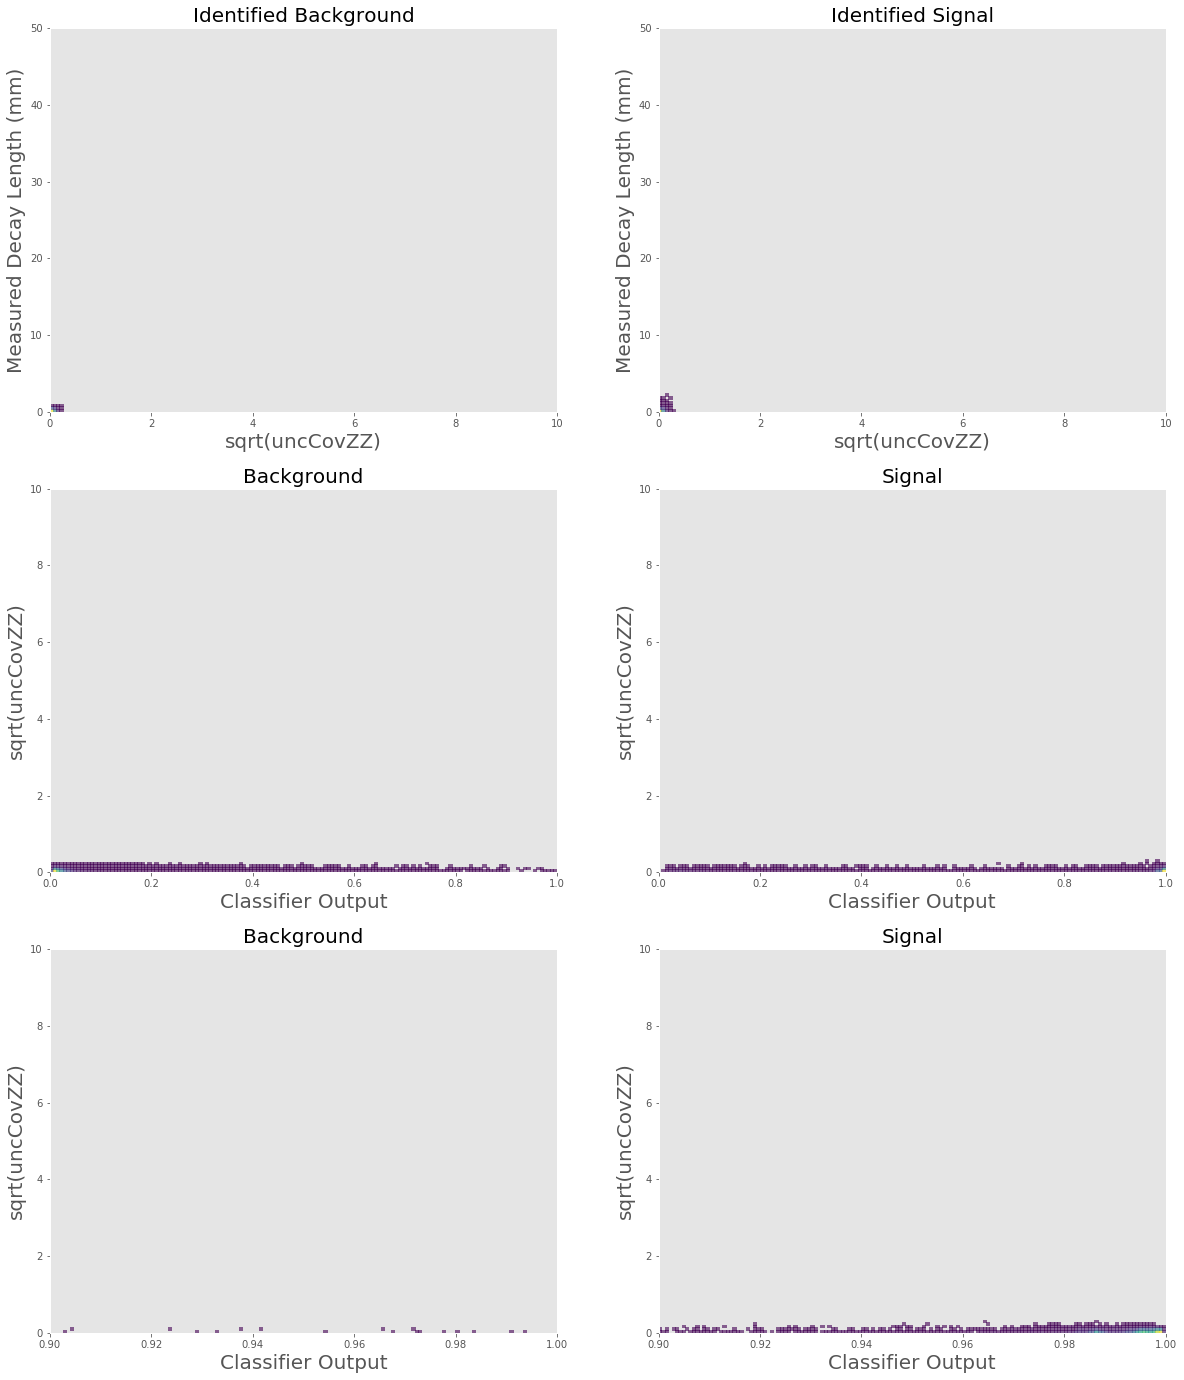

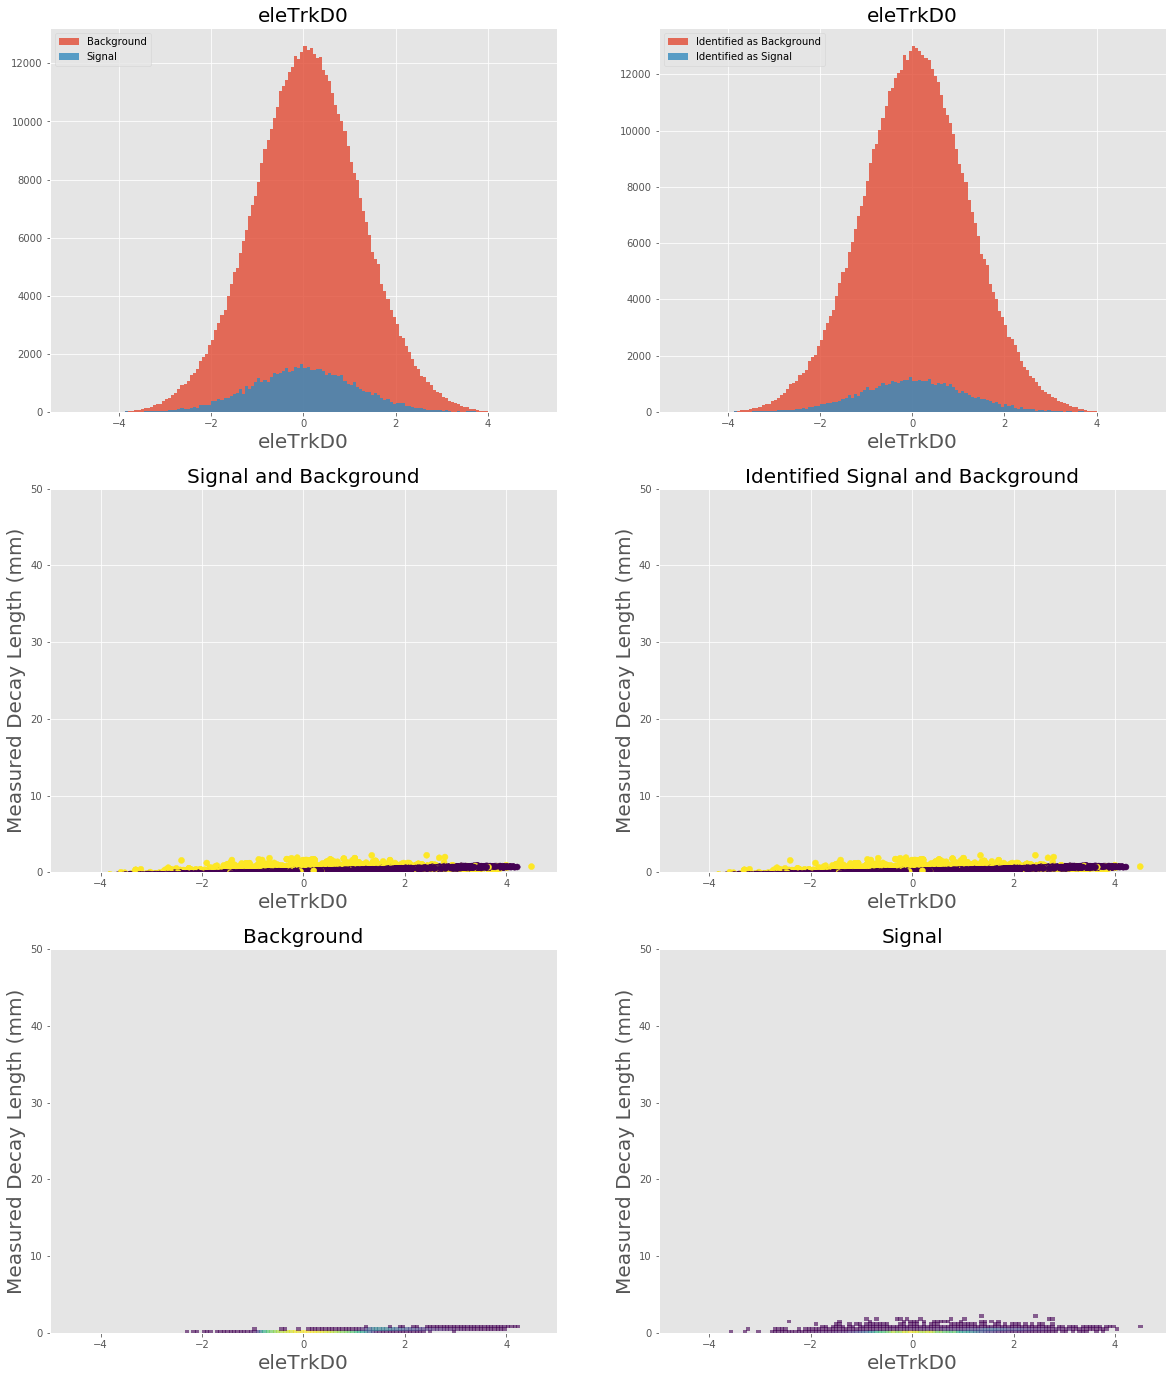

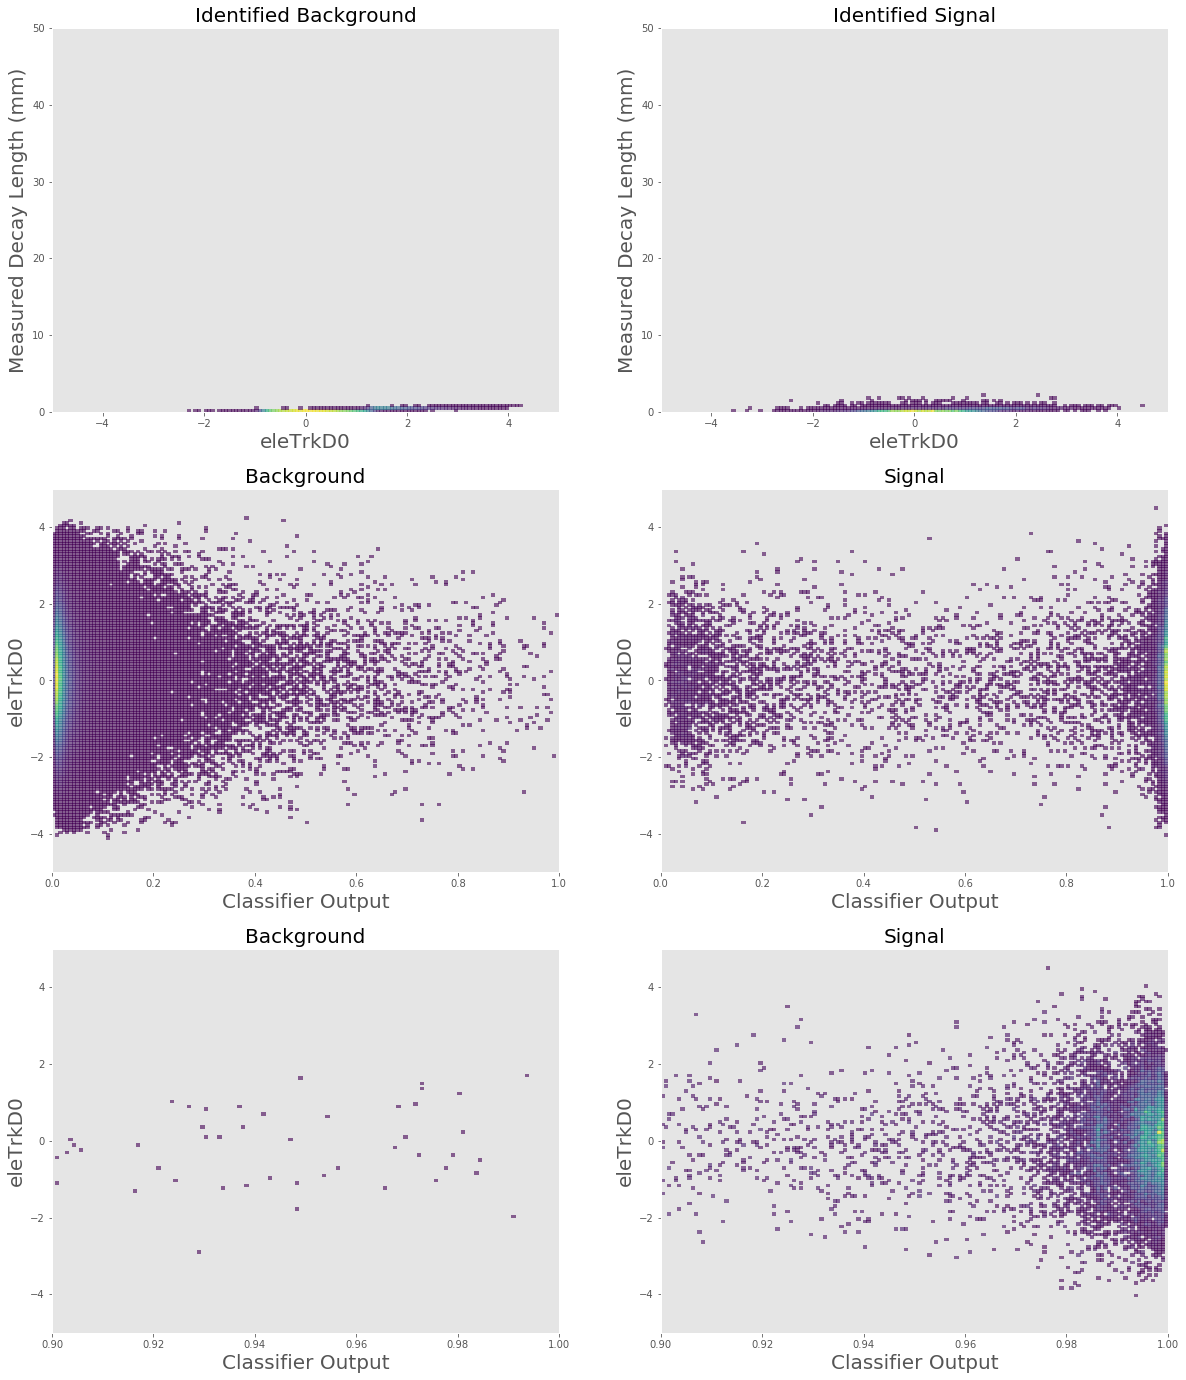

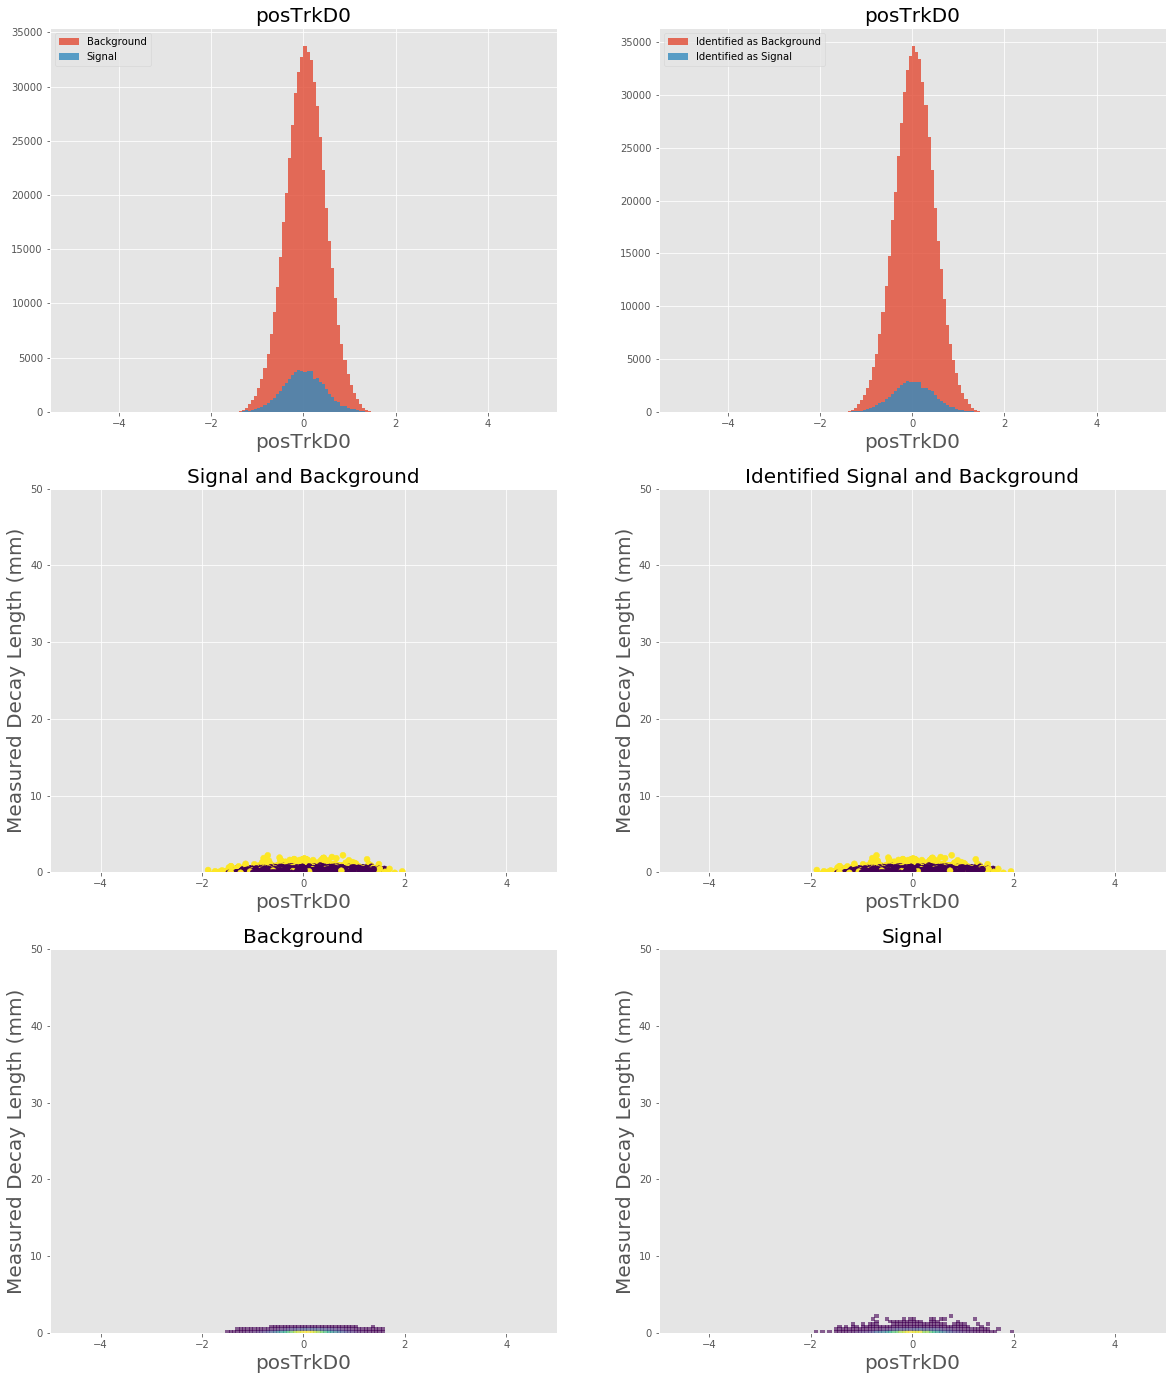

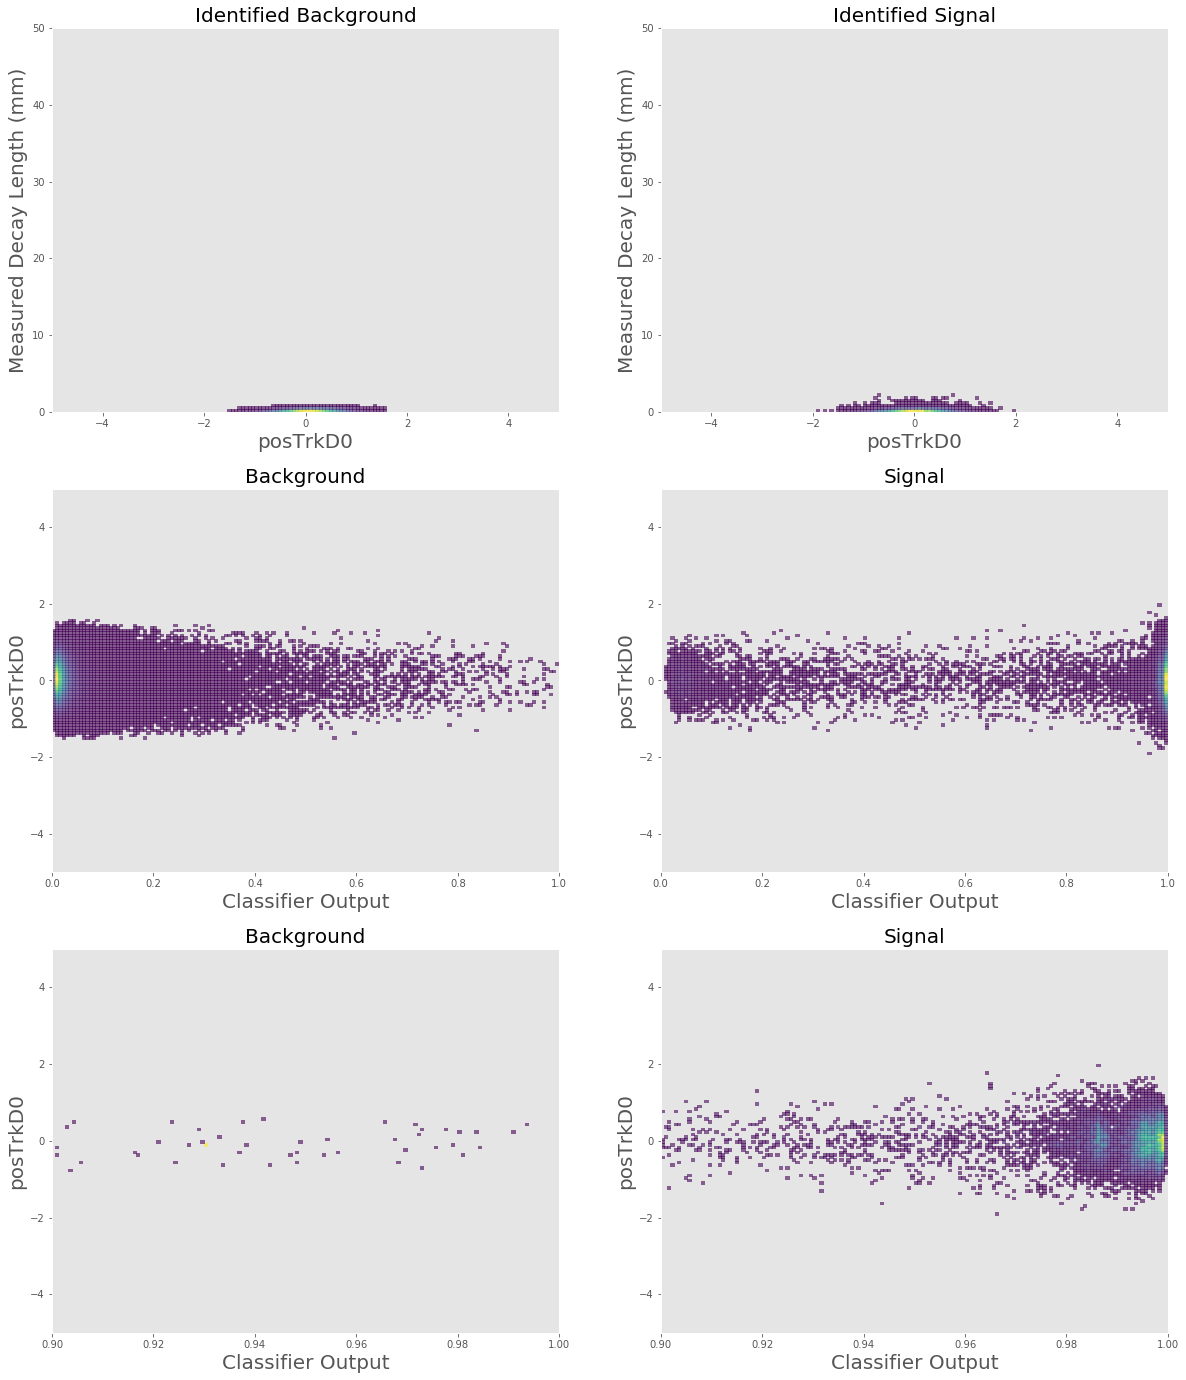

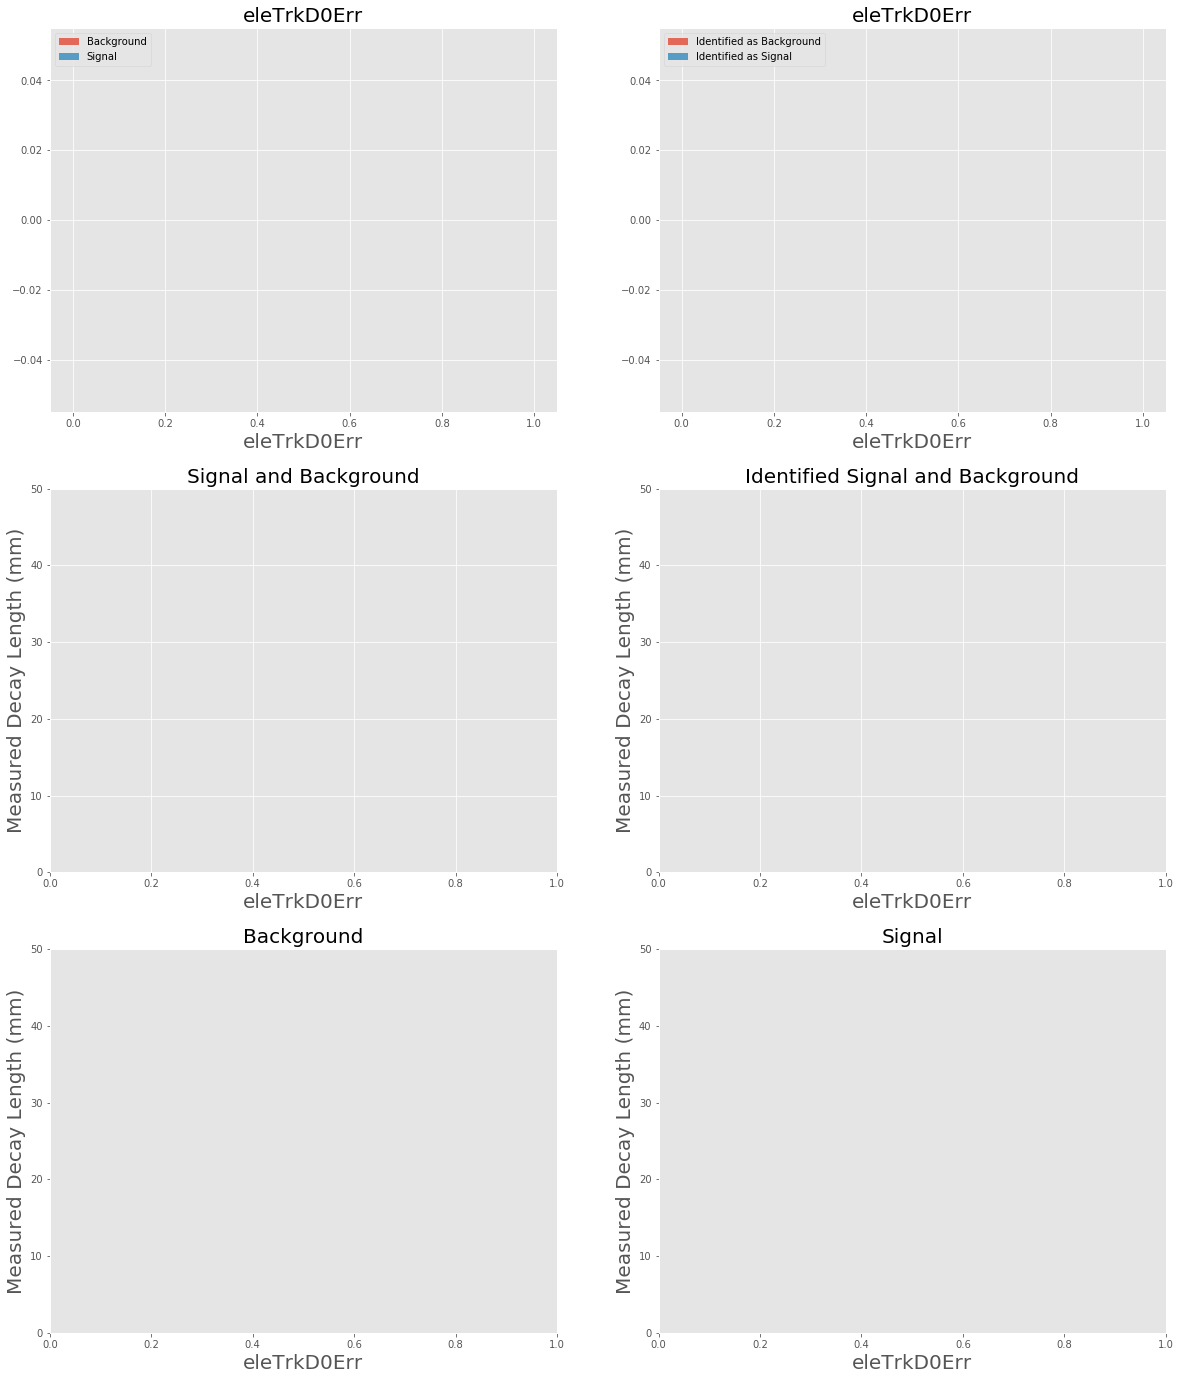

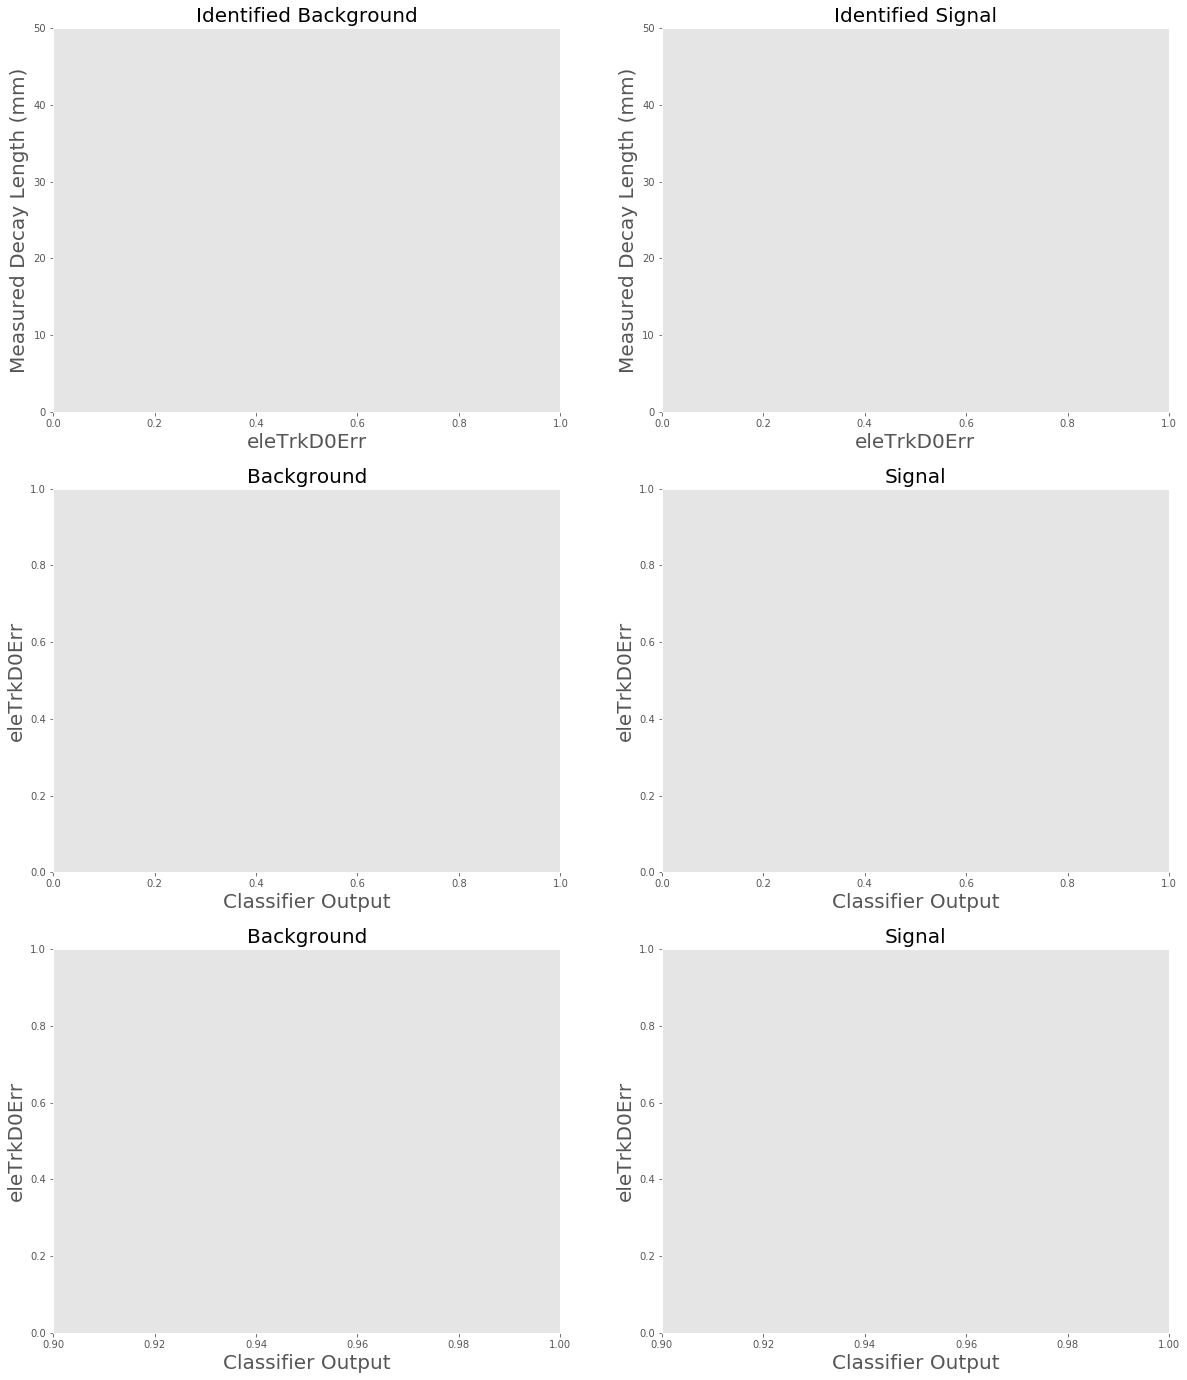

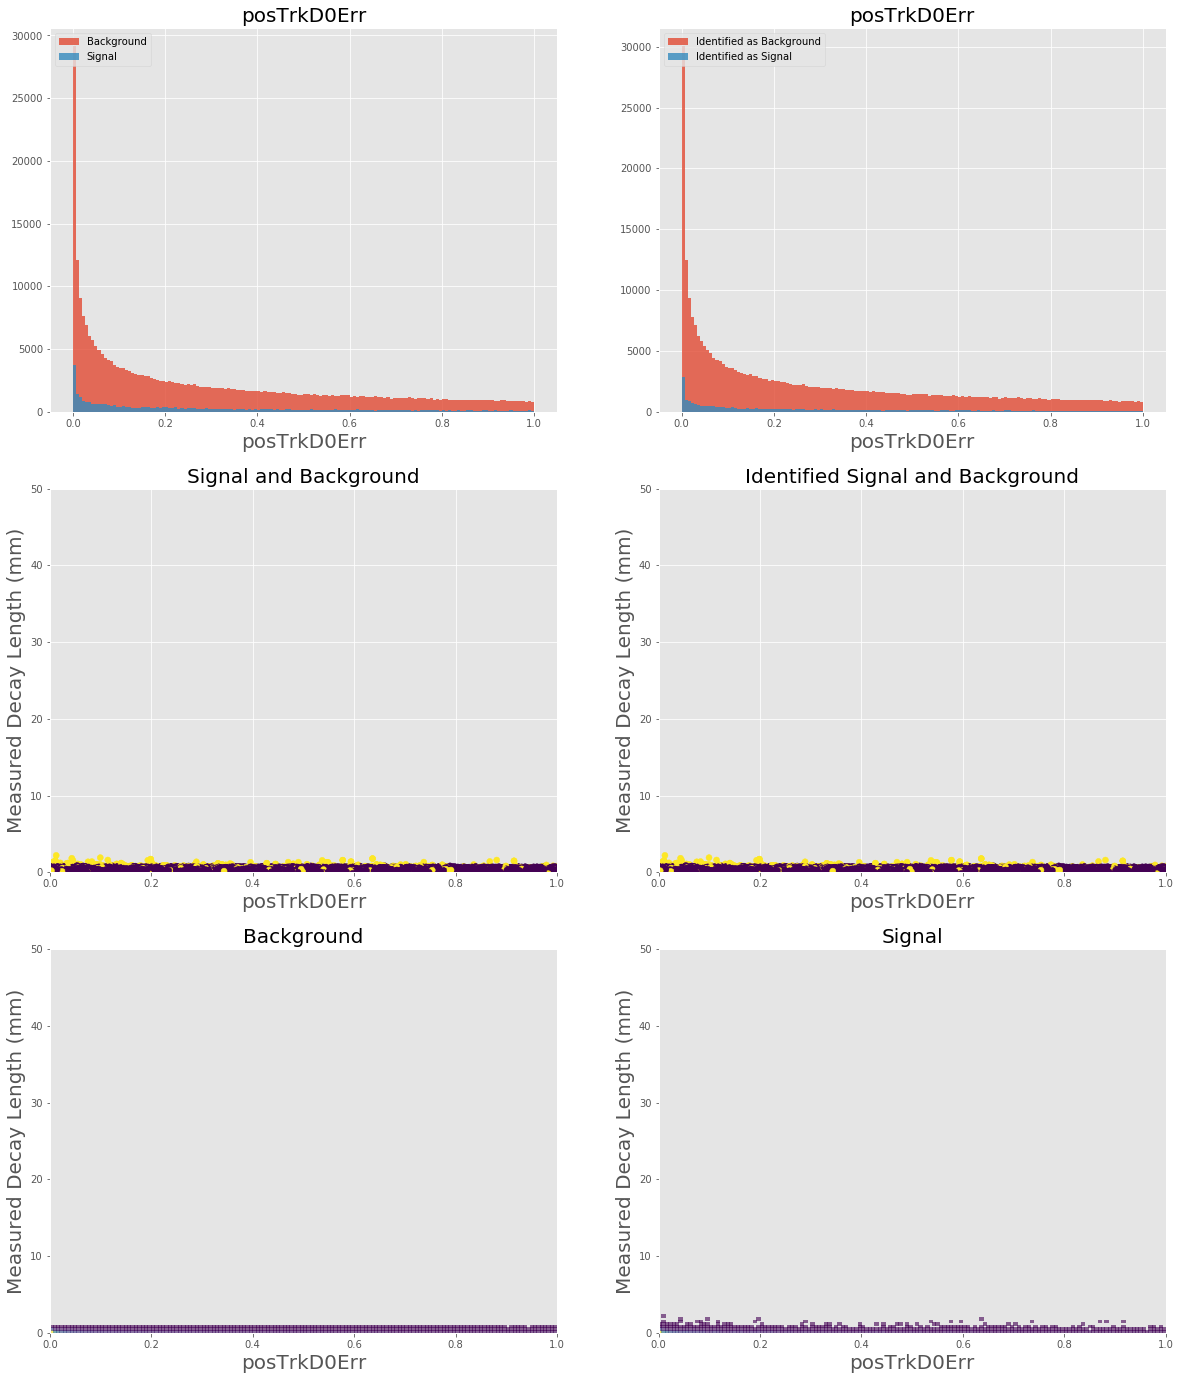

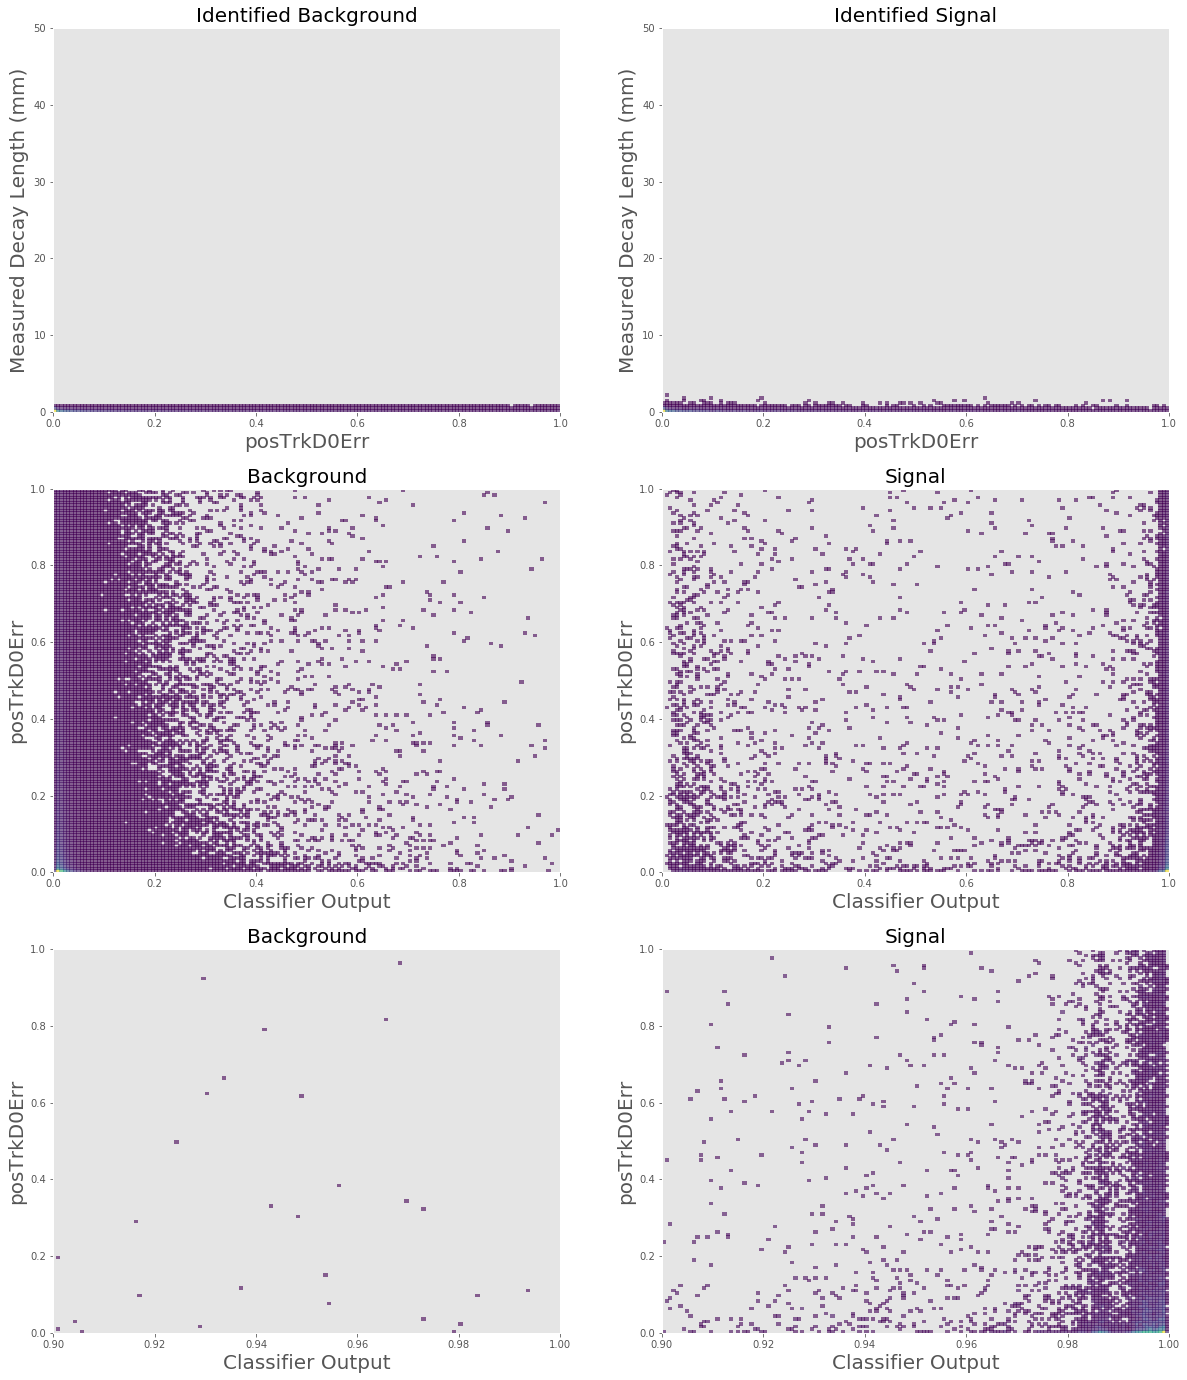

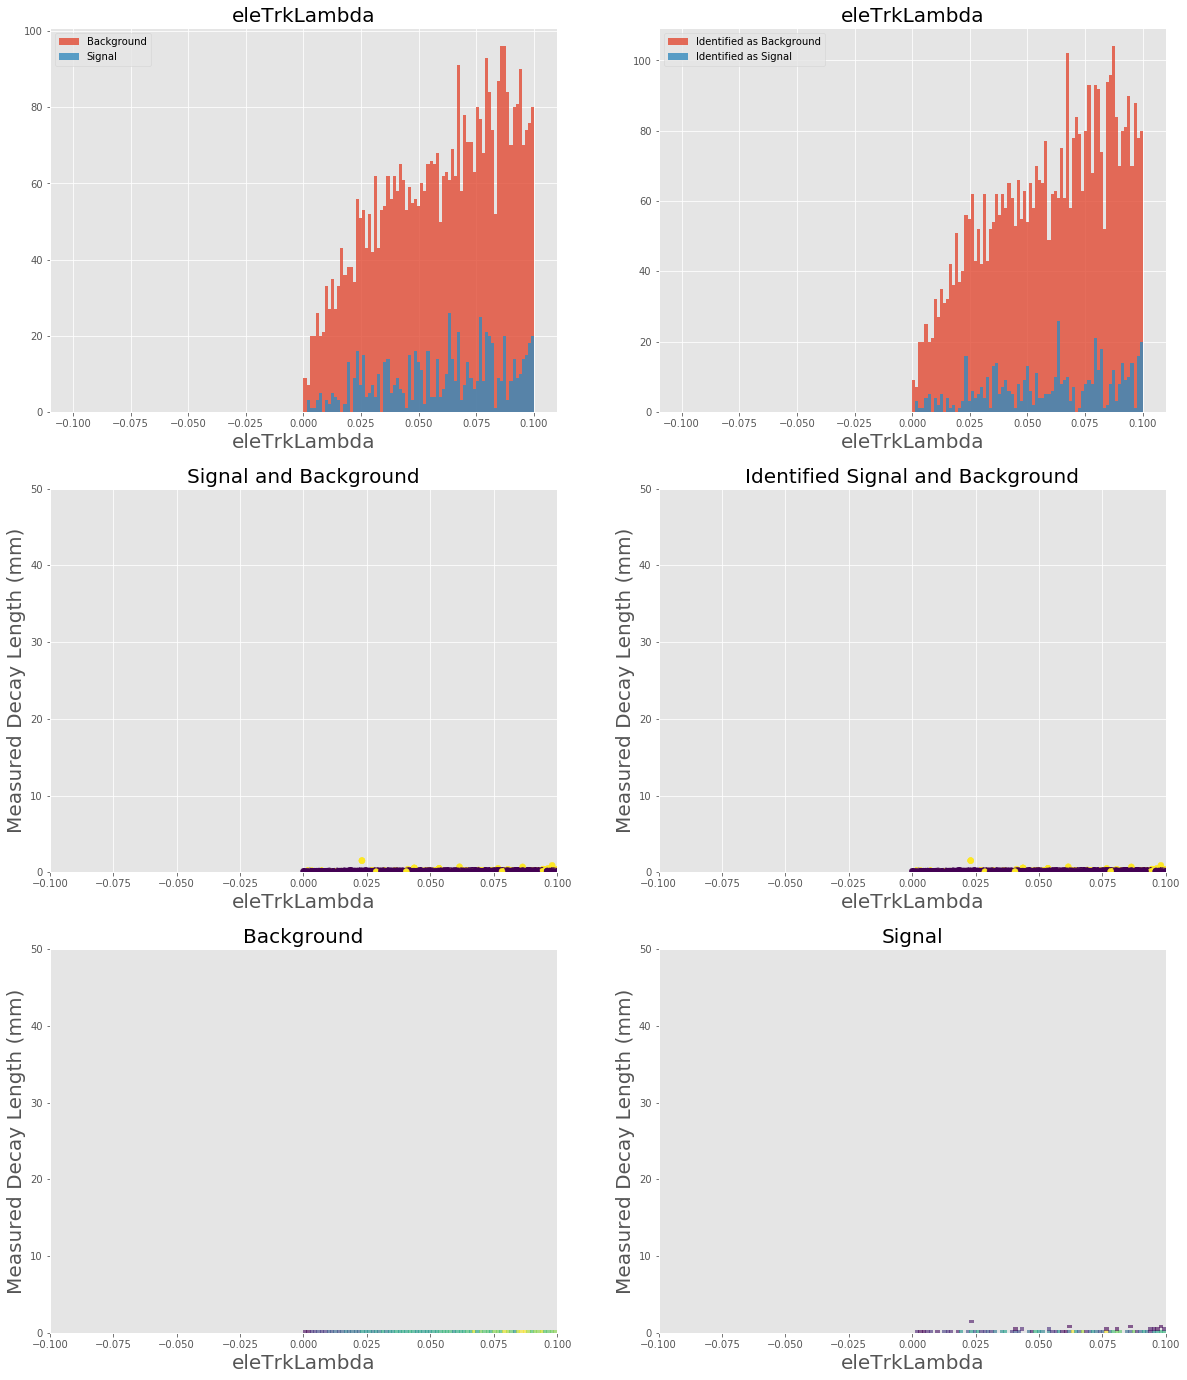

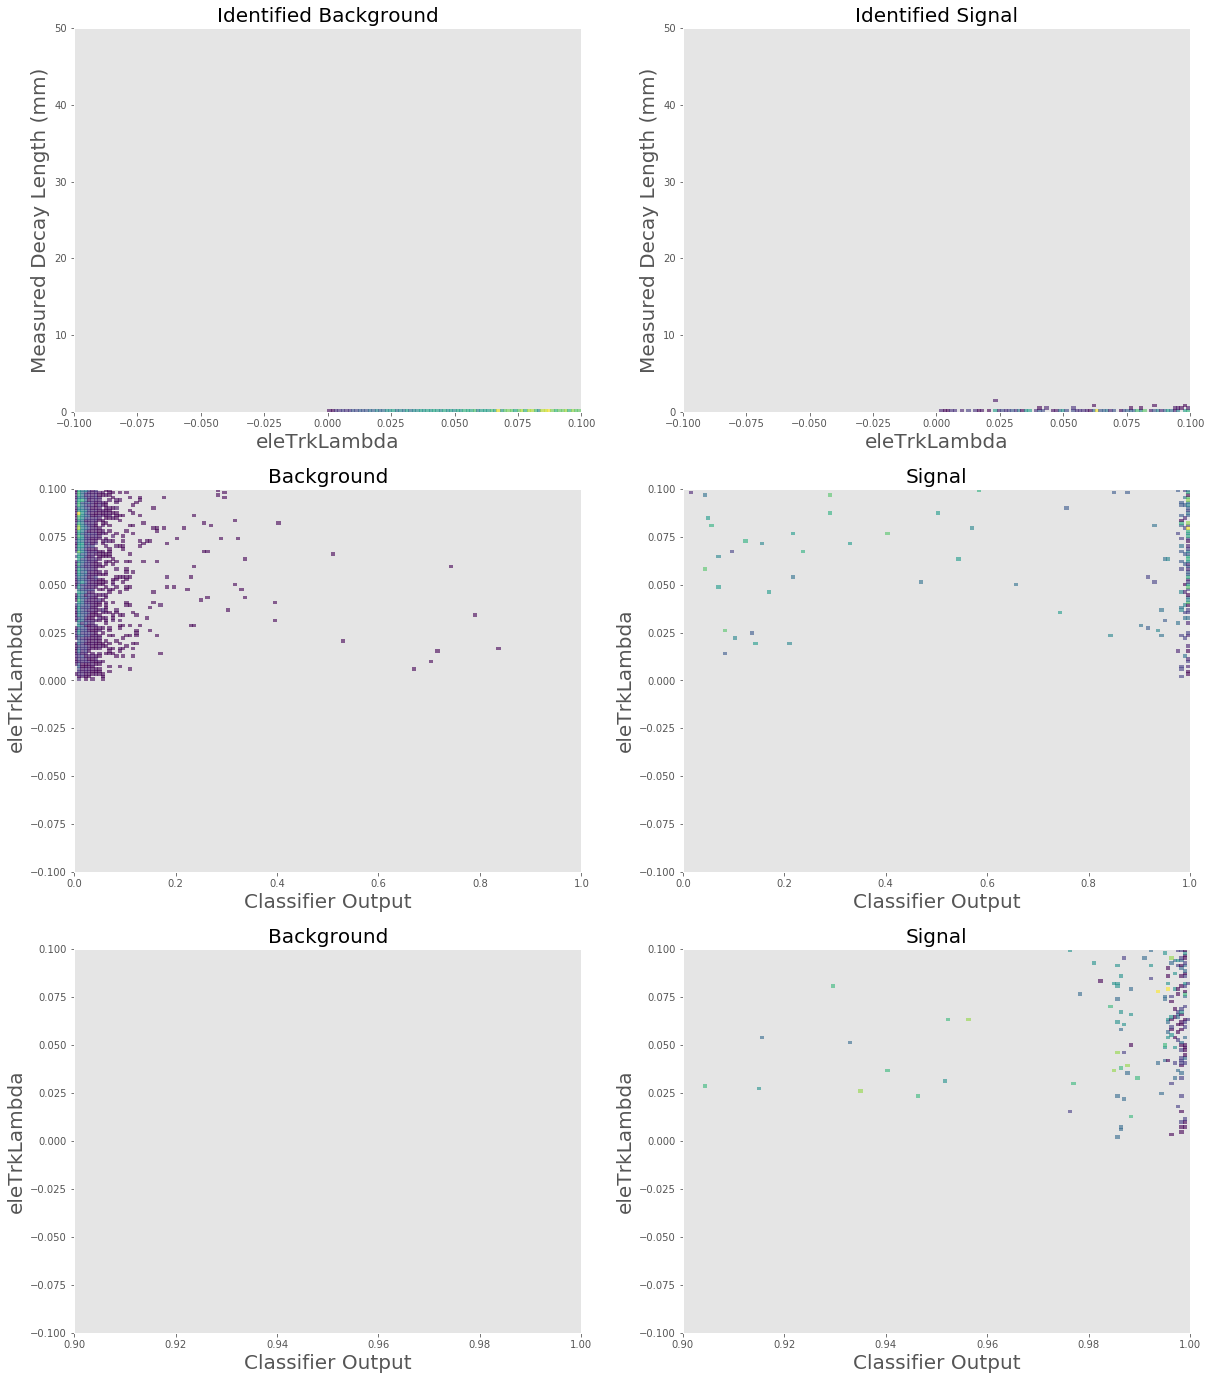

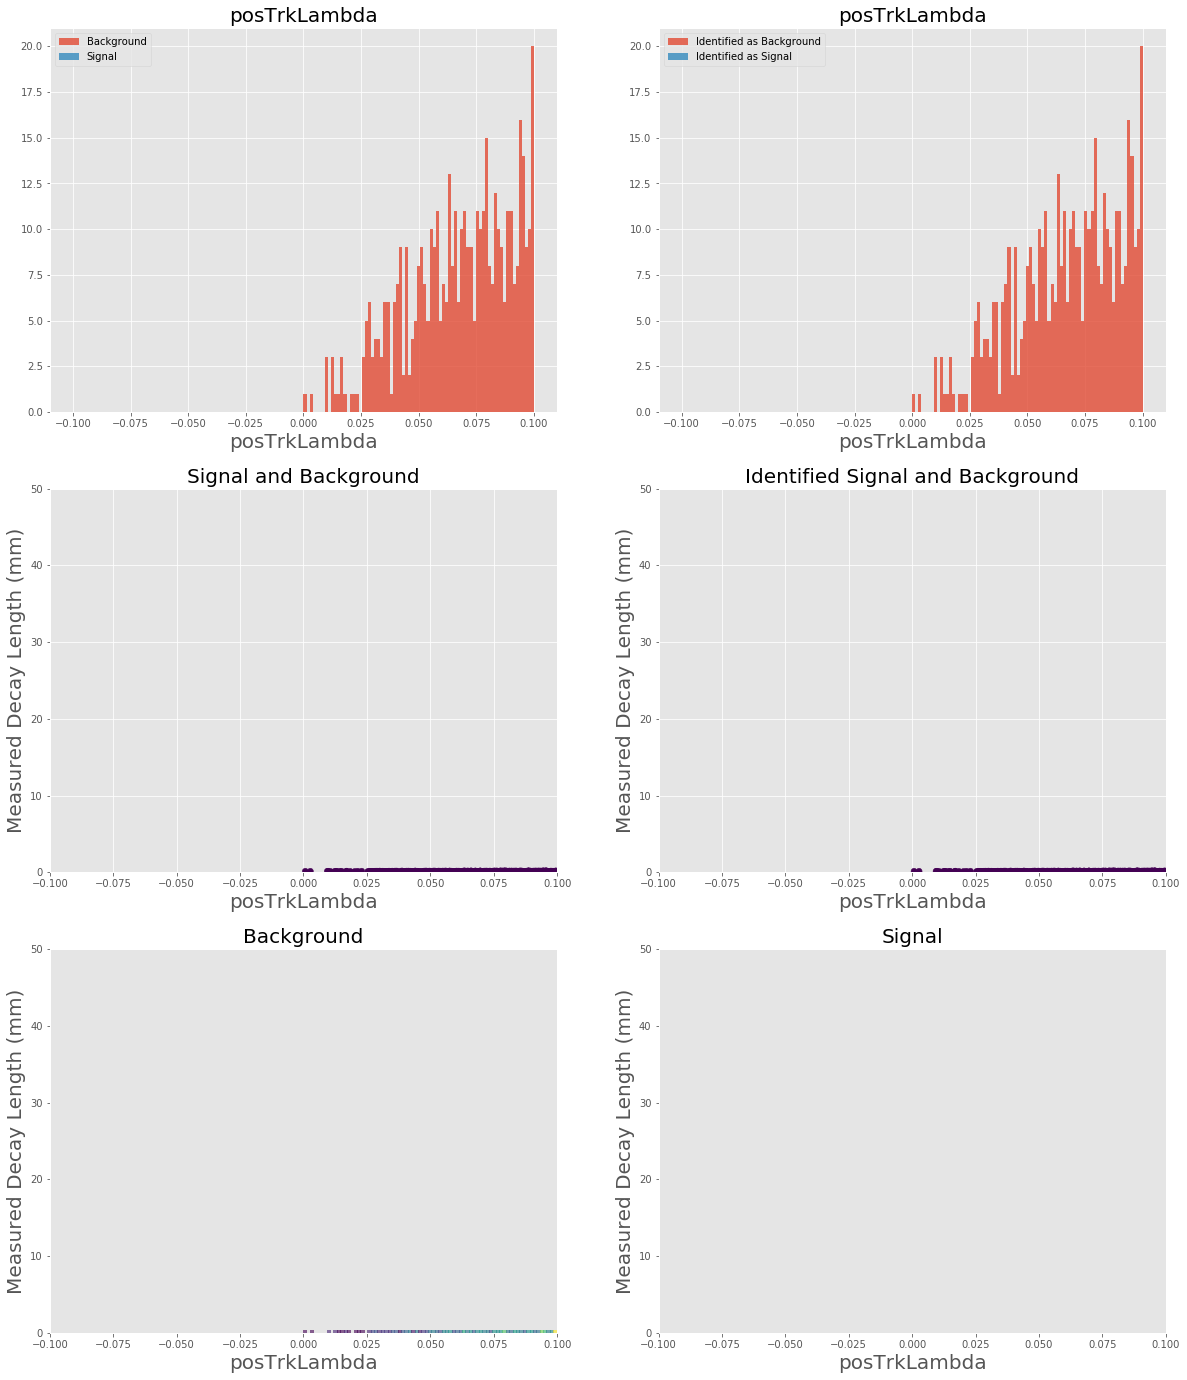

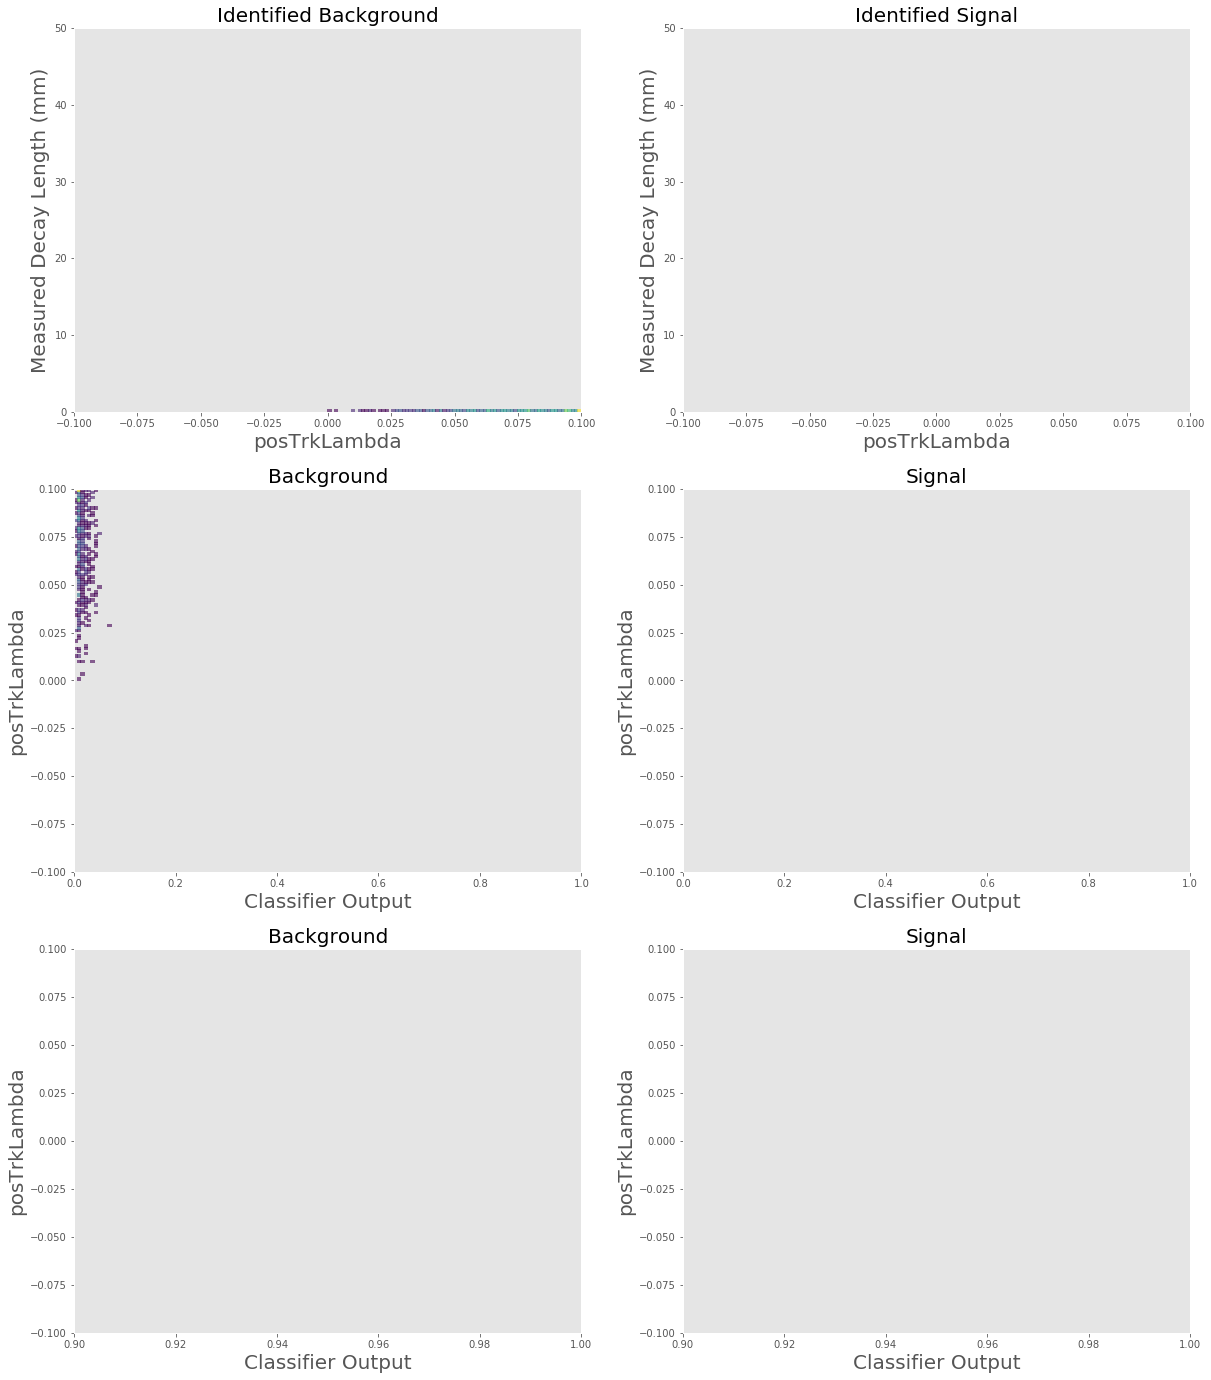

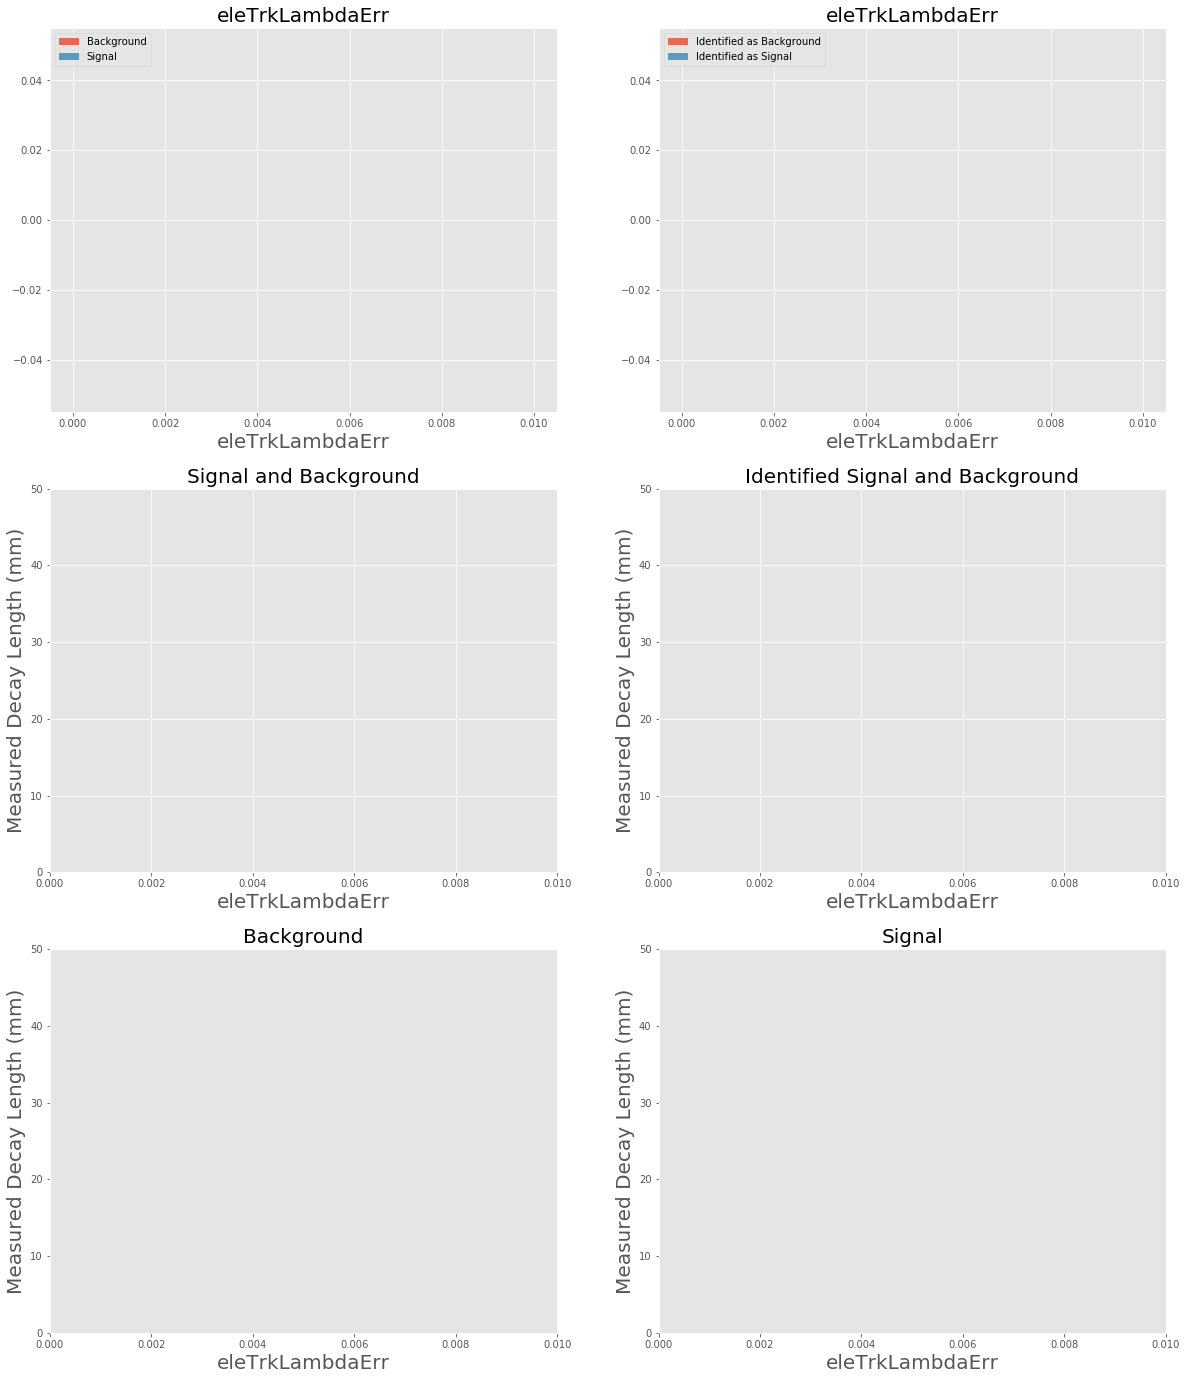

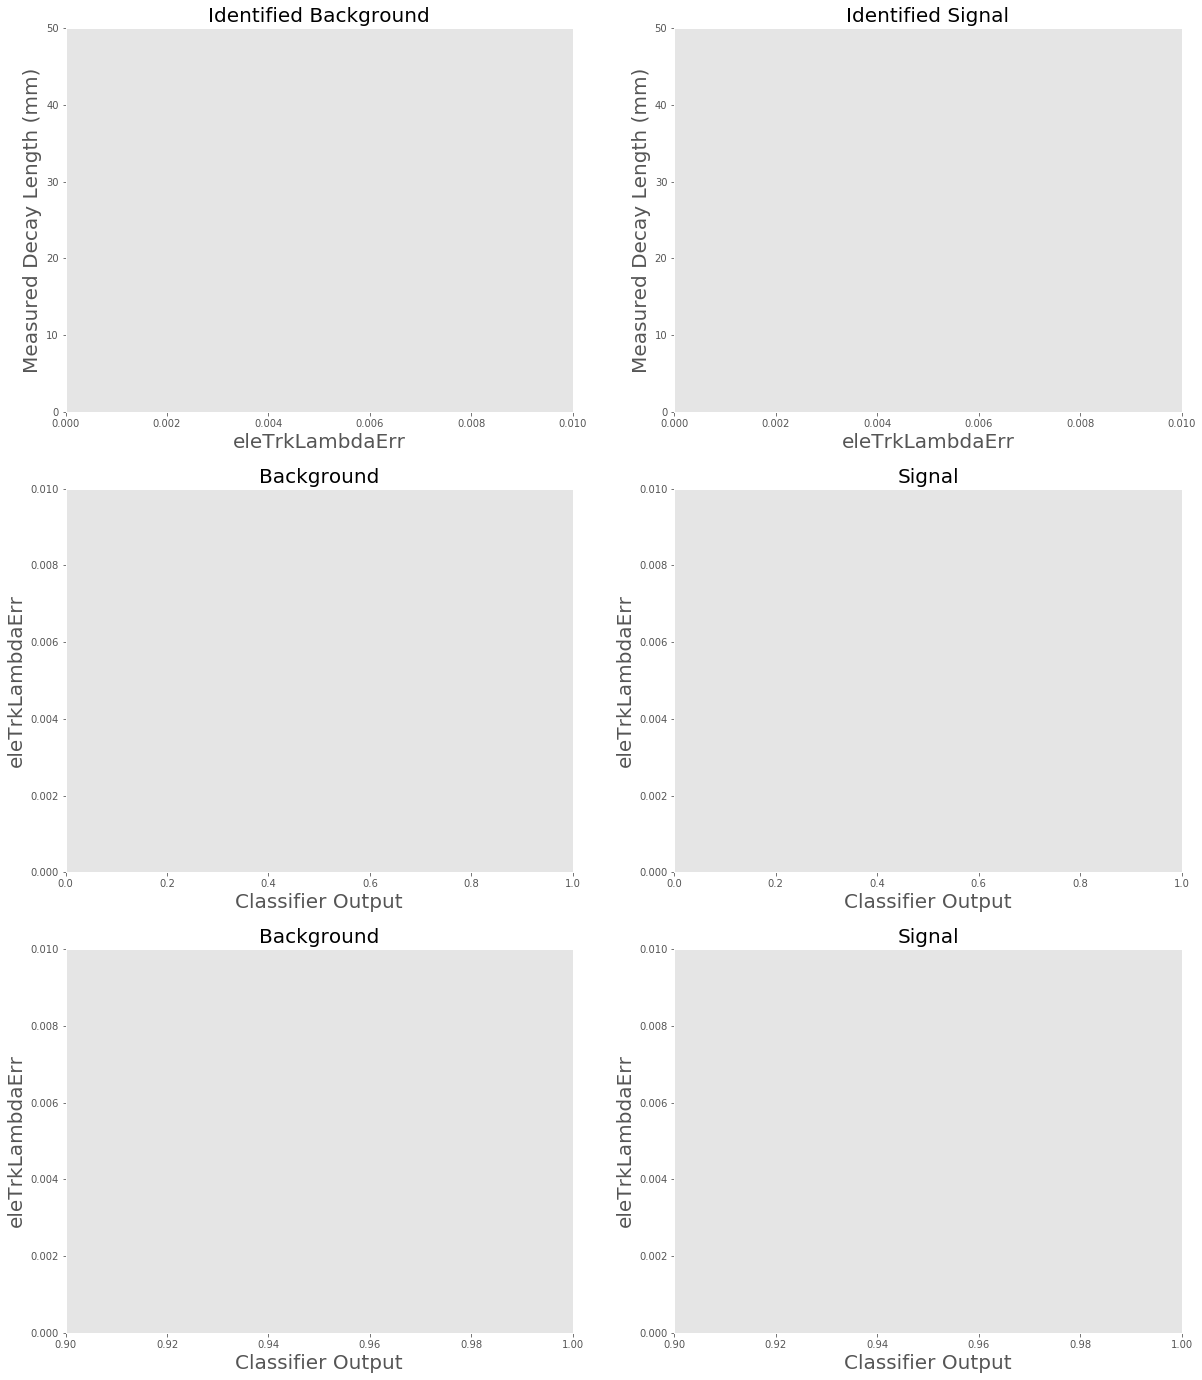

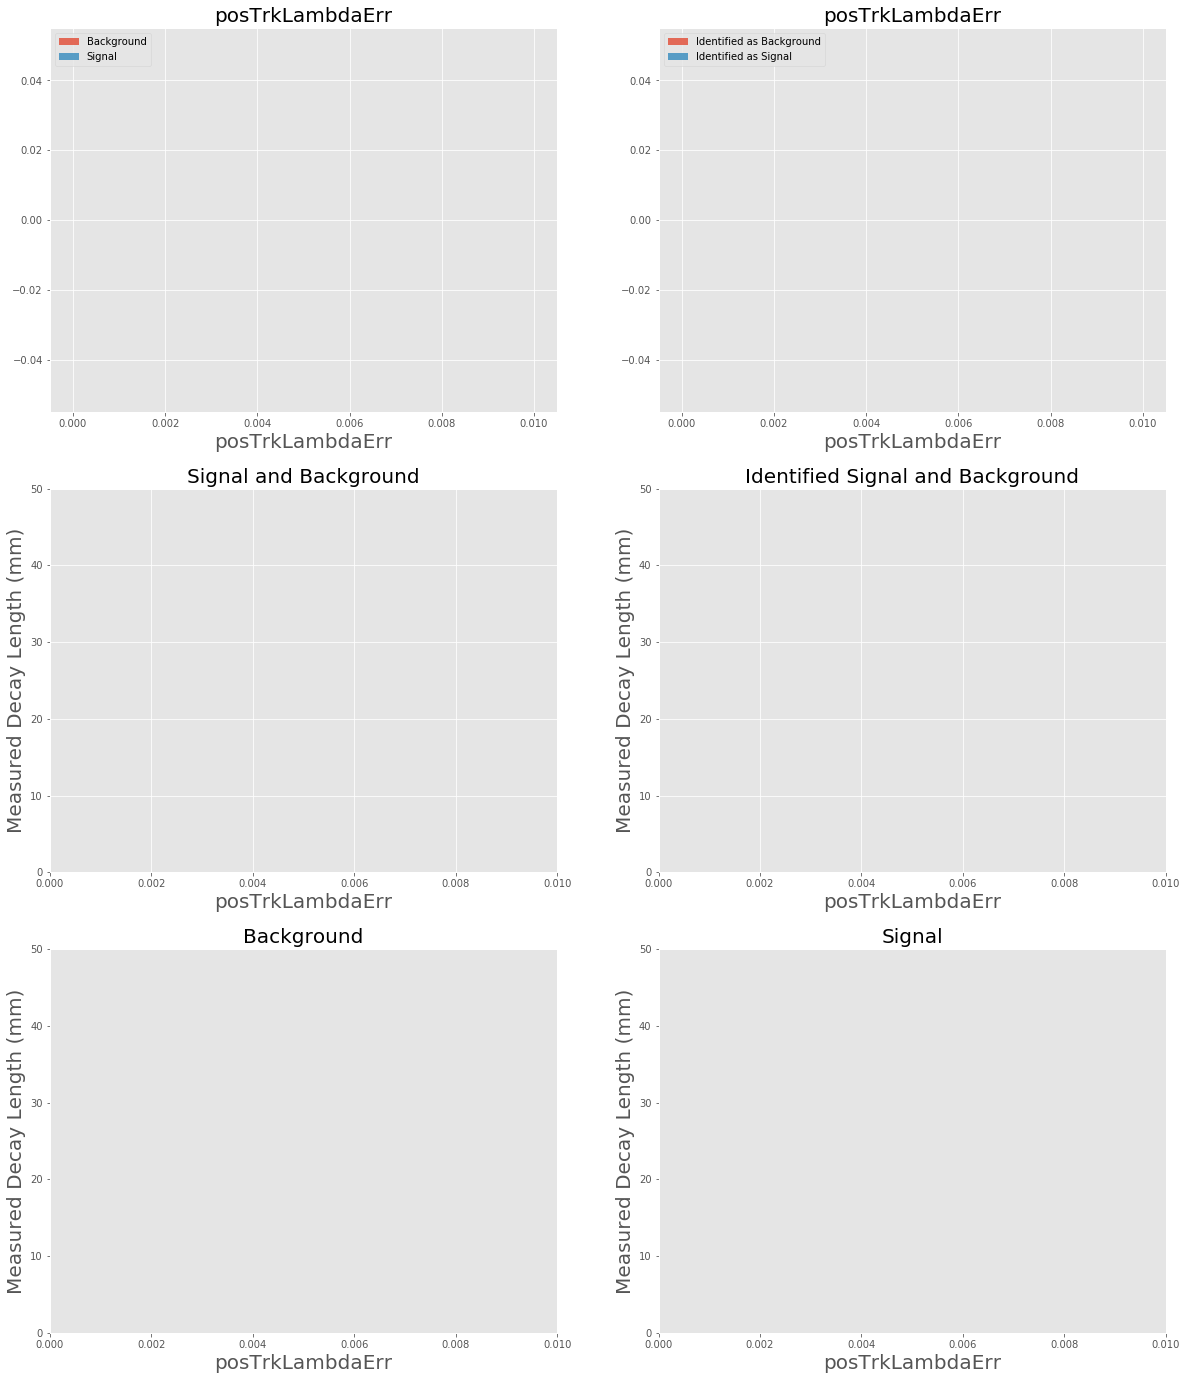

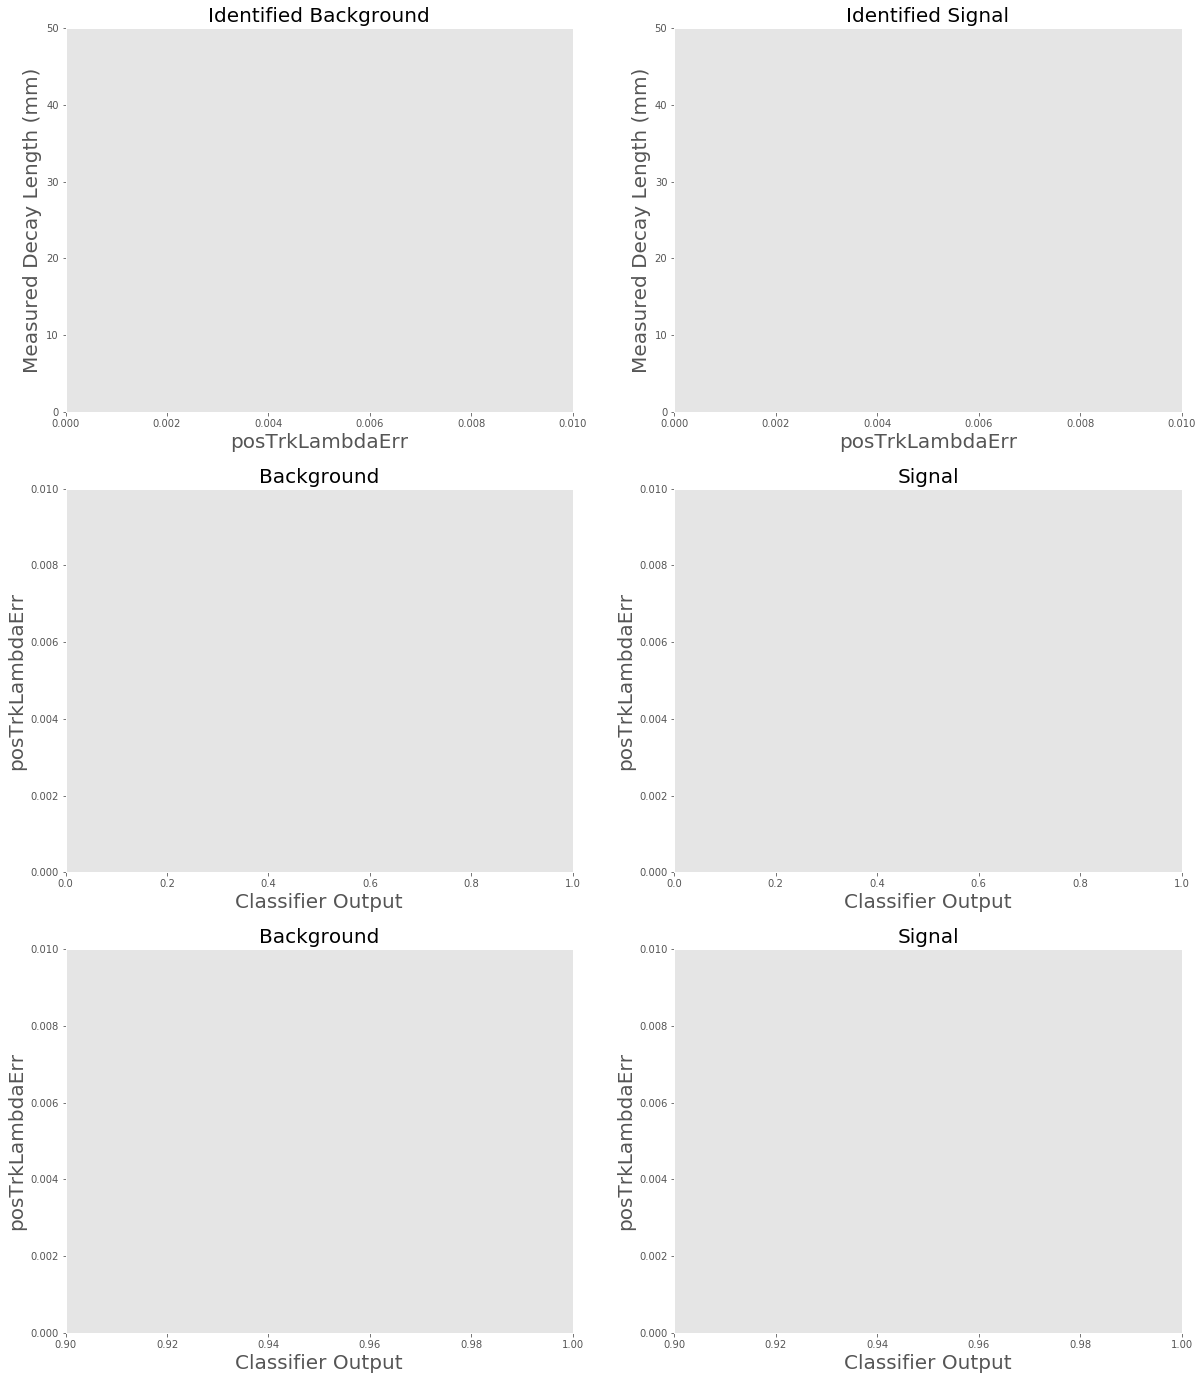

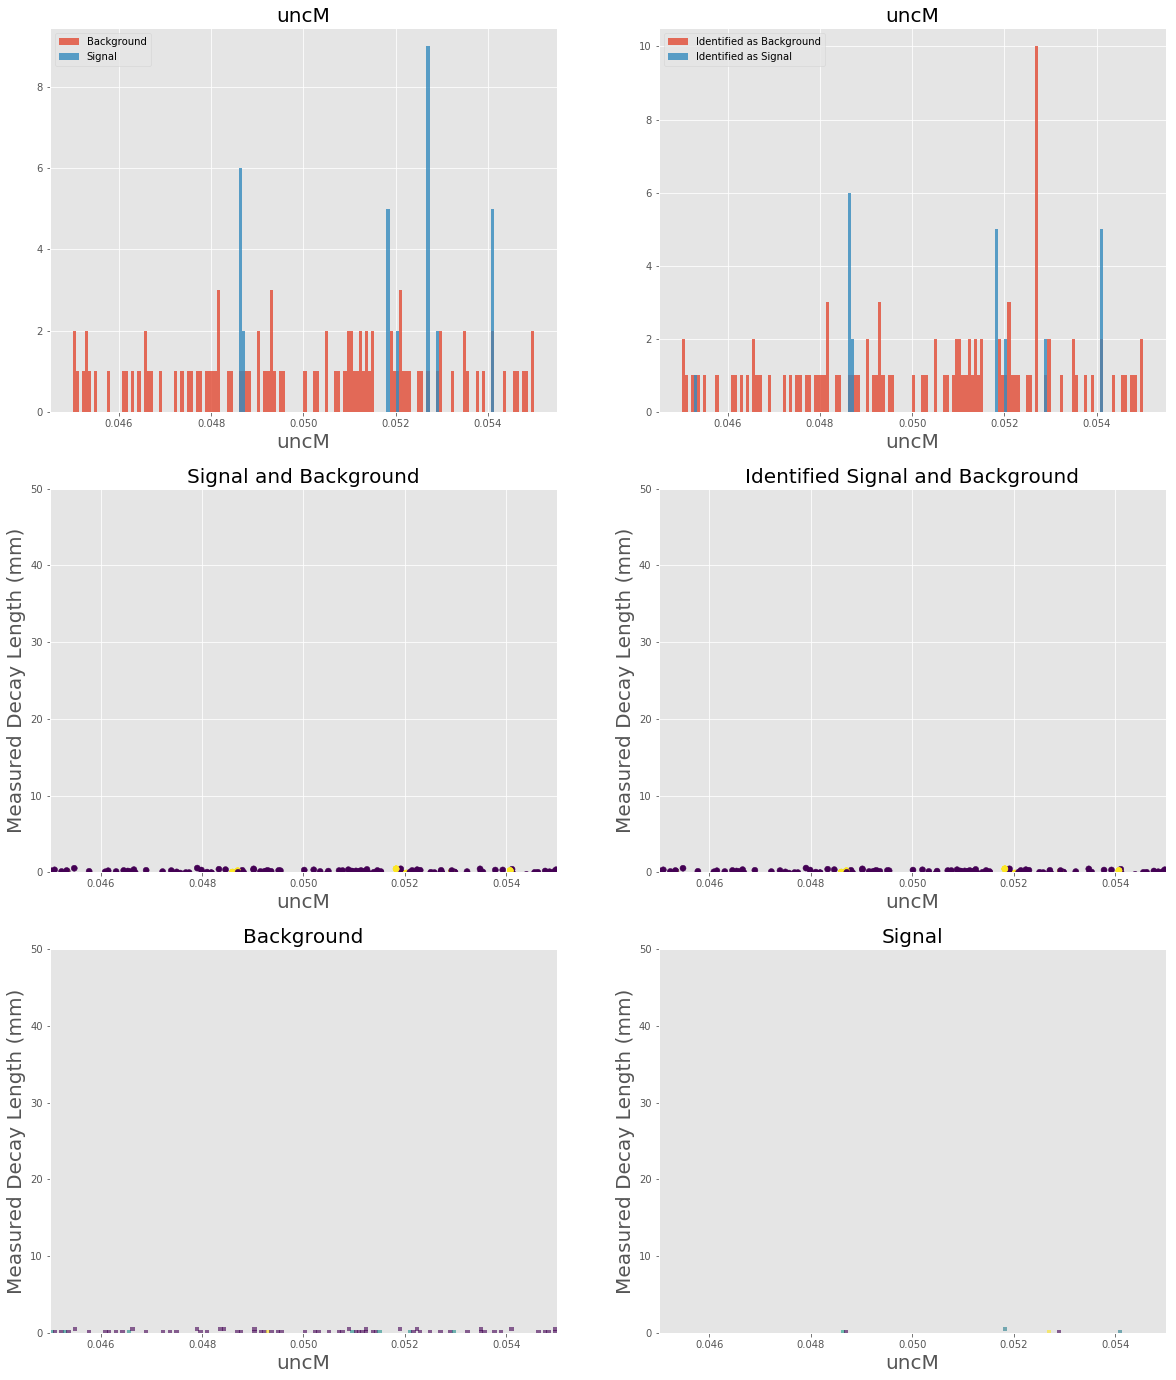

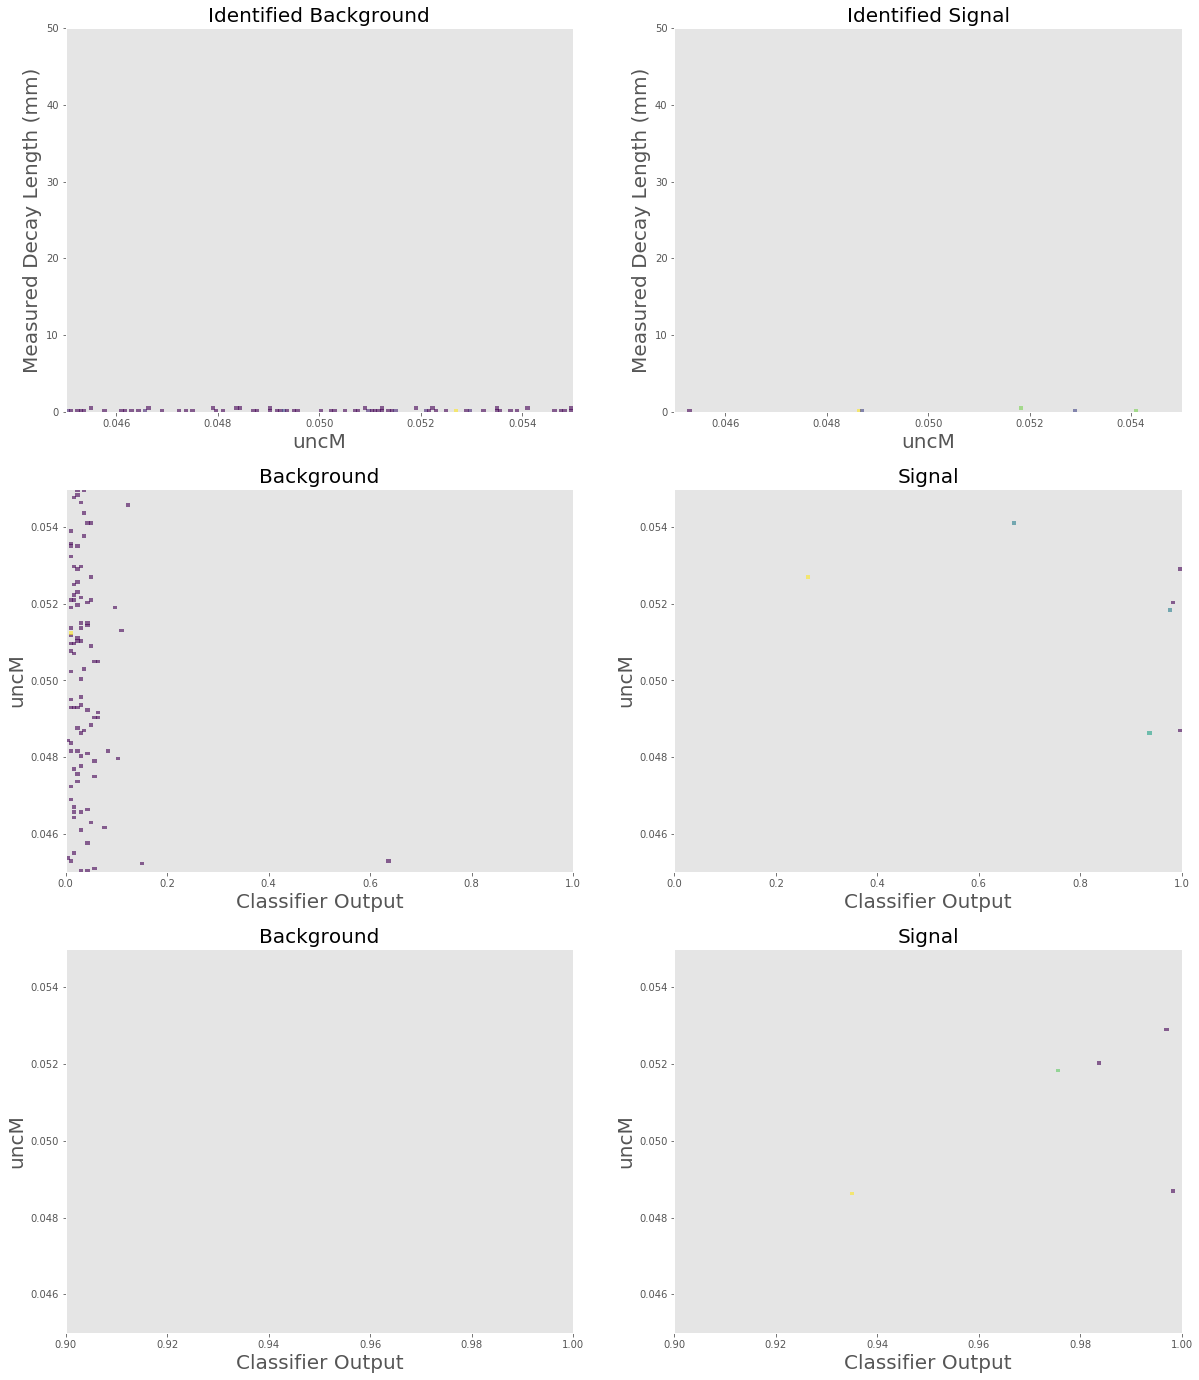

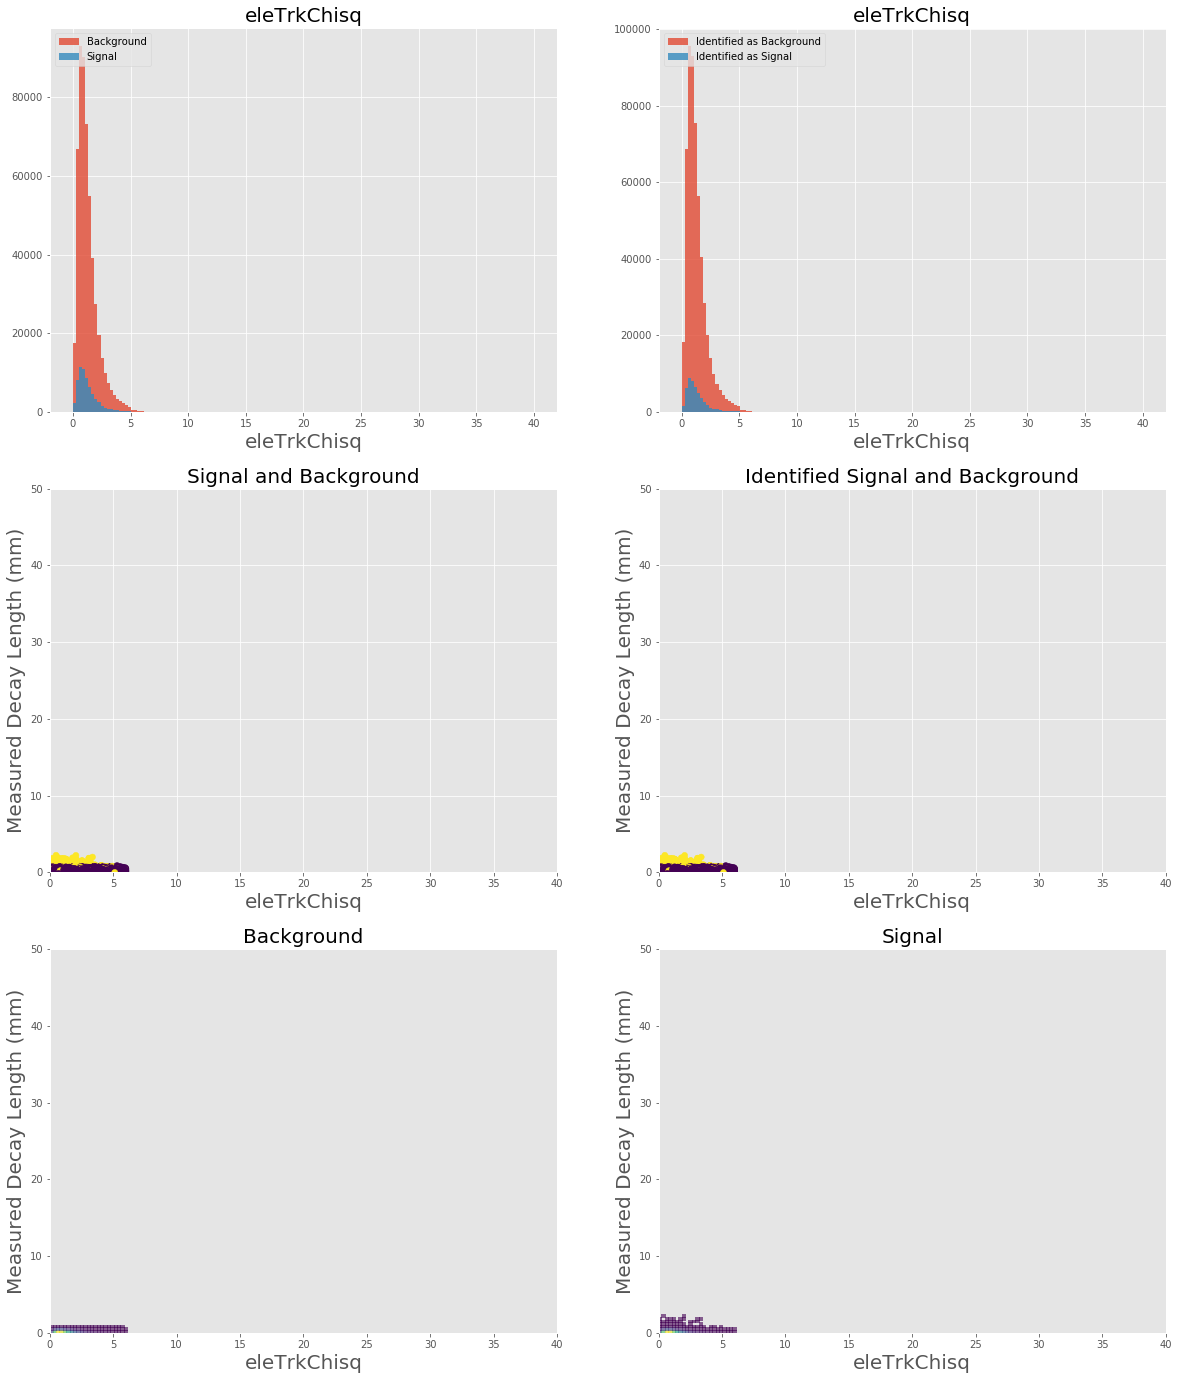

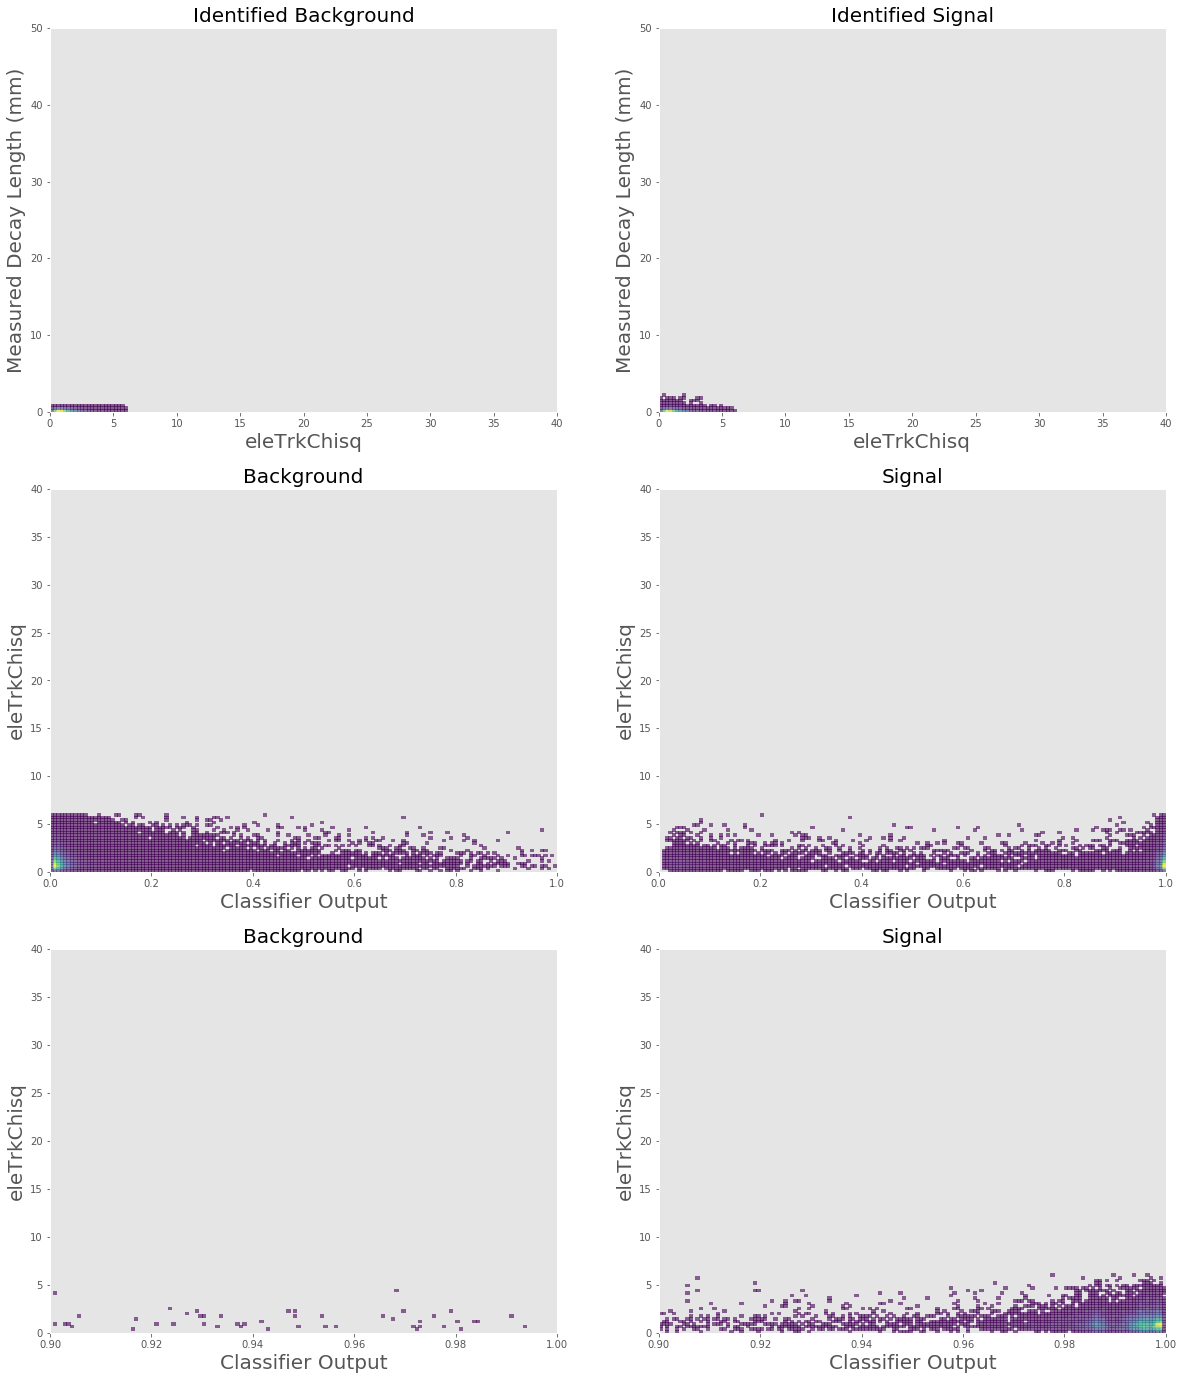

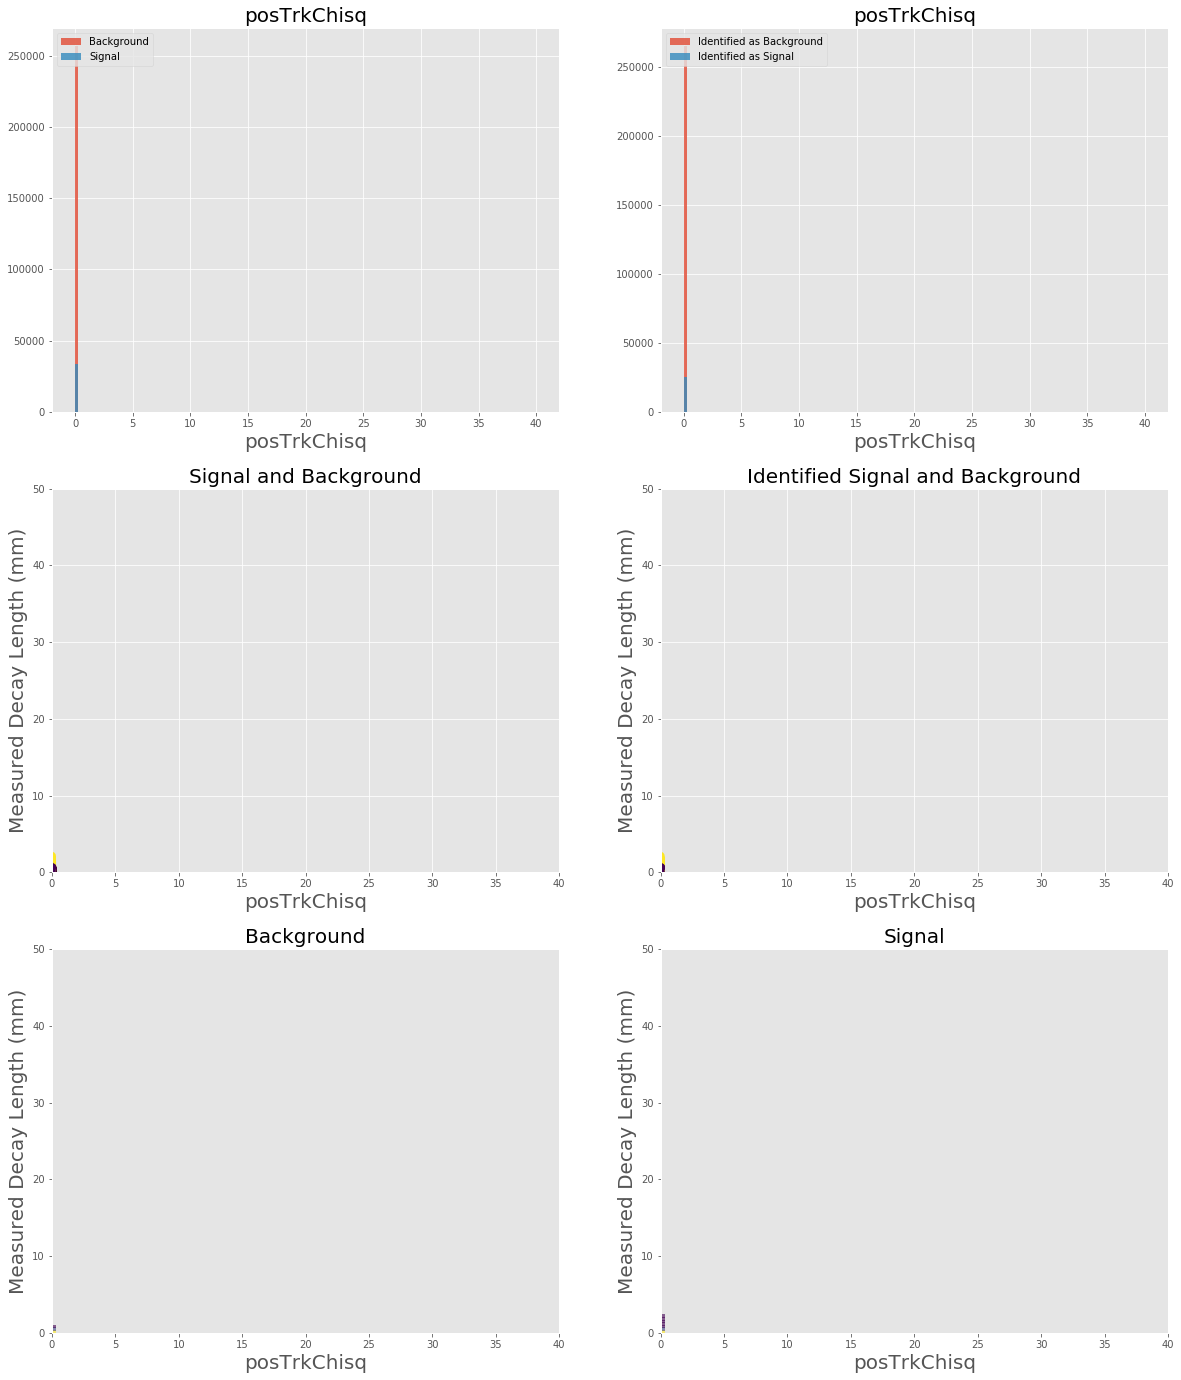

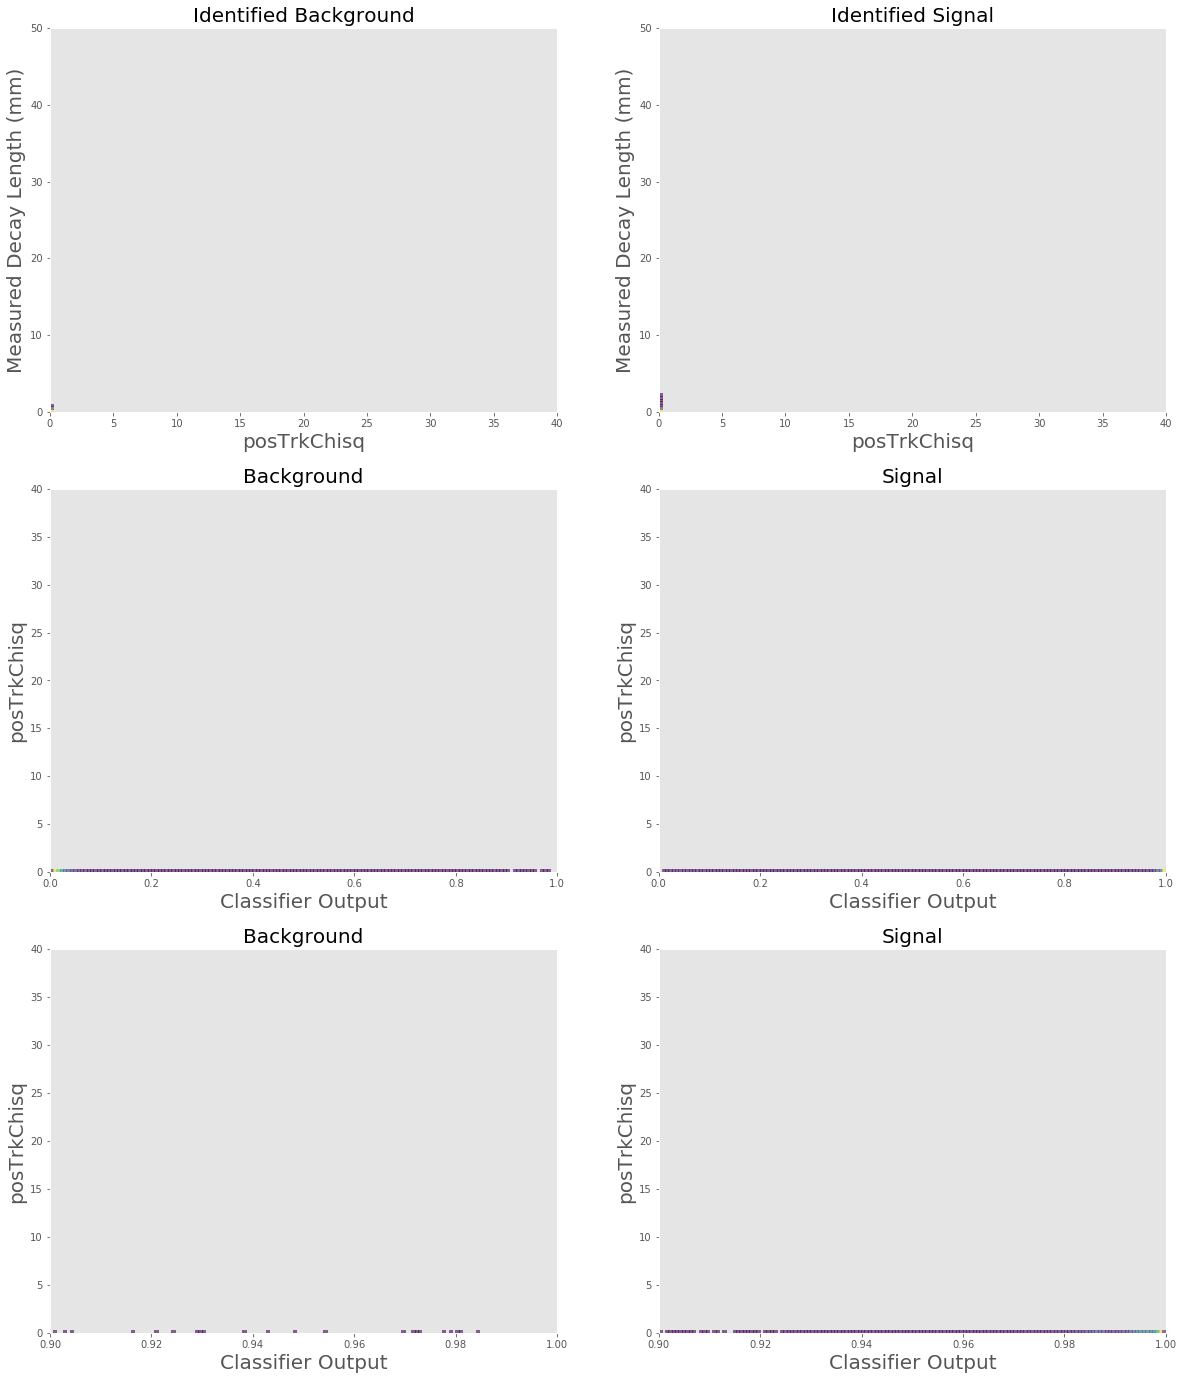

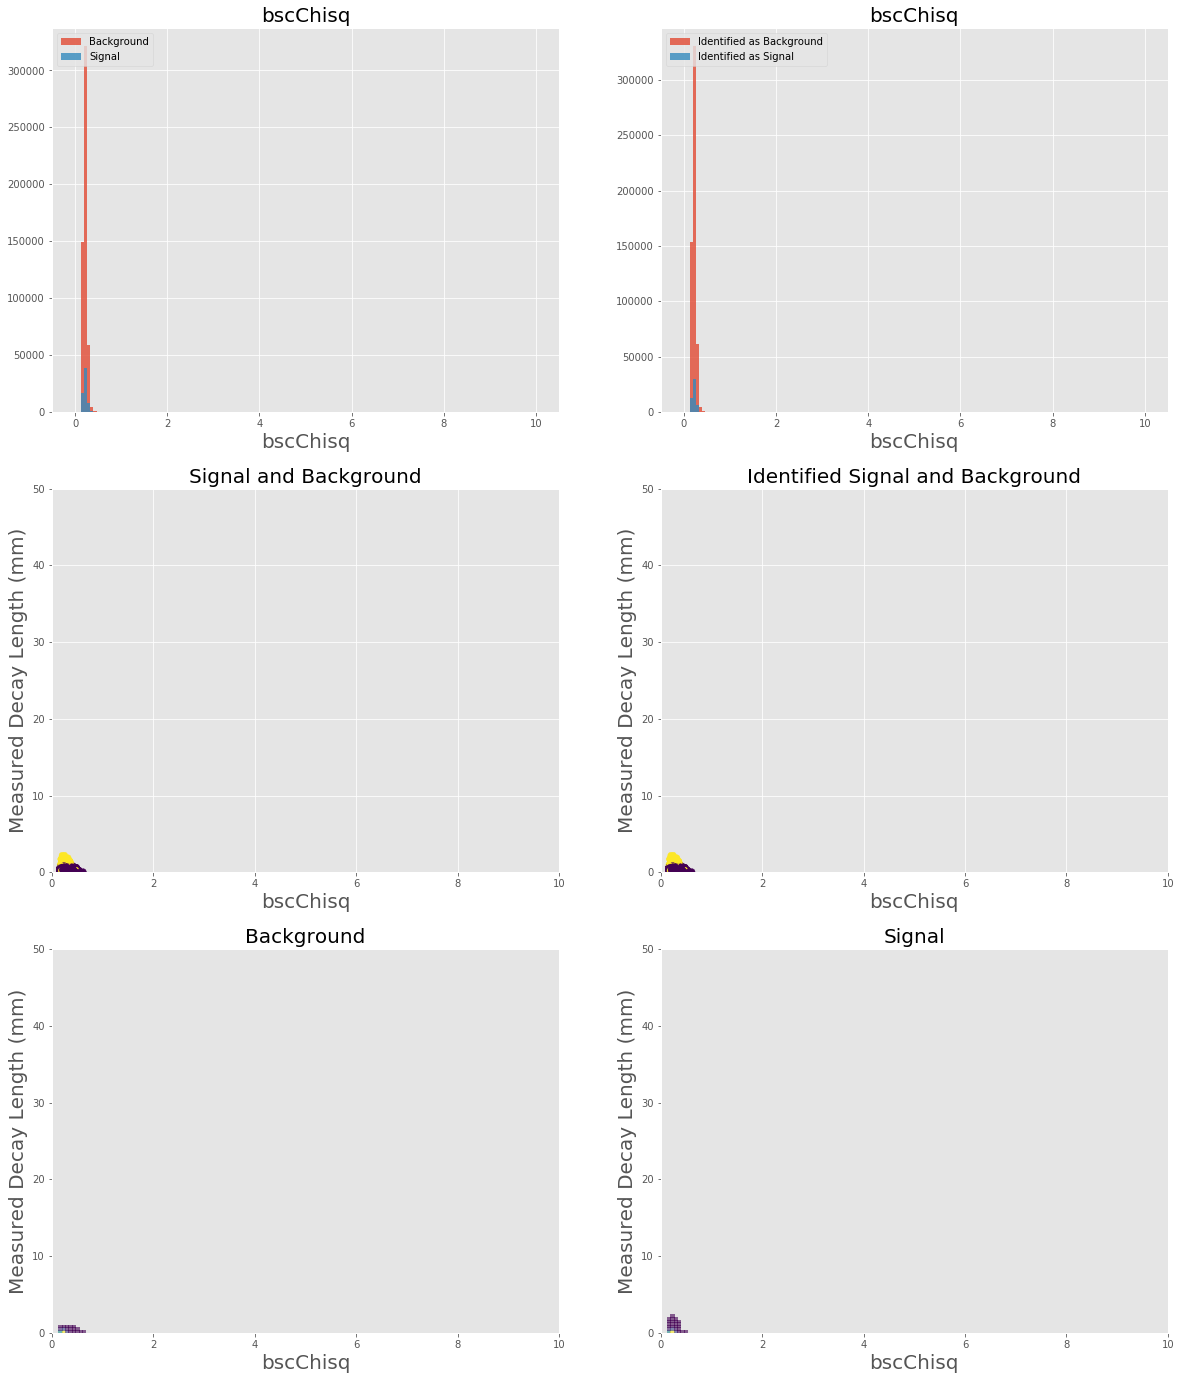

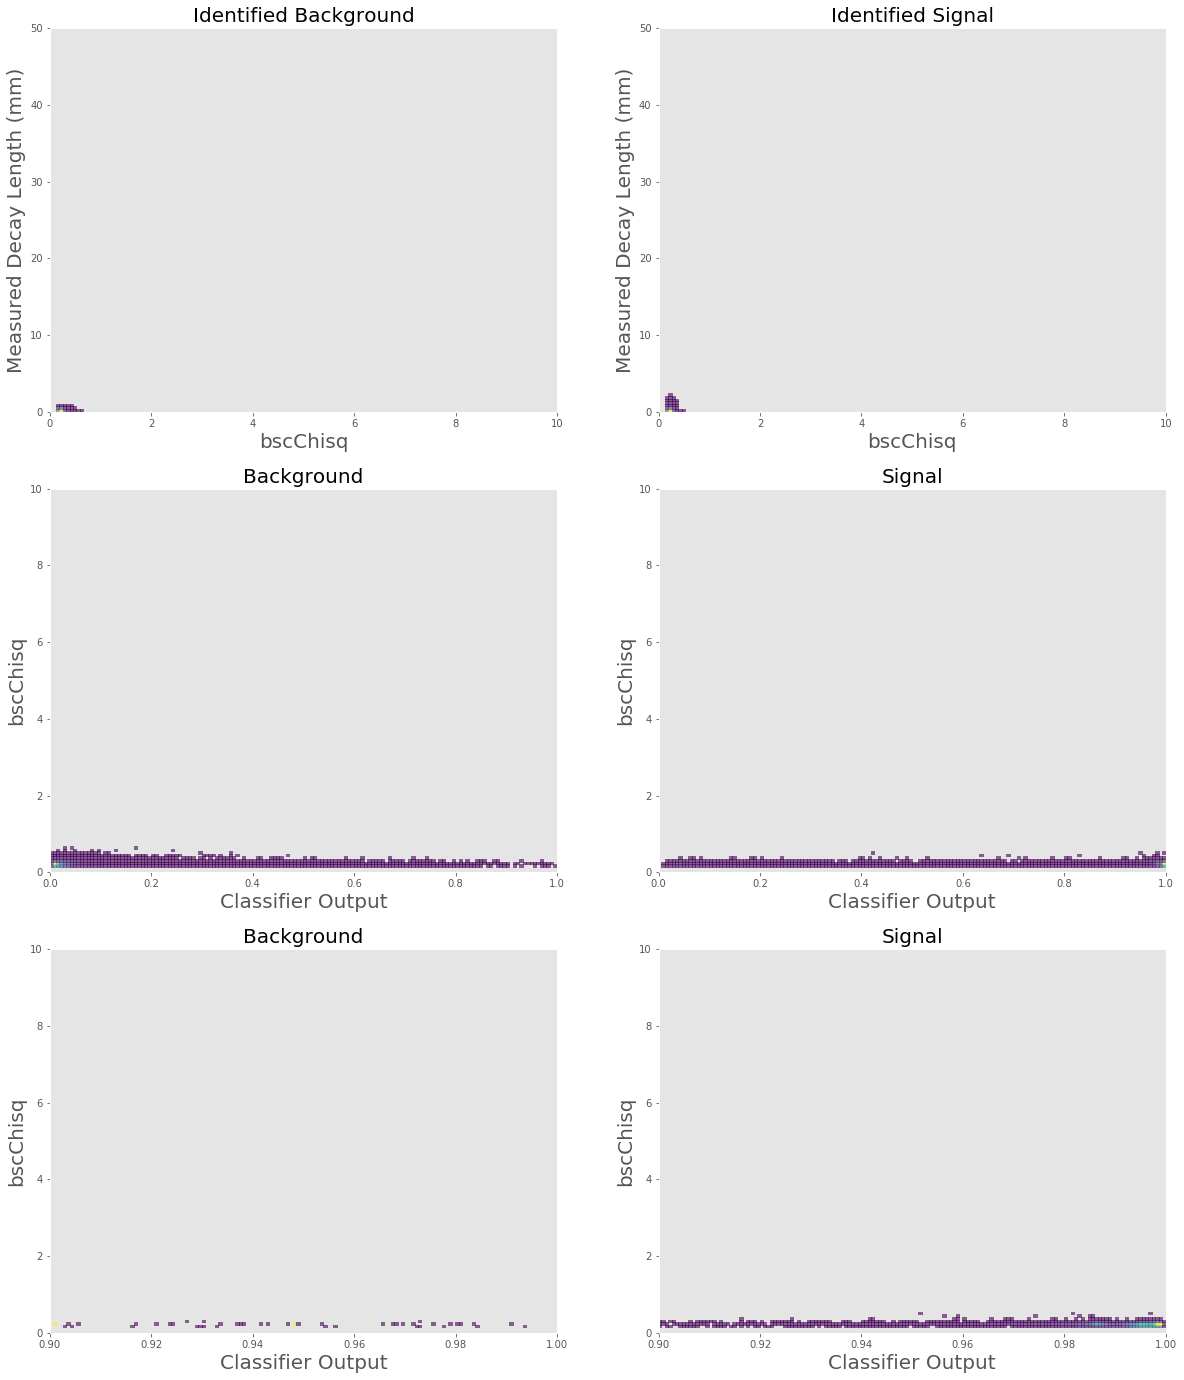

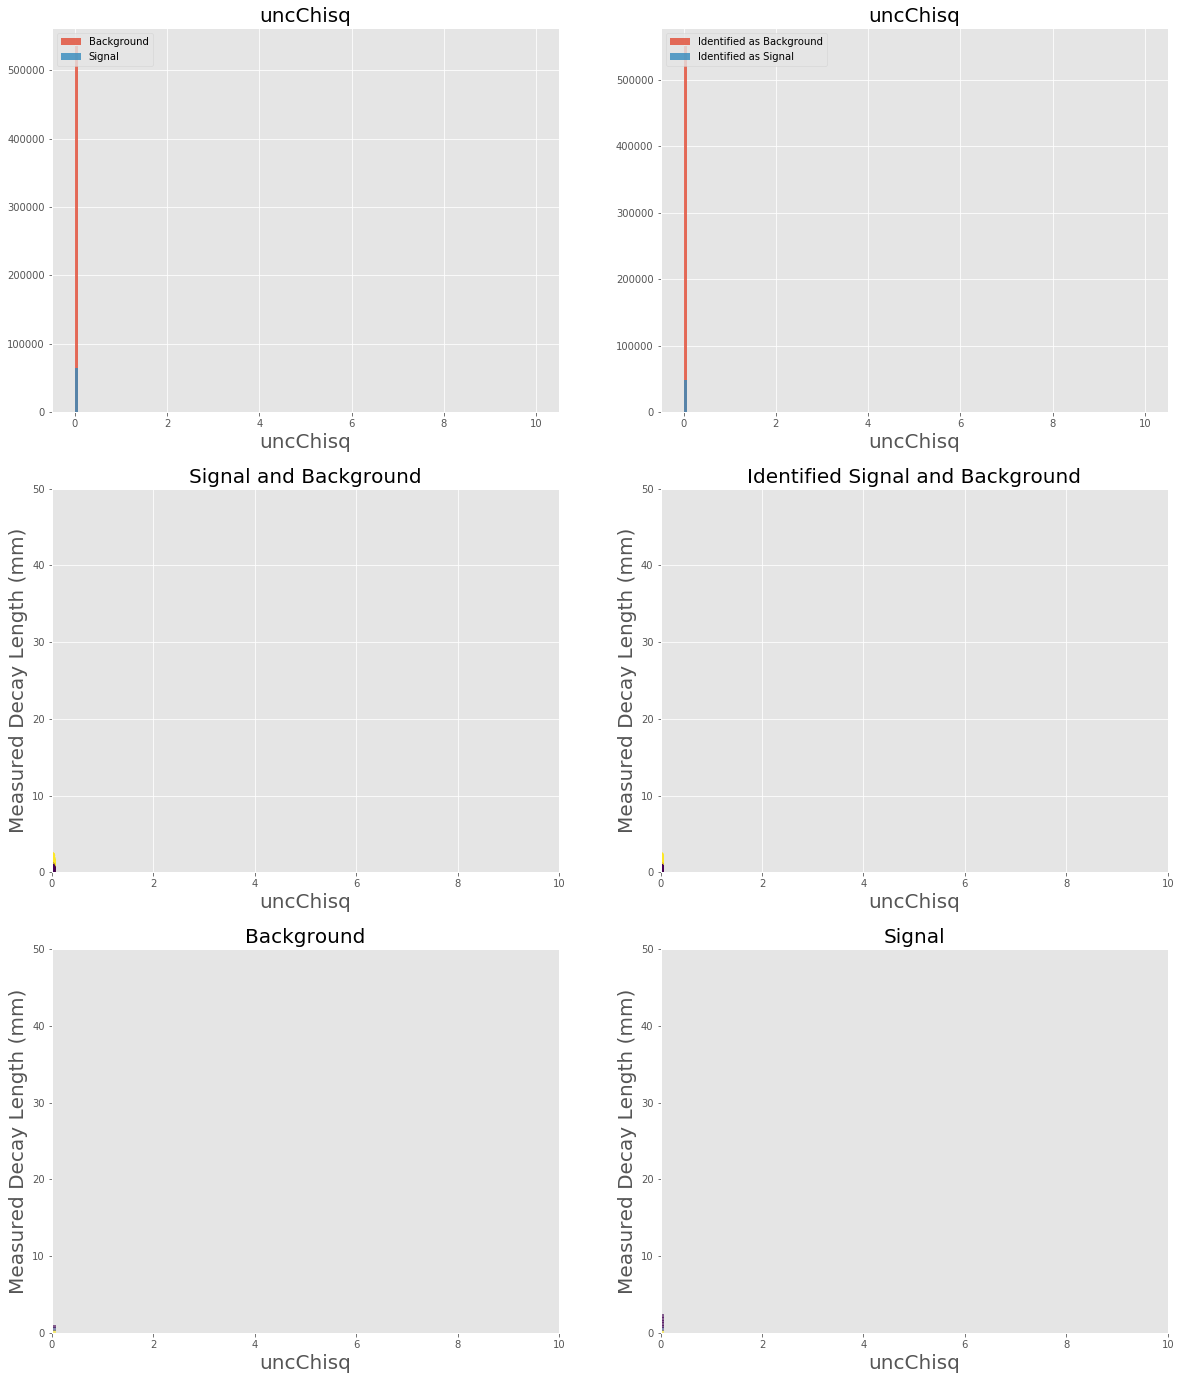

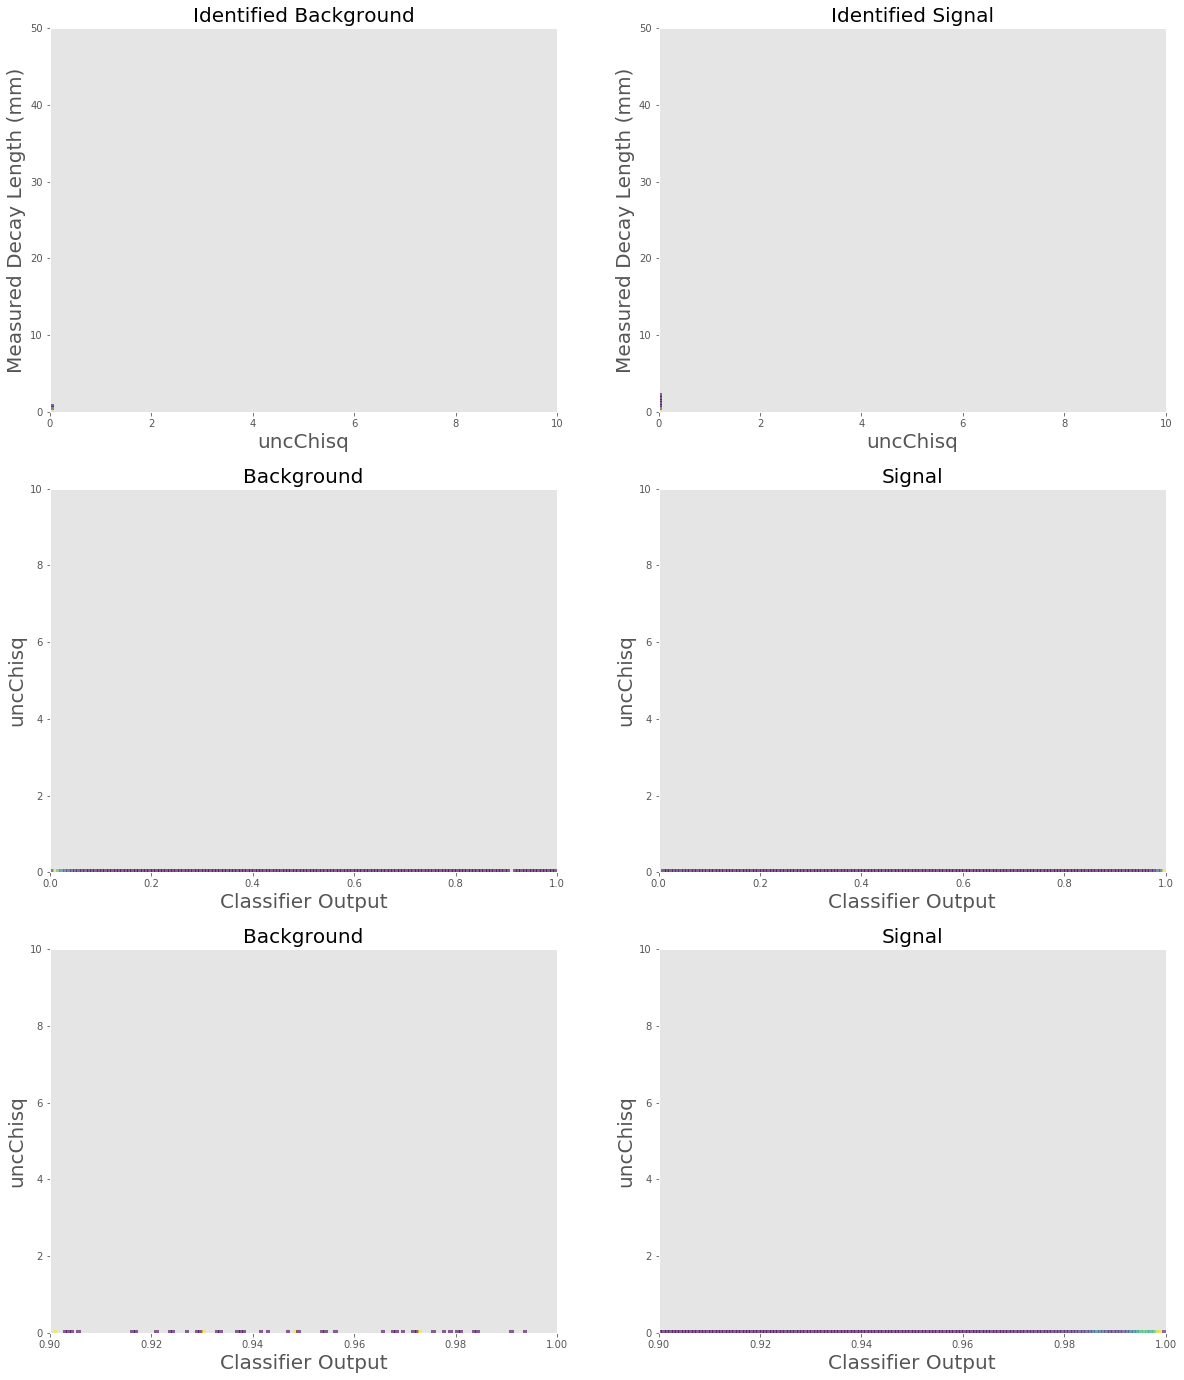

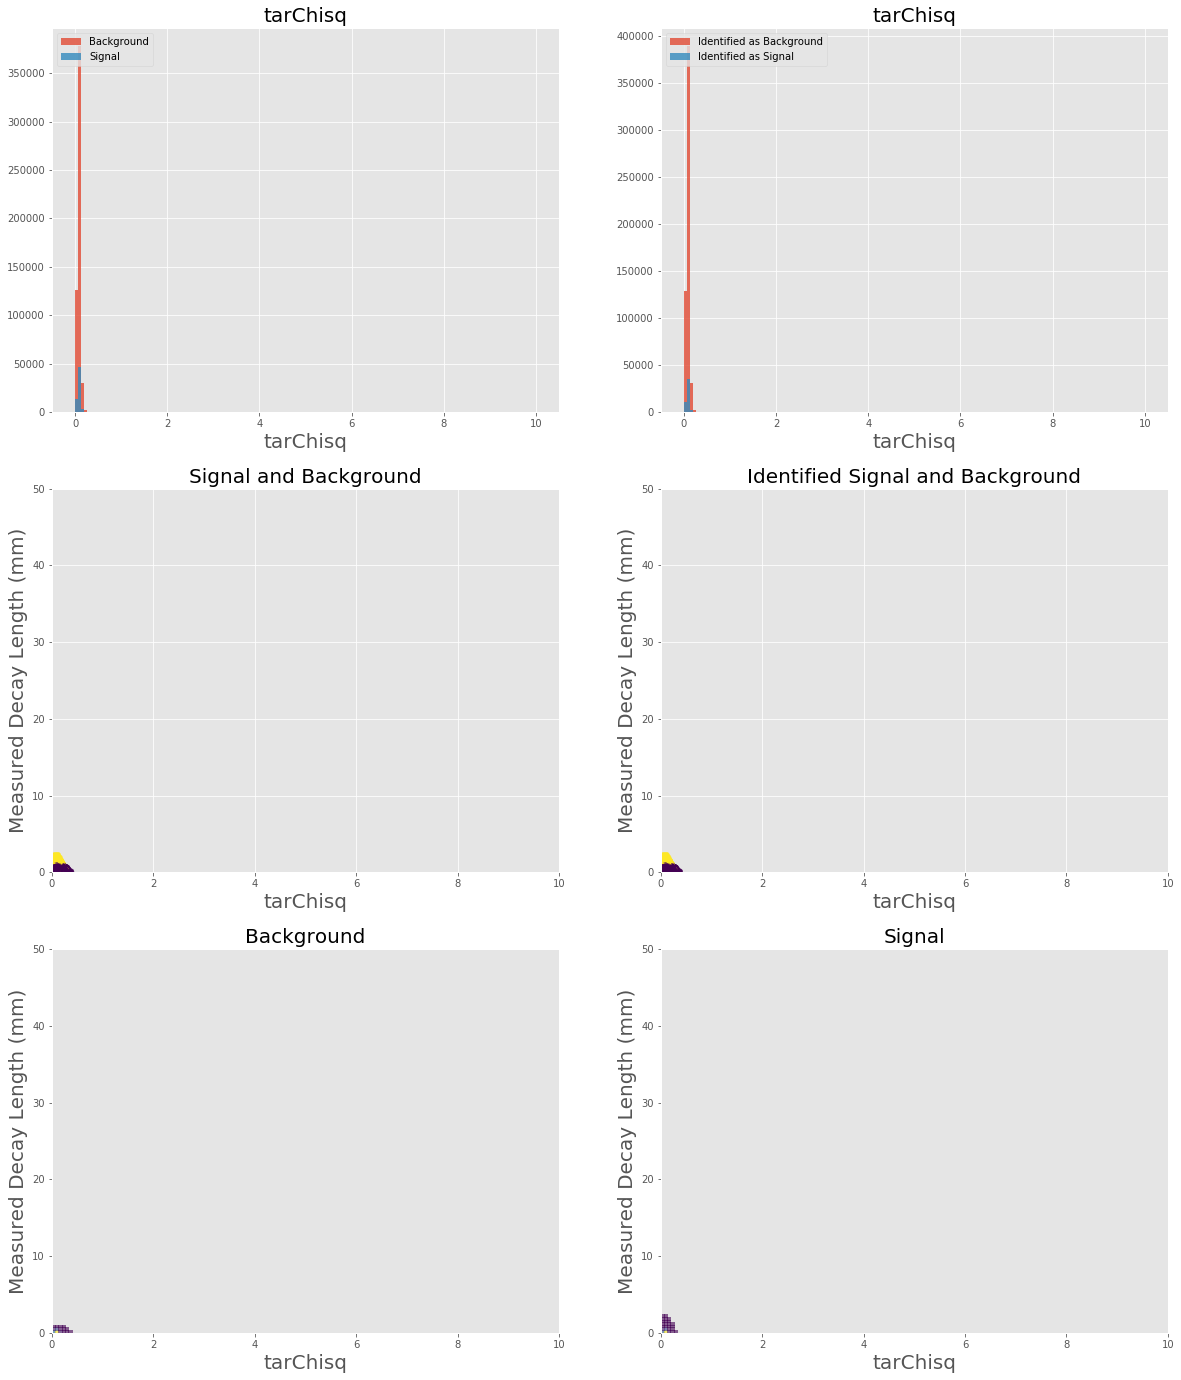

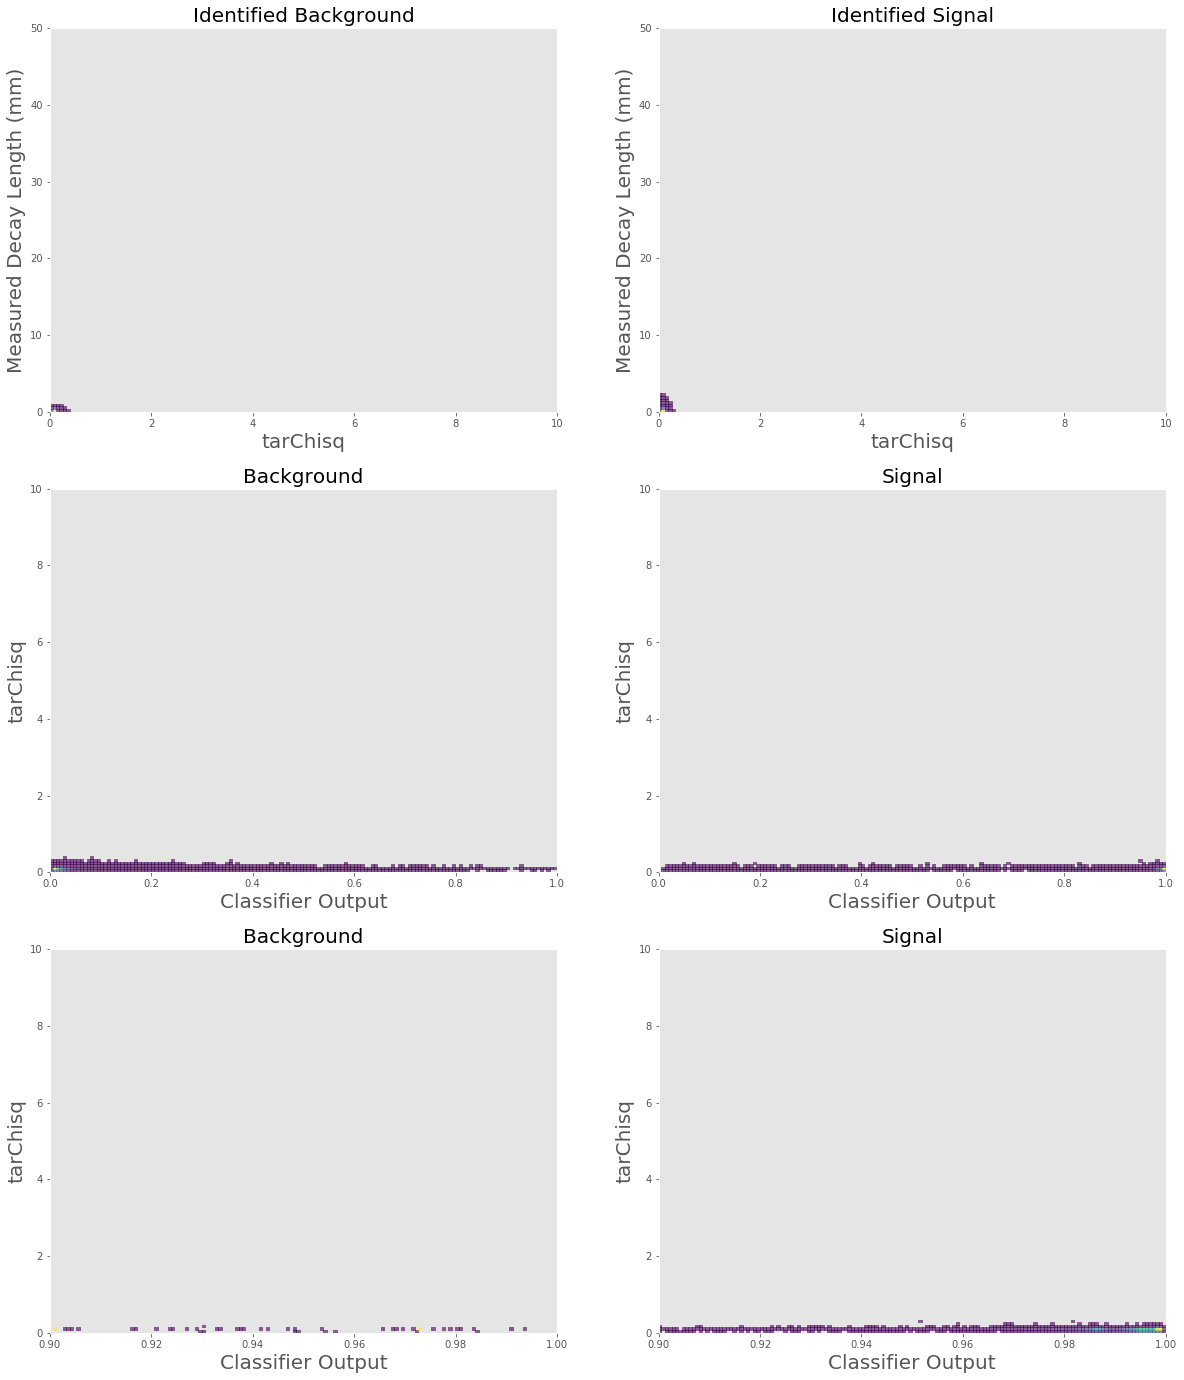

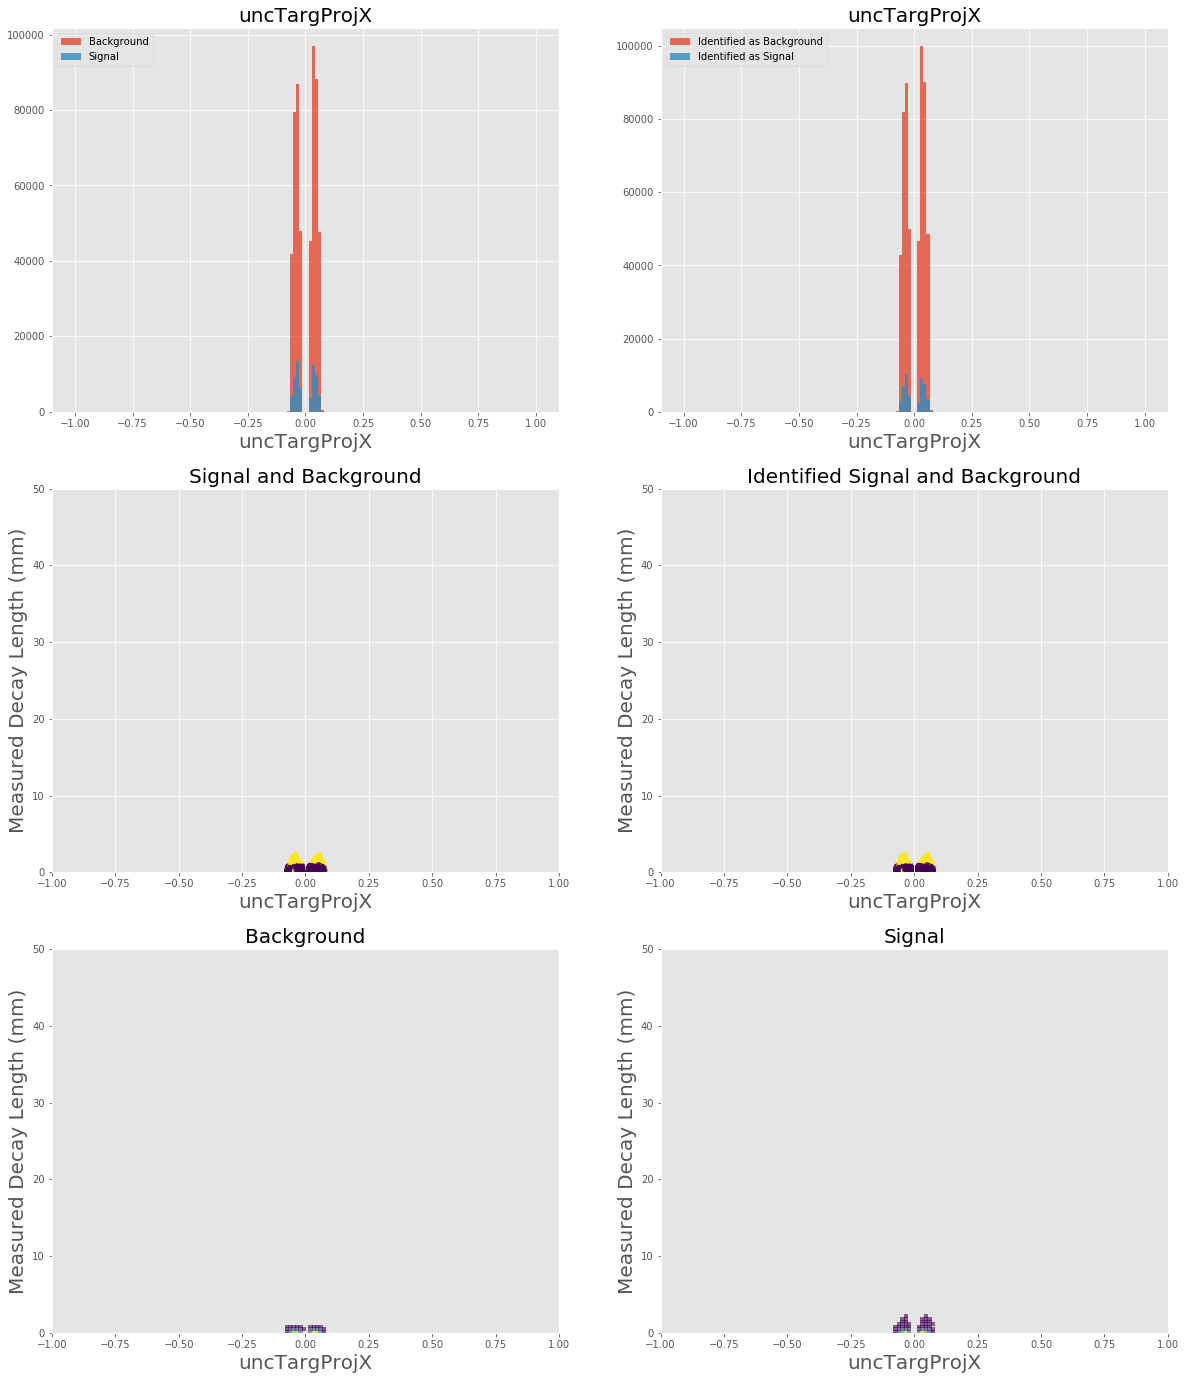

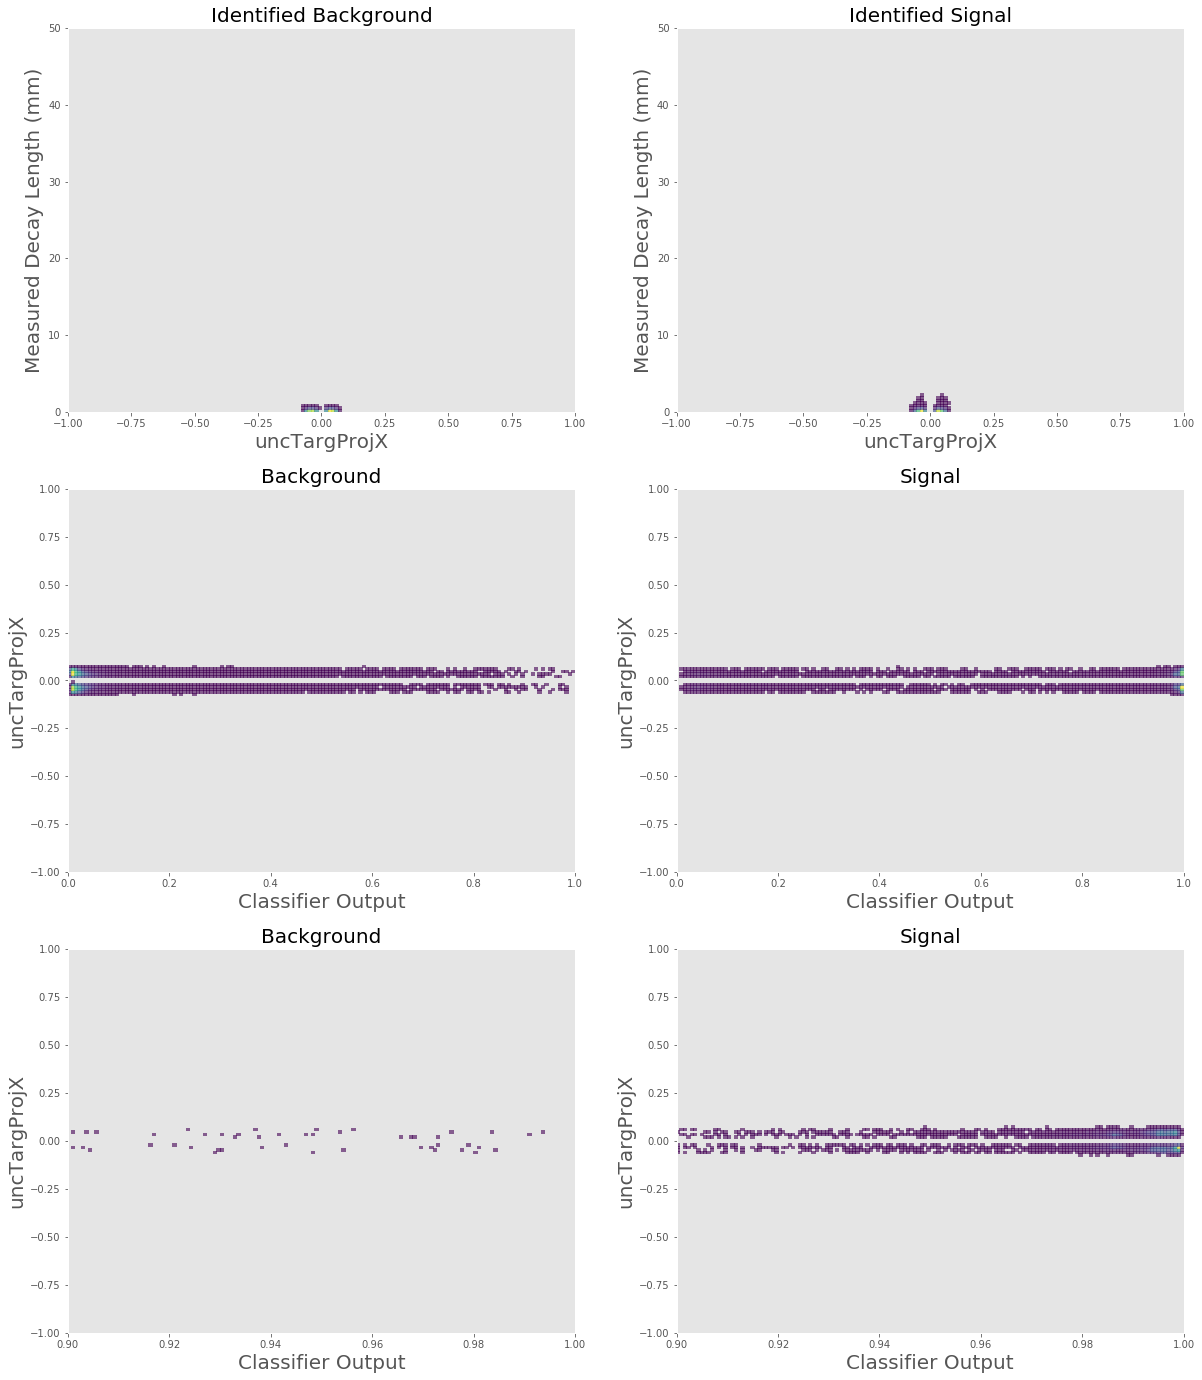

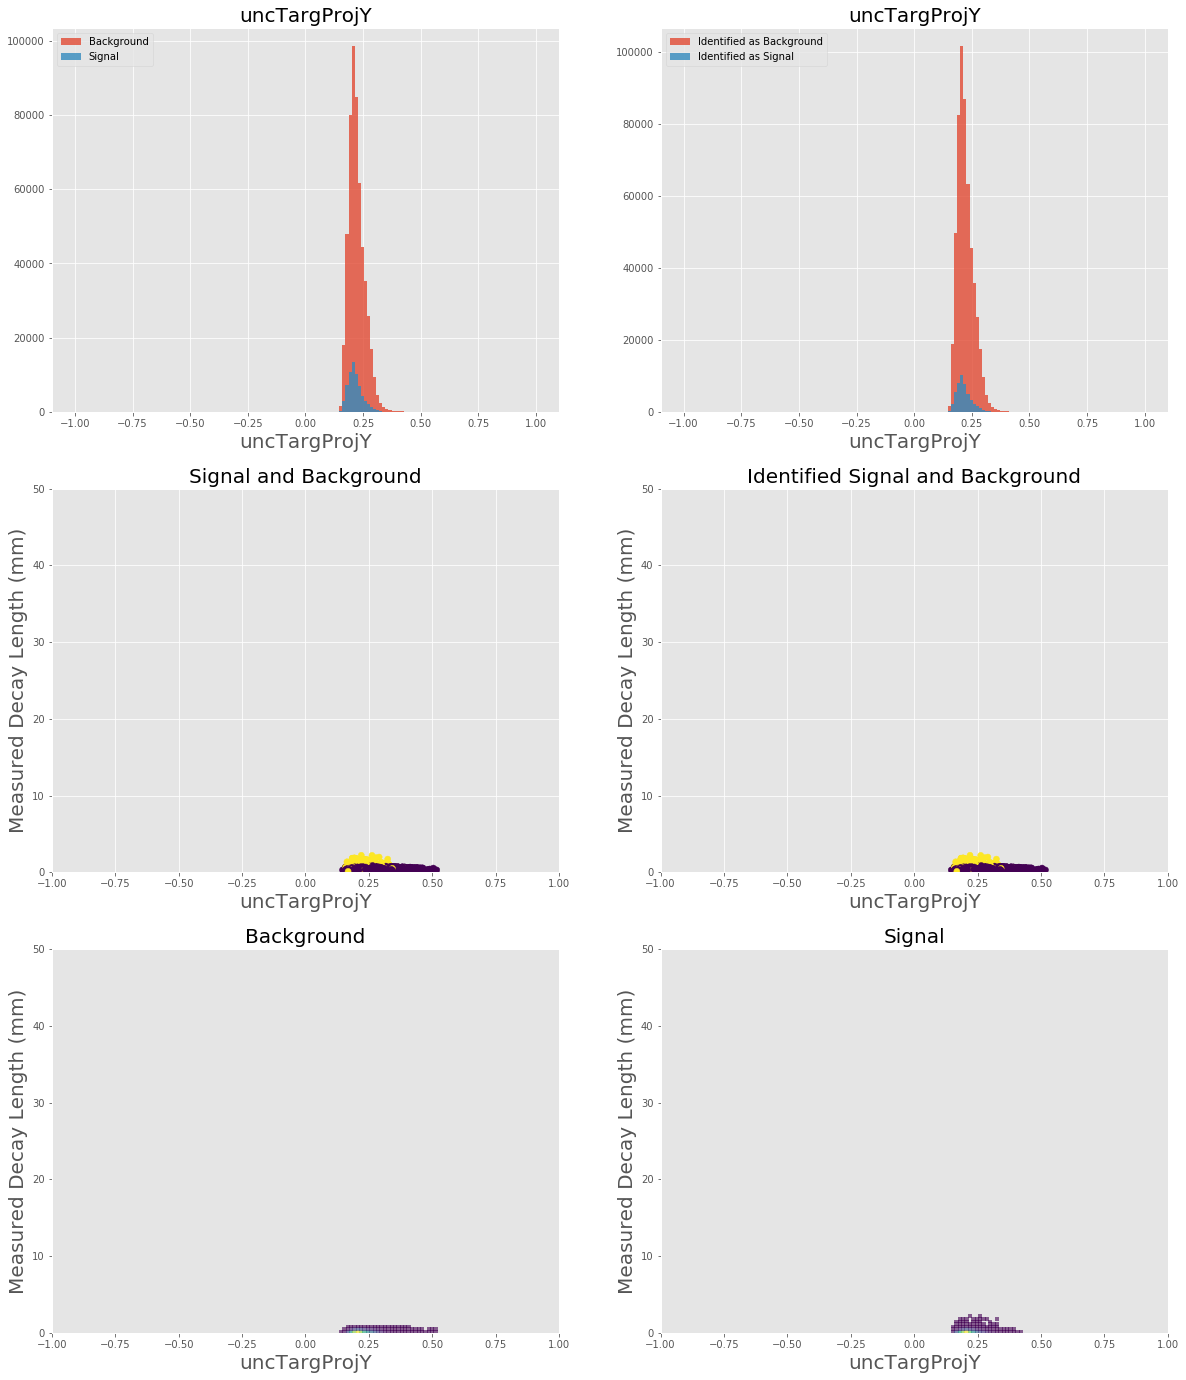

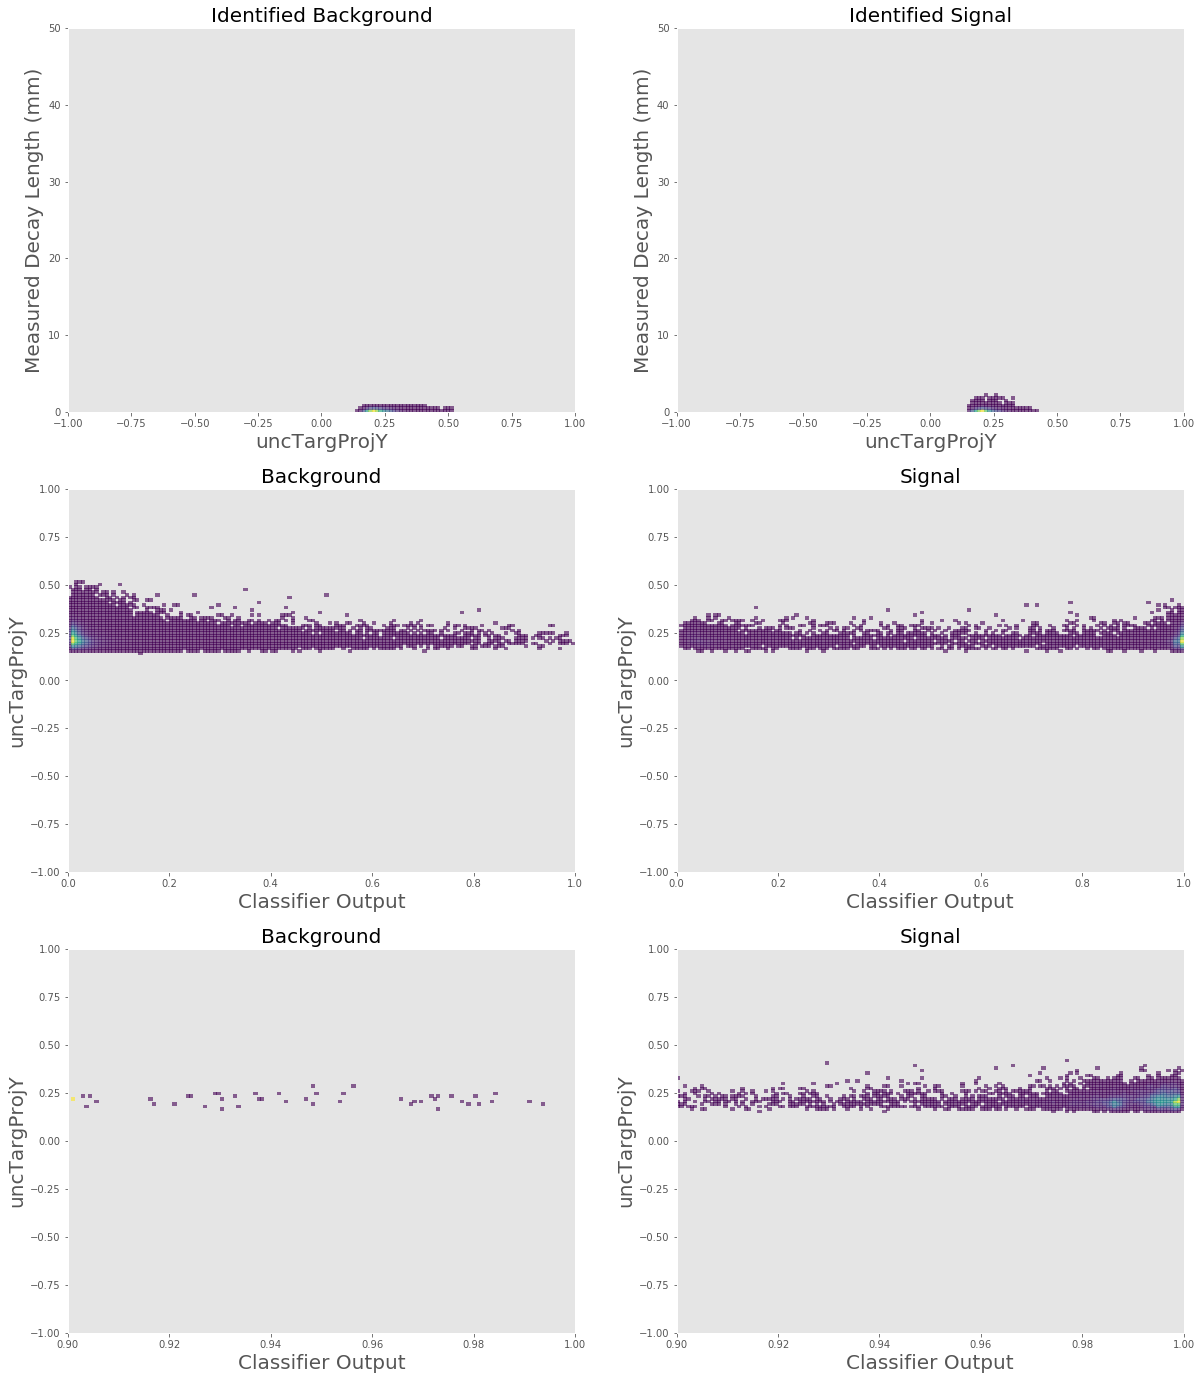

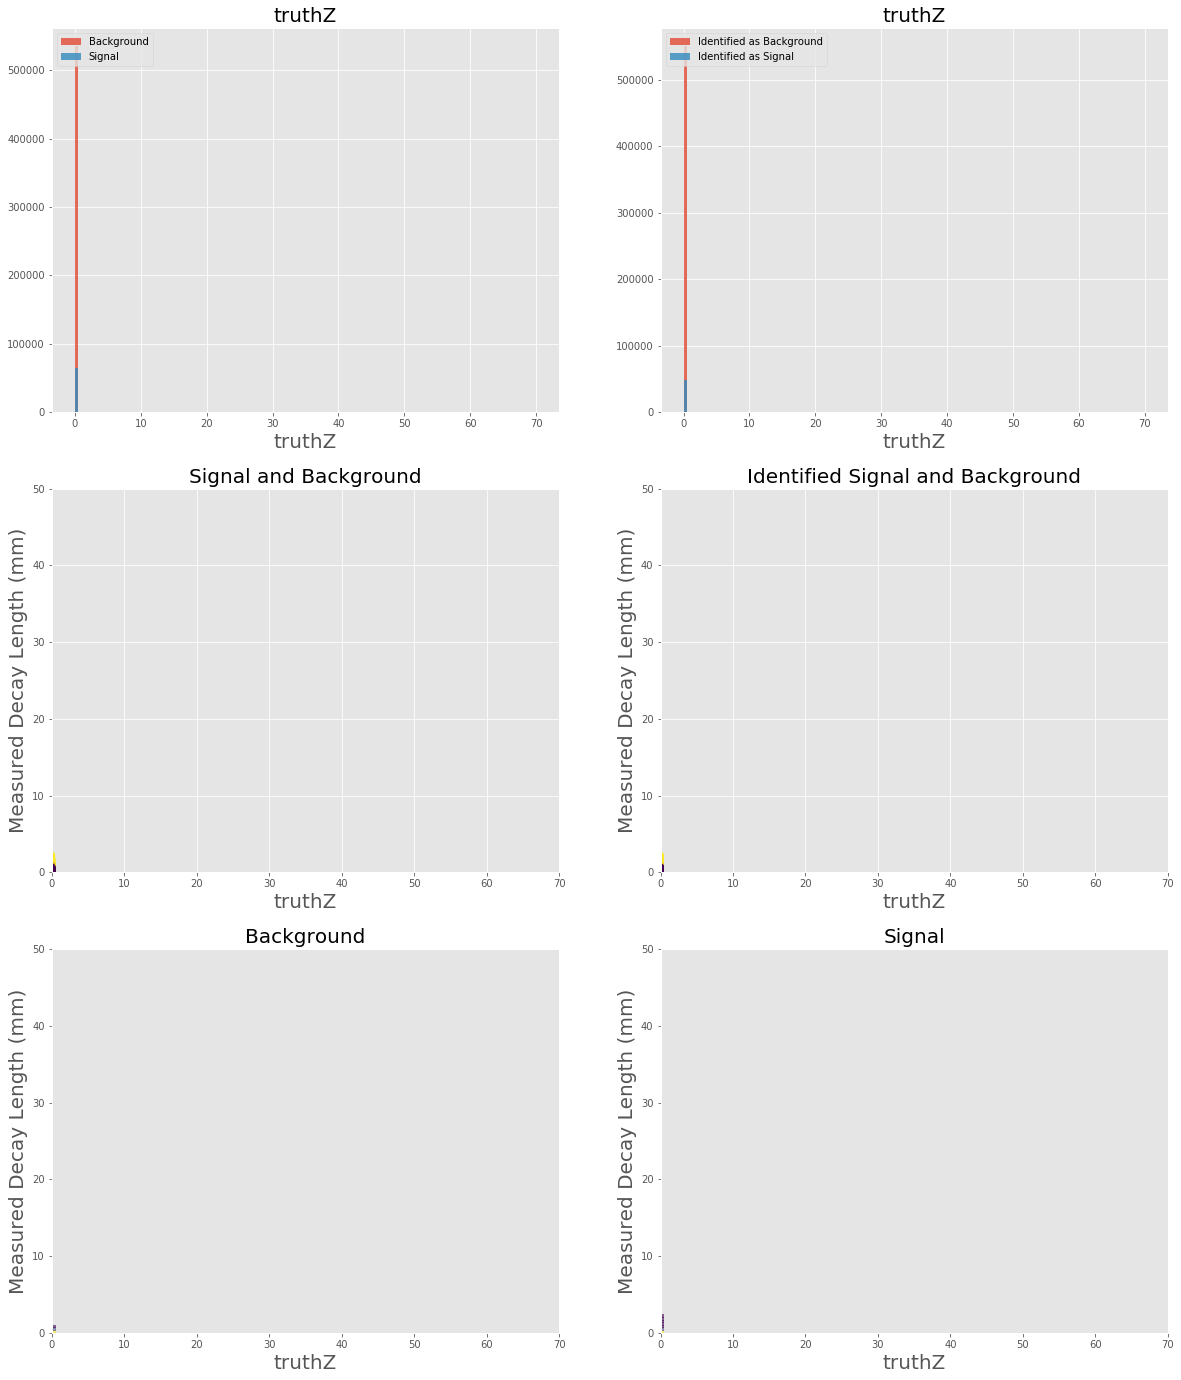

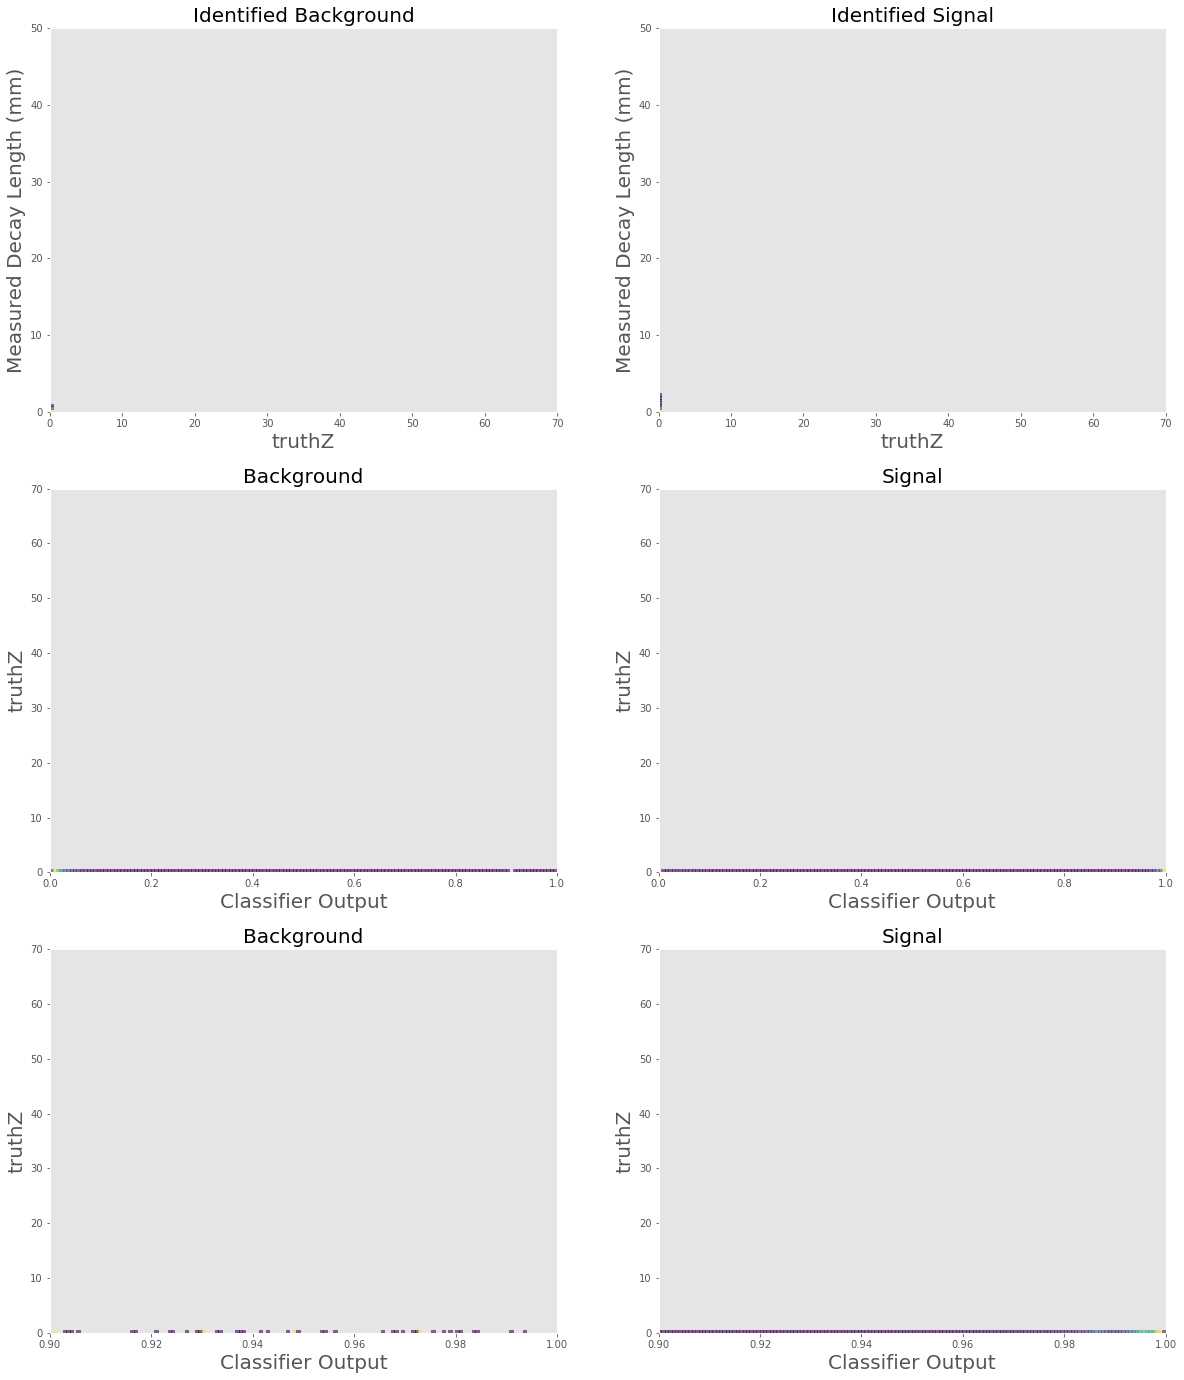

In [44]:
import MakePlots as plots
plots.MakePlots(clf, X_train=X_train, Y_train=Y_train, X_val=None, Y_val=None, X_test=None, Y_test=None, 
                param_list=param_list, param_min=param_min, param_max=param_max, uncVZi=2, clf_cut=0.5, threshold_min=0.9, nBins=150, 
                fpr_max=0.25, PDFbasename="test", physicsPlots=False)